In [1]:
'''
Date: 24/3/2022
Auther: Yike Xie
Content: making figures for cell-cell communication 
'''


'\nDate: 24/3/2022\nAuther: Yike Xie\nContent: making figures for cell-cell communication \n'

In [2]:
import os

import numpy as np
import pandas as pd

import anndata
import scanpy as sc

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib import gridspec
import matplotlib as mpl
import seaborn as sns

from collections import defaultdict
import random
import itertools
from numpy import *    

In [3]:
import sys
sys.path.append('/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/') 
import YK_util, optimized_pair_comparison, functions_CCC_figure_fra_pair
from YK_util import *
from optimized_pair_comparison import *
from functions_CCC_figure_fra_pair import *

In [4]:
# load data
path = '/home/yike/phd/dengue/data/mergedata_20211001.h5ad'
adata = sc.read_h5ad(path)

adata_kid = subsetdata(adata)
adata_kid = normalizedata(adata_kid, log1p=True) # log1p = 2
adata_kid = removegenes(adata_kid)
adata_kid = adata_kid[(adata_kid.obs.cell_subtype_new != 'doublets') & 
                        (adata_kid.obs.cell_subtype_new != 'unknown')].copy()

sc.pp.filter_genes(adata_kid, min_cells=3)

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [5]:
# #rename and reorder some celltypes 
adata_kid = adata_kid.copy()
reorg_celltype(adata_kid) # 'cell_type_new', 'cell_subtype_new'

/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/YK_util.py:110: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  adata.obs.cell_type_new.cat.add_categories(['T cells', 'NK cells', 'B cells'], inplace = True)
/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/YK_util.py:120: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  adata.obs.cell_type_new.cat.remove_categories(['NK/T_cells', 'B_cells'], inplace = True)
/home/yike/phd/dengue/dengue_children/paper_figures/final/modules/YK_util.py:125: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories 

In [6]:
#load interaction file
fn_int='/home/yike/phd/dengue/data/interaction_source_file/inters_YK_20220324.tsv'
interactions = pd.read_csv(fn_int, sep='\t')
genes = np.unique(interactions[['genesymbol_intercell_target', 'genesymbol_intercell_source']])
genes = [gene for gene in genes if gene in adata_kid.var_names]

<ipython-input-6-f65e93a1ab2a>:3: DtypeWarning: Columns (2,3,4,5,6,18,26,27,28,29,30,33,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions = pd.read_csv(fn_int, sep='\t')


In [7]:
#save path
save_figures = '/home/yike/phd/dengue/docs/paper_draft/figures/figure_6/full_omnipath/'
ori_tables = '/home/yike/phd/dengue/docs/paper_draft/tabels/'
save_tables = '/home/yike/phd/dengue/docs/paper_draft/tabels/full_omnipath/'

In [8]:
# get cell types and cell subtypes
cell_types = adata_kid.obs['cell_type_new'].cat.categories.tolist()
cell_types.remove('megakaryocytes')
cell_subtypes = adata_kid.obs['cell_subtype_new'].cat.categories.tolist()

In [9]:
# load cell type palette
ct_palette = load_ct_palette()
print([ct for ct in ct_palette.keys()])
sns.color_palette(ct_palette.values())

['B cells', 'Plasmablasts', 'T cells', 'NK cells', 'Monocytes', 'conventional DCs', 'plasmacytoid DCs', 'megakaryocytes']


[(0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

In [10]:
# load cell subtype palette
cst_palette = load_cst_palette()
print([cst for cst in cst_palette.keys()])
sns.color_palette(cst_palette.values())

['memory B cells', 'naive B cells', 'activated B cells', 'proliferating plasmablasts', 'non-proliferating plasmablasts', 'CD4+ T cells', 'CD8+ effector T cells', 'CD8+ naive/memory T cells', 'signaling NK cells', 'cytotoxic NK cells', 'classical monocytes', 'non-classical monocytes', 'intermediate monocytes', 'conventional DCs', 'plasmacytoid DCs', 'megakaryocytes']


[(1.0, 0.0, 0.0),
 (0.7372549019607844, 0.5607843137254902, 0.5607843137254902),
 (0.5019607843137255, 0.0, 0.0),
 (1.0, 0.8941176470588236, 0.7686274509803922),
 (1.0, 0.5490196078431373, 0.0),
 (0.6901960784313725, 0.7686274509803922, 0.8705882352941177),
 (0.2549019607843137, 0.4117647058823529, 0.8823529411764706),
 (0.0, 0.0, 0.5019607843137255),
 (0.5019607843137255, 0.0, 0.5019607843137255),
 (0.8666666666666667, 0.6274509803921569, 0.8666666666666667),
 (0.5607843137254902, 0.7372549019607844, 0.5607843137254902),
 (0.5647058823529412, 0.9333333333333333, 0.5647058823529412),
 (0.0, 0.5019607843137255, 0.0),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

In [11]:
def get_inters_med_pair(data_ct, cts, med_pair_cut_off, fra_exp_cut_off):    
    fn_int = '/home/yike/phd/dengue/data/interaction_source_file/omnipath_filtered_intercellular_inters.tsv'
    interactions = pd.read_csv(fn_int, sep='\t')[['genesymbol_intercell_source', 'genesymbol_intercell_target']]
    res = []
    for _, row in interactions.iterrows():
        ga = row['genesymbol_intercell_source']
        gb = row['genesymbol_intercell_target']
        if (ga not in genes) | (gb not in genes):
            continue
        for cst in cts:
            cst_med = {gene: data_ct.loc[cst, gene]['med_pair'] for gene in [ga, gb]} 
            cst_fra_pair = {gene: data_ct.loc[cst, gene]['fra_pair'] for gene in [ga, gb]} 
            cst_neg_fra_pair = {gene: data_ct.loc[cst, gene]['neg_fra_pair'] for gene in [ga, gb]}
            cst_fra = {(gene, cd): data_ct.loc[cst, gene][cd+'_fra'] for gene in [ga, gb] for cd in ['S', 'NS']}
            for ct in cts:
                ct_med = {gene: data_ct.loc[ct, gene]['med_pair'] for gene in [ga, gb]}
                ct_fra_pair = {gene: data_ct.loc[ct, gene]['fra_pair'] for gene in [ga, gb]}
                ct_neg_fra_pair = {gene: data_ct.loc[cst, gene]['neg_fra_pair'] for gene in [ga, gb]}
                ct_fra = {(gene, cd): data_ct.loc[ct, gene][cd+'_fra'] for gene in [ga, gb] for cd in ['S', 'NS']}
                
                #####################
                if (cst_med[ga] > med_pair_cut_off) & (ct_med[gb] > med_pair_cut_off) & (cst_fra[ga, 'S'] > fra_exp_cut_off) & (ct_fra[gb, 'S'] > fra_exp_cut_off):
                    res.append([
                        ga, cst, cst_med[ga], cst_fra_pair[ga], cst_neg_fra_pair[ga], cst_fra[ga, 'S'], cst_fra[ga, 'NS'],
                        gb, ct, ct_med[gb], ct_fra_pair[gb], ct_neg_fra_pair[gb], ct_fra[gb, 'S'], ct_fra[gb, 'NS'], 'up'
                    ])
                #####################
                if (cst_med[ga] < -med_pair_cut_off) & (ct_med[gb] < -med_pair_cut_off) & (cst_fra[ga, 'NS'] > fra_exp_cut_off) & (ct_fra[gb, 'NS'] > fra_exp_cut_off):
                    res.append([
                        ga, cst, cst_med[ga], cst_fra_pair[ga], cst_neg_fra_pair[ga], cst_fra[ga, 'S'], cst_fra[ga, 'NS'],
                        gb, ct, ct_med[gb], ct_fra_pair[gb], ct_neg_fra_pair[gb], ct_fra[gb, 'S'], ct_fra[gb, 'NS'], 'down'
                    ])
                #####################
                if (cst_med[ga] > med_pair_cut_off) & (ct_med[gb] < -med_pair_cut_off) & (cst_fra[ga, 'S'] > fra_exp_cut_off) & (ct_fra[gb, 'NS'] > fra_exp_cut_off):
                    res.append([
                        ga, cst, cst_med[ga], cst_fra_pair[ga], cst_neg_fra_pair[ga], cst_fra[ga, 'S'], cst_fra[ga, 'NS'],
                        gb, ct, ct_med[gb], ct_fra_pair[gb], ct_neg_fra_pair[gb], ct_fra[gb, 'S'], ct_fra[gb, 'NS'], 'mix'
                    ])

                if (cst_med[ga] < -med_pair_cut_off) & (ct_med[gb] > med_pair_cut_off) & (cst_fra[ga, 'NS'] > fra_exp_cut_off) & (ct_fra[gb, 'S'] > fra_exp_cut_off):
                    res.append([
                        gb, ct, ct_med[gb], ct_fra_pair[gb], ct_neg_fra_pair[gb], ct_fra[gb, 'S'], ct_fra[gb, 'NS'], 
                        ga, cst, cst_med[ga], cst_fra_pair[ga], cst_neg_fra_pair[ga], cst_fra[ga, 'S'], cst_fra[ga, 'NS'], 'mix'
                    ])
    res = pd.DataFrame(res, columns=[
        'ga', 'csta', 'ga_med_pair', 'ga_fra_pair','ga_neg_fra_pair','ga_SD_fra', 'ga_D_fra', 
        'gb', 'cstb', 'gb_med_pair', 'gb_fra_pair','gb_neg_fra_pair','gb_SD_fra', 'gb_D_fra',
        'inter_type'])
    
    return res

def randomization(genes, adata_kid):
    log2fc = defaultdict(list)
    r = defaultdict(list)
    pvalue = {}
    
    adata_children = adata_kid[adata_kid.obs['Condition'].isin(['S_dengue', 'dengue'])].copy()
    
    for i, inter in enumerate(genes):
        if i % 100 == 0:
            print(i)
        ga = inter['ga']
        cta = inter['cta']
        gb = inter['gb']
        ctb = inter['ctb']

        csts = adata_kid.obs['cell_subtype_new'].unique().tolist()
        
        if 'doublets' in csts:
            csts.remove('doublets')
        if 'unknown' in csts:
            csts.remove('unknown')  
        csts.remove('megakaryocytes')
        csts.remove('plasmacytoid DCs')
        csts.remove('conventional DCs')

        ct_obs = {x: ['cell_subtype_new', 'cell_type_new'][x not in csts] for x in [cta, ctb]}
        
        adata_g = {}
        for gene, ct in zip([ga, gb], [cta, ctb]):
            adata_ct = adata_children[adata_children.obs[ct_obs[ct]] == ct]
            adata_g[gene] = adata_ct[:, gene]  
            
        avg = {(gene, cd): adata_g[gene][adata_g[gene].obs['Condition'] == cd].X.toarray().mean() for gene in [ga, gb] for cd in ['S_dengue', 'dengue']}
        lfc = {gene: np.log2(avg[gene, 'S_dengue'] + 0.1) - np.log2(avg[gene, 'dengue'] + 0.1) for gene in [ga, gb]}
        log2fc[(ga, cta, gb, ctb)].append([lfc[ga], lfc[gb]])
        r0 = (float(lfc[ga])**2 + float(lfc[gb])**2)**0.5
        r[(ga, cta, gb, ctb)].append(r0)
        
        p = 0
        for i in range(1000):
            adata_i = adata_g
            raw = {gene: adata_i[gene].obs['Condition'].tolist() for gene in [ga, gb]}
            for gene in [ga, gb]:
                random.shuffle(raw[gene])
                adata_i[gene].obs['Condition'] = raw[gene]
            avg_i = {(gene, cd): adata_i[gene][adata_i[gene].obs['Condition'] == cd].X.toarray().mean() for gene in [ga, gb] for cd in ['S_dengue', 'dengue']}
            log2fc_i = {gene: np.log2(avg_i[gene, 'S_dengue'] + 0.1) - np.log2(avg_i[gene, 'dengue'] + 0.1) for gene in [ga, gb]}
            log2fc[(ga, cta, gb, ctb)].append([log2fc_i[ga], log2fc_i[gb]])
            ri = (float(log2fc_i[ga])**2 + float(log2fc_i[gb])**2)**0.5
            r[(ga, cta, gb, ctb)].append(ri)
            if ri >= r0:
                p += 1
        pvalue[(ga, cta, gb, ctb)] = p * 0.001

    res = pd.DataFrame([])
    for key in log2fc.keys():
        log2fc[key] = pd.DataFrame(log2fc[key], columns = ['log2fc_ga', 'log2fc_gb'])
        log2fc[key]['r'] = r[key]
        log2fc[key]['pvalue'] = pvalue[key]
        for j, s in enumerate(['ga', 'cta', 'gb', 'ctb']):
            log2fc[key][s] = key[j]
        res = pd.concat([res, log2fc[key]])
    res = res.set_index(['ga', 'cta', 'gb', 'ctb'])
        
    return res

def ran_filter(ran_res, genes):
    sig_res = pd.DataFrame([], columns = ['log2fc_ga', 'log2fc_gb', 'r', 'pvalue', 'ga', 'csta', 'gb', 'cstb'])
    i = 0
    
    for inter in genes:
        ga = inter['ga']
        csta = inter['cta']
        gb = inter['gb']
        cstb = inter['ctb']
        if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:
            i += 1
            loc = ran_res.loc[ga, csta, gb, cstb][:1].loc[ga, csta, gb, cstb].tolist()
            for j in [ga, csta, gb, cstb]:
                loc.append(j)
            sig_res.loc[i] = loc
    return sig_res

def randomization_plot(fdn, ran_filter, ran_res, filetype=False):
    rcParams['font.size']=18
    rcParams['pdf.fonttype'] = 42
    rcParams['font.sans-serif'] = "Arial"
    rcParams['figure.dpi'] = 300
    
    ran_genes = [{'ga': idx[0], 'cta': idx[1], 'gb': idx[2], 'ctb': idx[3]} for idx in ran_filter.index]
    for inter in ran_genes:
        fig, ax = plt.subplots(figsize=[6, 6])
        ga = inter['ga']
        cta = inter['cta']
        gb = inter['gb']
        ctb = inter['ctb']

        log2fc = ran_res.loc[ga, cta, gb, ctb]

        x0 = log2fc['log2fc_ga'].tolist()[0]
        y0 = log2fc['log2fc_gb'].tolist()[0]    

        x = log2fc['log2fc_ga'].tolist()[1:]
        y = log2fc['log2fc_gb'].tolist()[1:]

        ax.scatter(x0, y0, c='r', s=10, label='Original data')
        ax.scatter(x, y, c='gray', s=10, label='Randomized data', alpha=0.5)
        ax.legend(loc='lower left')
        
        ax.axvline(0, c='gray', zorder=-3, lw=0.5)
        ax.axhline(0, c='gray', zorder=-3, lw=0.5)
        ax.set_ylim(-4.5, 4.5)
        ax.set_xlim(-4.5, 4.5)
        ax.set_xlabel('log2 fold change (SD vs D) of\n' + ga + ' in ' + cta.replace('_', ' '))
        ax.set_ylabel('log2 fold change (SD vs D) of\n' + gb + ' in ' + ctb.replace('_', ' '))
        p = ran_res.loc[ga, cta, gb, ctb]['pvalue'][0]
        if p == 0:
            ax.set_title('p value < 0.001')
        else:
            ax.set_title('p value: ' + str(p))
            
        if filetype is not False:
            filename = ga + '_in_' + cta.replace('/', '_') + '&' + gb + '_in_' + ctb.replace('/', '_') + filetype
            plt.savefig(os.path.join(fdn, filename), bbox_inches = 'tight')
#######################################################################

def violin(gene, cell_type, path):
    adata_ct = adata_kid[adata_kid.obs['cell_type_new'] == cell_type]
    SD_IDs = adata_ct[adata_ct.obs['Condition'] == 'S_dengue'].obs['ID'].unique().tolist()
    D_IDs = adata_ct[adata_ct.obs['Condition'] == 'dengue'].obs['ID'].unique().tolist()

    df = pd.DataFrame(columns=['ID', 'Gene exp', 'Condition'])
    data = {}
    IDs = D_IDs + SD_IDs
    for ID in IDs: # from dengue to severe dengue
        ID_info = adata_ct[adata_ct.obs['ID'] == ID][:, gene].X.toarray()[:, 0]
        if len(ID_info) <5:
            IDs.remove(ID)

    for ID in IDs:
        ID_info = adata_ct[adata_ct.obs['ID'] == ID][:, gene].X.toarray()[:, 0]
        if ID in D_IDs:
            data[ID] = [[ID, i, 'D'] for i in ID_info]
        else:
            data[ID] = [[ID, i, 'SD'] for i in ID_info]

        df = pd.concat([df, pd.DataFrame(data[ID], columns=['ID', 'Gene exp', 'Condition'])])    

    df['Gene exp'] = df['Gene exp'].astype('float64')
    df_sort = pd.DataFrame([[ID,  df[df['ID'] == ID]['Gene exp'].mean()] for ID in IDs], columns=['ID', 'Ave exp'])
    idx = df_sort.sort_values('Ave exp')['ID']
    df = df.set_index('ID').loc[idx].reset_index()

    ###########################################################
    fig, ax = plt.subplots(figsize=[8, 2], dpi=300)
    cmap = sns.color_palette('Set2', 4)
    sns.violinplot(data=df, x='ID', y='Gene exp', 
                   hue='Condition', hue_order=['D', 'SD'], palette=[cmap[1], cmap[3]],
                   bw=0.3, scale='width', inner=None, 
                   linewidth=0.8, saturation=0.8, rotation=90, ax=ax, cut=0, 
                   )
    xtickslabels = [label.get_text()[:-3] for label in ax.get_xticklabels()]
    ax.set_xticklabels(xtickslabels, rotation=90)
    ax.legend(bbox_to_anchor=(1.28, 1))
    ax.set_xlabel(None)
    #ax.set_ylim(-0.5, 14)
    ax.set_ylabel('Gene exp (cpm)')
    ax.set_yticks([0, np.log2(100), np.log2(10000)])
    ax.set_yticklabels(['0', '$10^2$', '$10^4$'])
    ax.set_title(gene+ ' in ' + cell_type)

    if path is not False:
        fig.savefig(os.path.join(path, gene+ '_in_' + cell_type + 'vol.png'), bbox_inches='tight')
        fig.savefig(os.path.join(path, gene+ '_in_' + cell_type + 'vol.svg'), bbox_inches='tight')
        
def inter_number(adata, inters_df, vmax, trend, cmap):
    rcParams['font.size']= 20
    rcParams['pdf.fonttype'] = 42
    rcParams['figure.dpi'] = 300
    rcParams['font.sans-serif'] = "Arial"

    it_n = inters_df.groupby(['csta', 'cstb']).size().unstack(fill_value=0)
        
    cell_types = adata.obs['cell_type_new'].unique().tolist()
    if 'doublets' in cell_types:
        cell_types.remove('doublets')
    if 'unknown' in cell_types:    
        cell_types.remove('unknown')
    if 'megakaryocytes' in cell_types:
        cell_types.remove('megakaryocytes')
    
    idx_ap = list(set(cell_types) - set(it_n.index.tolist()))
    col_ap = list(set(cell_types) - set(it_n.columns.tolist()))
    for idx in idx_ap:
        it_n.loc[idx] = [0] * it_n.shape[1]
    for col in col_ap:
        it_n[col] = [0] * it_n.shape[0]
    
    it_n = it_n[it_n.index]

    pairs = []
    for i, cell_type in enumerate(cell_types):
        cts = cell_types[i+1:]
        for ct in cts:
            pairs.append([cell_type, ct])

    for [cta, ctb] in pairs:
        it_n.loc[ctb][cta] = it_n.loc[cta][ctb]

    from scipy.spatial.distance import pdist
    from scipy.cluster.hierarchy import linkage, leaves_list
    import matplotlib.patches as mpatches
    lkg_idx = linkage(pdist(it_n.values), optimal_ordering=True)
    best_idx = leaves_list(lkg_idx)
    best_idx = it_n.index[best_idx].tolist()

    if it_n.loc[best_idx[-1]][best_idx[-1]] > it_n.loc[best_idx[0]][best_idx[0]]:
        best_idx = best_idx
    else:
        best_idx.reverse()

    it_n = it_n.loc[best_idx]
    it_n = it_n[best_idx]

    fig, ax = plt.subplots(figsize=[6, 4])
    sns.heatmap(it_n.T, ax=ax, cmap=cmap, linecolor='w', linewidths=1, vmin=0, vmax=vmax) # cmap='plasma', 'magma'

    for x in range(len(best_idx)):
        for y in range(len(best_idx)):
            if y < x:
                dots = [[x, y],
                        [x, y+1],
                        [x+1, y+1],
                        [x+1, y],
                ]
                e = mpatches.Polygon(np.array(dots), color='w')
                ax.add_patch(e)

    ax.axvline(0, c='black')
    ax.axhline(0, c='black')

    ax.axvline(len(cell_types), c='black')
    ax.axhline(len(cell_types), c='black')
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.text(len(cell_types) + 2.05, 3.8, 'Number of interactions', verticalalignment='center', rotation=90)
    ax.set_title('%sregulated'%trend)
    return {'figure': fig, 'ax': ax}

def inter_mix_number(adata, inters_df, vmax, cmap):
    rcParams['font.size']= 20
    rcParams['pdf.fonttype'] = 42
    rcParams['figure.dpi'] = 300
    rcParams['font.sans-serif'] = "Arial"

    cell_types = adata.obs['cell_type_new'].unique().tolist()
    if 'doublets' in cell_types:
        cell_types.remove('doublets')
    if 'unknown' in cell_types:    
        cell_types.remove('unknown')
    if 'megakaryocytes' in cell_types:
        cell_types.remove('megakaryocytes')
    
    it_n = inters_df.groupby(['csta', 'cstb']).size().unstack(fill_value=0)

    idx_ap = list(set(cell_types) - set(it_n.index.tolist()))
    col_ap = list(set(cell_types) - set(it_n.columns.tolist()))
    for idx in idx_ap:
        it_n.loc[idx] = [0] * it_n.shape[1]
    for col in col_ap:
        it_n[col] = [0] * it_n.shape[0]

    from scipy.spatial.distance import pdist
    from scipy.cluster.hierarchy import linkage, leaves_list
    import matplotlib.patches as mpatches
    lkg_idx = linkage(pdist(it_n.values), optimal_ordering=True)
    best_idx = leaves_list(lkg_idx)
    best_idx = it_n.index[best_idx].tolist()

    if it_n.loc[best_idx[-1]].sum() > it_n.loc[best_idx[0]].sum():
        best_idx = best_idx
    else:
        best_idx.reverse()
    
    it_n = it_n.loc[best_idx]
    lkg_col = linkage(pdist(it_n.T.values), optimal_ordering=True)
    best_col = leaves_list(lkg_col)
    best_col = it_n.T.index[best_col].tolist()
    
    if it_n[best_col[-1]].sum() > it_n[best_col[0]].sum():
        best_col = best_col
    else:
        best_col.reverse()

    it_n = it_n[best_col]

    fig, ax = plt.subplots(figsize=[6, 4])
    sns.heatmap(it_n.T, ax=ax, cmap=cmap, linecolor='w', linewidths=1, vmin=0, vmax=vmax) # cmap='plasma', 'magma'
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    ax.axvline(0, c='black')
    ax.axhline(0, c='black')

    ax.axvline(len(cell_types), c='black')
    ax.axhline(len(cell_types), c='black')       
    
    ax.text(len(cell_types) + 2.05, 3.8, 'Number of interactions', verticalalignment='center', rotation=90)
    ax.set_title('%sregulated (Down vs Up)'%'Mix')

    return {'figure': fig, 'ax': ax}

def cst_number(cst_its, Mon_cst, color):
    cst_its = cst_its[~ cst_its.duplicated()]
    cst_inters = cst_its.index

    Mon_n = {cst: 0 for cst in Mon_cst}
    for inter in cst_inters:
        for cst in Mon_cst:
            if inter[1] == cst:
                Mon_n[cst] += 1
            elif inter[3] == cst:
                Mon_n[cst] += 1

    Mon_it_n = pd.DataFrame(Mon_n.values(), columns=['Number of interactions'])
    Mon_it_n['Cell subtype'] = [cst.replace('_', ' ') for cst in Mon_n.keys()]
    Mon_it_n.sort_values('Number of interactions', ascending=False, inplace=True)
    rcParams['font.size']= 20
    rcParams['pdf.fonttype'] = 42
    rcParams['figure.dpi'] = 300
    rcParams['font.sans-serif'] = "Arial"

    fig, ax = plt.subplots(figsize=[1.8, 2])
    sns.barplot(data=Mon_it_n, x='Cell subtype', y='Number of interactions', ax=ax, color=color)
    ax.set_xticklabels([ct.replace('_', ' ') for ct in Mon_cst], rotation=90)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    ylim = (Mon_it_n['Number of interactions'].max() // 10 + 1) * 10 + 1
    ax.set_ylim(0, ylim)
    ax.set_yticks(range(0, ylim, [10, 20][ylim >= 40]))
    ax.set_yticklabels(range(0, ylim, [10, 20][ylim >= 40]))
        
    return {'figure': fig, 'ax': ax}
#######################################################################

def s_mushrooms(genes, ct_type, vmax=3):
    '''
    genes = [{'ITGAX': ['B_cells', 'NK_cells'],
          'ITGB2': ['cDCs'],
          'ICAM1': ['Plasmablasts']},
         {'CCL4L2': ['Monocytes'], 'VSIR': ['pDCs']}]
    '''
    from matplotlib.patches import Wedge
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import math
    import numpy as np
    import pandas as pd
    import itertools
    
    rcParams['font.size']= 18
    conditions = ['S_dengue', 'dengue']
    cmap = plt.cm.get_cmap('viridis')
    vmin = 0
    threshold = 0.05
    frac_ct = pd.read_csv('/home/yike/phd/dengue/data/tables/dataset_20211001/' + 'ct_fra_gene_cut_0.tsv', 
                         sep='\t', index_col=['cell_type_new', 'condition', 'gene'], squeeze=True)
    avg_ct = pd.read_csv('/home/yike/phd/dengue/data/tables/dataset_20211001/' + 'ct_avg_gene_cut_0.tsv', 
                         sep='\t', index_col=['cell_type_new', 'condition', 'gene'], squeeze=True)

    frac_cst = pd.read_csv('/home/yike/phd/dengue/data/tables/dataset_20211001/' + 'cst_fra_gene_cut_0.tsv', 
                          sep='\t', index_col=['cell_subtype_new', 'condition', 'gene'], squeeze=True)
    avg_cst = pd.read_csv('/home/yike/phd/dengue/data/tables/dataset_20211001/' + 'cst_avg_gene_cut_0.tsv', 
                          sep='\t', index_col=['cell_subtype_new', 'condition', 'gene'], squeeze=True)

    yl = sum([len(list(itertools.chain.from_iterable(genesi.values()))) for genesi in genes])
    fig = plt.figure(figsize=((2 + 1.6 * 2) * 0.6, (1 + yl)* 1.3), dpi=300)

    grid = plt.GridSpec(yl , 2, wspace=0.1, hspace=0.1)
    axs = []
    for i in range(len(genes)):
         axs.append(plt.subplot(grid[sum(len(list(itertools.chain.from_iterable(genesi.values()))) for genesi in genes[: i]): sum(len(list(itertools.chain.from_iterable(genesi.values()))) for genesi in genes[: i+1]), 0: 1]))
    size_bar = plt.subplot(grid[0: 5, 1: 2])

    datap = []
    for genesi, ax in zip(genes, axs):
        cts = list(genesi.values())
        gs = list(genesi.keys())
        yticklabels = []
        for i, (csts, gene) in enumerate(zip(cts, gs)):
            for cst in csts:
                avgs = []
                yticklabels.append(gene + ' in\n' + cst)
                for k, cond in enumerate(conditions):
                    if ct_type == 'cell_type_new':
                        fr = frac_ct.loc[(cst, cond, gene)]
                        av = np.log10(avg_ct.loc[(cst, cond, gene)] + 0.1)
                    elif ct_type == 'cell_subtype_new':
                        fr = frac_cst.loc[(cst, cond, gene)]
                        av = np.log10(avg_cst.loc[(cst, cond, gene)] + 0.1)
                    avgs.append(av)
                    r = 0.5 * fr**0.3
                    color = cmap((min(vmax, av) - vmin) / (vmax - vmin))
                    theta0, theta1 = 180 * (k > 0), 180 + 180 * (k > 0)
                    datap.append({
                        'r': r,
                        'facecolor': color,
                        'center': (0, len(yticklabels)-1),
                        'theta': (theta0, theta1),
                        'ax': ax,
                    })
                if avgs[0] - avgs[1] > threshold:
                    datap[-2]['edgecolor'] = 'red'
                    datap[-1]['edgecolor'] = 'none'
                elif avgs[0] - avgs[1] < -threshold:
                    datap[-1]['edgecolor'] = 'red'
                    datap[-2]['edgecolor'] = 'none'
                else:
                    datap[-1]['edgecolor'] = 'none'
                    datap[-2]['edgecolor'] = 'none'   


        ax.set_yticks(np.arange(len(list(itertools.chain.from_iterable(genesi.values())))))
        ax.set_yticklabels(yticklabels)
        ax.set_ylim(-0.6, len(list(itertools.chain.from_iterable(genesi.values()))) - 0.4)        
        ax.set_xticks([])
        ax.set_xlim(-0.6, 1 - 0.4)

    for datum in datap:
        ax = datum['ax']
        r = datum['r']
        color = datum['facecolor']
        center = datum['center']
        theta0, theta1 = datum['theta']
        ec = datum['edgecolor']

        h = Wedge(
            center, r, theta0, theta1, facecolor=color, edgecolor=ec
        )
        ax.add_artist(h)
        ax.set_aspect(1)

    size_bar.set_ylim(-0.6, 5 - 0.4)        
    c = [(0.5, i) for i in range(5)]
    radius = [0.5 * fr**0.3 for fr in [0.05, 0.1, 0.2, 0.4, 0.8]]
    for c, r in zip(c, radius):
        e = Wedge(c, r, 0, 180, facecolor='gray',)
        size_bar.add_artist(e)
    size_bar.set_aspect(1)
    size_bar.set_yticks([])
    size_bar.set_yticks(range(5))
    size_bar.set_yticklabels(['5', '10', '20', '40', '80'])
    size_bar.yaxis.tick_right()
    size_bar.yaxis.set_label_position('right')
    size_bar.set_ylabel('Gene exp frac (%)')
    size_bar.set_xticks([])
    size_bar.spines['bottom'].set_visible(False)
    size_bar.spines['top'].set_visible(False)
    size_bar.spines['right'].set_visible(False)
    size_bar.spines['left'].set_visible(False)

    norm = mpl.colors.Normalize(vmin=0, vmax=vmax) 
    cmap = plt.cm.get_cmap('viridis')
    position = fig.add_axes([0.7, 0.2, 0.05, 2/yl])
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=position, ax=axs[-1], label='Gene exp (cpm)')
    cbar.set_ticks(range(int(vmax) + 1))
    cbar.set_ticklabels(['$10^{}$'.format(x) for x in range(int(vmax) + 1)])

    fig.tight_layout()
    
    return {'figure': fig, 'axs': ax}

# pairwise comparison of cell types and cell subtypes, as well as average expression, fraction of expression

In [15]:
ct_pair = pd.read_csv(ori_tables + 'ct_pair.tsv', sep='\t', index_col=['cell_subtype', 'gene'])
ct_log2FC = pd.read_csv(ori_tables + 'ct_log2FC.tsv', sep='\t', index_col=0)

cst_pair = pd.read_csv(ori_tables + 'cst_pair.tsv', sep='\t', index_col=['cell_subtype', 'gene'])
cst_log2FC = pd.read_csv(ori_tables + 'cst_log2FC.tsv', sep='\t', index_col=0)

cst_pair_a = pd.read_csv(ori_tables + 'adult_cst_pair.tsv', sep='\t', index_col=['cell_subtype', 'gene'])
cst_log2FC_a = pd.read_csv(ori_tables + 'adult_cst_log2FC.tsv', sep='\t', index_col=0)

ct_pair_a = pd.read_csv(ori_tables + 'adult_ct_pair.tsv', sep='\t', index_col=['cell_subtype', 'gene'])
ct_log2FC_a = pd.read_csv(ori_tables + 'adult_ct_log2FC.tsv', sep='\t', index_col=0)

# get the number of interactions at SD and D, threshold: exp frac >= 2%

In [23]:
def number_of_inters(fra):
    print('get the number of interactions at SD and D, threshold: exp frac >= {}%'.format(str(fra * 100)))

    cts = adata_kid.obs['cell_type_new'].unique().tolist()
    if 'doublets' in cts:
        cts.remove('doublets')
    if 'unknow' in cts:
        cts.remove('unknown')

    inters = defaultdict(list)

    for _, row in interactions.iterrows():
        ga = row['genesymbol_intercell_source']
        gb = row['genesymbol_intercell_target']
        if (ga not in adata_kid.var_names) | (gb not in adata_kid.var_names):
            continue
        for cd, col in zip(['S_dengue', 'dengue'], ['S_fra', 'NS_fra']):
            for cst1 in cts:
                for cst2 in cts:
                    exp = {(gene, cst, cd): ct_pair.loc[cst, gene][col] for gene in [ga, gb] for cst in [cst1, cst2]}

                    if (exp[ga, cst1, cd] >= fra) & (exp[gb, cst2, cd] >= fra):
                        inters[(cst1, cst2, cd)].append([ga, gb])
                    if (exp[ga, cst2, cd] >= fra) & (exp[gb, cst1, cd] >= fra):
                        inters[(cst1, cst2, cd)].append([gb, ga])

    for key in inters.keys():
        if key[0] == key[1]:
            inters[key] = inters[key][::2]

    its = pd.DataFrame([])
    for key in inters.keys():
        inter = pd.DataFrame(inters[key], columns=['ga', 'gb'])
        inter['cell_subtype1'] = [key[0]] * len(inters[key])
        inter['cell_subtype2'] = [key[1]] * len(inters[key])
        inter['condition'] = [key[2]] * len(inters[key])

        its = pd.concat([its, inter])

    its.to_csv(save_tables + 'omni_inters_cd_{}.tsv'.format(str(fra * 100)), sep='\t', index=False)

In [28]:
def df_log2FC_inters(fra):
    inters_im = pd.read_csv(save_tables + 'omni_inters_cd_{}.tsv'.format(str(fra * 100)), sep='\t', 
                            index_col=['cell_subtype1', 'cell_subtype2', 'condition'])
    inters_im.reset_index(inplace=True)
    inters_im = inters_im[(inters_im['cell_subtype1'] != 'megakaryocytes') & (inters_im['cell_subtype2'] != 'megakaryocytes')]
    inters_im.set_index(['cell_subtype1', 'cell_subtype2', 'condition'], inplace=True)

    intern_im = {}
    for key in inters_im.index:
        intern_im[key] = inters_im.loc[key].shape[0]

    ######################################################################
    print('get the heatmap showing the number of interactions at SD and D')
    it_im = pd.DataFrame([])
    ls_im = defaultdict(list)

    cts = ['B cells',
         'Plasmablasts',
         'T cells',
         'NK cells',
         'Monocytes',
         'conventional DCs',
         'plasmacytoid DCs',]
    for a in range(len(cts)):
        for b in range(len(cts)):
            log2fc = np.log2(intern_im[(cts[a], cts[b], 'S_dengue')]) - np.log2(intern_im[(cts[a], cts[b], 'dengue')]) 
            ls_im[cts[a]].append(log2fc)
        it_im[cts[a]] = ls_im[cts[a]]

    it_im.index = pd.Index(cts) 

    ######################################################################
    from scipy.spatial.distance import pdist 
    distance = pdist(it_im.values) 

    from scipy.cluster.hierarchy import linkage, leaves_list
    lkg = linkage(distance, optimal_ordering=True)
    best_order_im = leaves_list(lkg) 
    cts_im_op = it_im.index[best_order_im].tolist()

    it_im_new = it_im.loc[cts_im_op][cts_im_op]
    
    return intern_im, it_im_new

def plot_log2FC_inters(it_im_new, intern_im, fra):
    ######################################################################
    fig, axs = plt.subplots(1, 2, figsize=[7, 2], dpi=300) 
    rcParams['font.size']= 10
    rcParams['pdf.fonttype'] = 42
    rcParams['font.sans-serif'] = "Arial"
    
    grid = plt.GridSpec(1, 5)
    axs[0] = plt.subplot(grid[:, :3])
    axs[1] = plt.subplot(grid[:, 4:5])

    plt.subplots_adjust(wspace=0.1)
    cmap = sns.diverging_palette(245, 5, as_cmap=True)

    mask = np.zeros_like(it_im_new, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    mask[np.diag_indices_from(mask)] = False
    sns.heatmap(it_im_new, cmap=cmap, center=0, yticklabels=True, square=True,
                     cbar_kws={'label': 'log2FC of interaction\nnumbers (SDP vs D)'}, mask=mask, ax=axs[0])

    ######################################################################
    
    cts_im_op = it_im_new.index.tolist()
    a1 = cts_im_op.index('Monocytes')
    b1 = cts_im_op.index('conventional DCs')

    a2 = cts_im_op.index('NK cells')
    b2 = cts_im_op.index('B cells')

    for a, b, color in zip((a1, a2), (b1, b2), ('green', 'blue')):
        axs[0].plot([a, a+1], [b, b], color=color)
        axs[0].plot([a+1, a+1], [b, b+1], color=color)
        axs[0].plot([a, a+1], [b+1, b+1], color=color)
        axs[0].plot([a, a], [b, b+1], color=color)

    #####################################################################
    y_green = [intern_im['Monocytes', 'conventional DCs','dengue'], 
              intern_im['Monocytes', 'conventional DCs', 'S_dengue']]

    y_blue = [intern_im['NK cells', 'B cells', 'dengue'], 
              intern_im['NK cells', 'B cells', 'S_dengue']]

    axs[1].annotate('', xytext=(1, y_green[0]),
                    xy=(2, y_green[1]),
                 arrowprops=dict(arrowstyle= '->',
                                 color='green',
                                 lw=2,
                                 ls='-')
               )

    axs[1].annotate('', xytext=(1, y_blue[0]),
                    xy=(2, y_blue[1]),
                 arrowprops=dict(arrowstyle= '->',
                                 color='blue',
                                 lw=2,
                                 ls='-')
               )

    axs[1].set_xlim(0, 3)
    axs[1].set_xticks([1, 2])
    axs[1].set_xticklabels(['D', 'SDP'], rotation=90)
    axs[1].set_ylim(1000, 6000)
    axs[1].set_ylabel('Number of interactions')

    plt.show()
    fig.savefig(save_figures + 'omni_inters_cd_{}.png'.format(str(fra * 100)), bbox_inches='tight')
    fig.savefig(save_figures + 'omni_inters_cd_{}.svg'.format(str(fra * 100)), bbox_inches='tight')
    

<ipython-input-28-68843a9a7530>:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  intern_im[key] = inters_im.loc[key].shape[0]


get the heatmap showing the number of interactions at SD and D


<ipython-input-28-68843a9a7530>:59: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(it_im_new, dtype=np.bool)


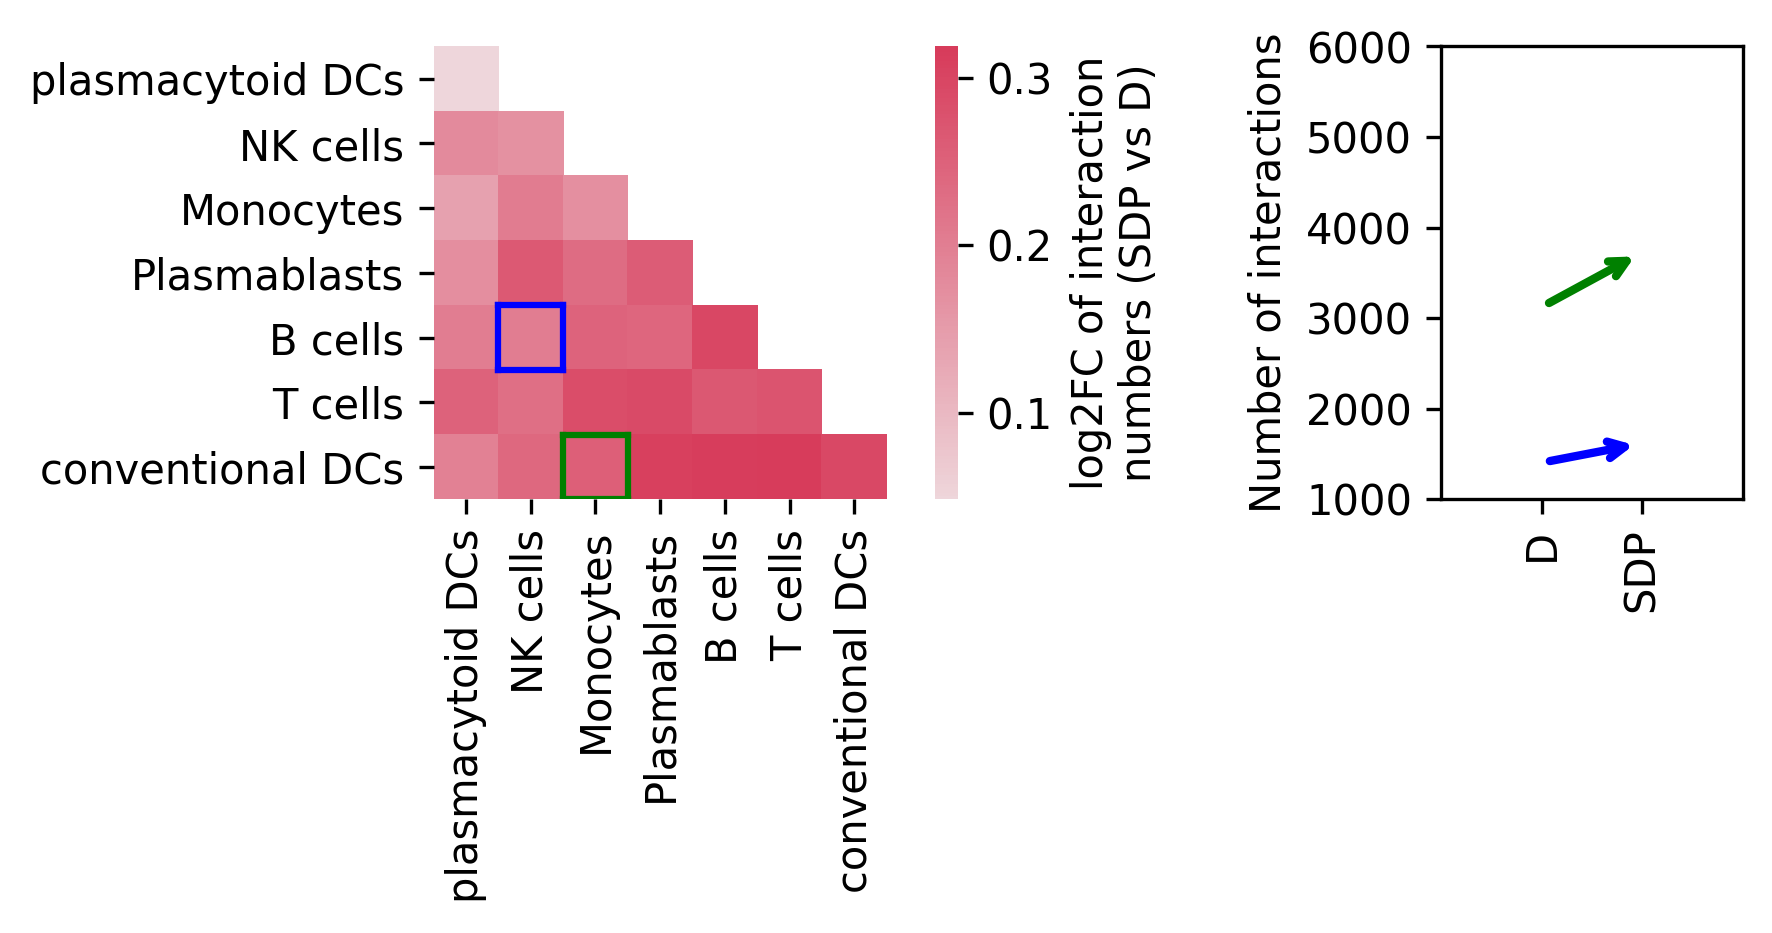

In [30]:
number_of_inters(0.04)
intern_im, it_im_new = df_log2FC_inters(0.04)
plot_log2FC_inters(it_im_new, intern_im, 0.04)

<ipython-input-28-68843a9a7530>:59: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(it_im_new, dtype=np.bool)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


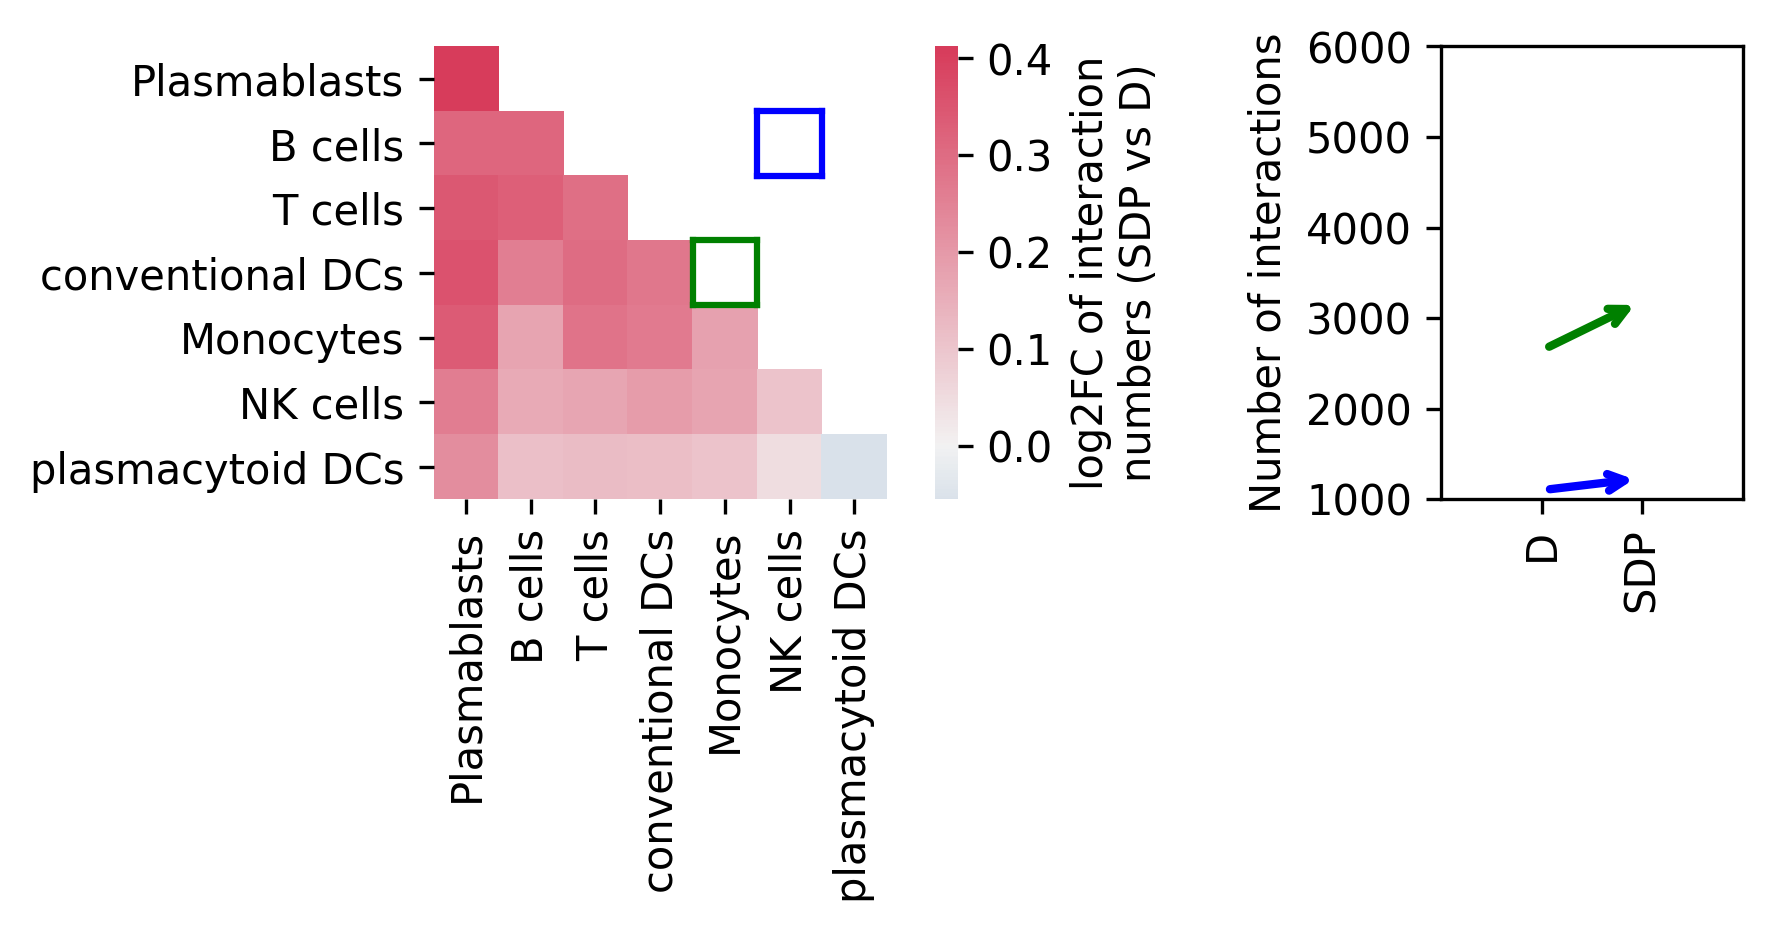

In [29]:
number_of_inters(0.06)
intern_im, it_im_new = df_log2FC_inters(0.06)
plot_log2FC_inters(it_im_new, intern_im, 0.06)

In [252]:
def df_number_inters(fra):
    inters_im = pd.read_csv(save_tables + 'omni_inters_cd_{}.tsv'.format(str(fra * 100)), sep='\t', 
                            index_col=['cell_subtype1', 'cell_subtype2', 'condition'])
    inters_im.reset_index(inplace=True)
    inters_im = inters_im[(inters_im['cell_subtype1'] != 'megakaryocytes') & (inters_im['cell_subtype2'] != 'megakaryocytes')]
    inters_im.set_index(['cell_subtype1', 'cell_subtype2', 'condition'], inplace=True)

    intern_im = {}
    for key in inters_im.index.unique():
        intern_im[key] = inters_im.loc[key].shape[0] / 1000

    ######################################################################
    print('get the heatmap showing the number of interactions at SD and D')
    it_im = pd.DataFrame([])
    ls_im = defaultdict(list)

    cts = ['B cells',
         'Plasmablasts',
         'T cells',
         'NK cells',
         'Monocytes',
         'conventional DCs',
         'plasmacytoid DCs',]
    for a in range(len(cts)):
        for b in range(len(cts)):
            ls_im[cell_types[a]].append(intern_im[(cell_types[a], cell_types[b], 'S_dengue')])
        it_im[cts[a]] = ls_im[cts[a]]

    it_im.index = pd.Index(cts) 

    ######################################################################
    from scipy.spatial.distance import pdist 
    distance = pdist(it_im.values) 

    from scipy.cluster.hierarchy import linkage, leaves_list
    lkg = linkage(distance, optimal_ordering=True)
    best_order_im = leaves_list(lkg) 
    
    cts_im_op = it_im.index[best_order_im].tolist()
    it_im_new = it_im.loc[cts_im_op][cts_im_op]
    
    return cts_im_op, it_im, intern_im

def plot_number_inters(intern_im, cts_im_op, it_im, fra):
    ######################################################################
    print('get colors for every square in the heatmap')
    colors_im = {}
    norm_intern_im = {}
    vmin, vmax = it_im.values.min() // 1, it_im.values.max() // 1 + 1

    for key in intern_im.keys():
        norm_intern_im[key] = (min(intern_im[(key)], vmax) - vmin)/(vmax - vmin)
        colors_im[key] = plt.cm.get_cmap('viridis')(norm_intern_im[key])
        
    #######################################################################
    fig, axs = plt.subplots(1, 2, figsize=[5, 2], dpi=300) 
    rcParams['font.size']= 10
    rcParams['pdf.fonttype'] = 42
    rcParams['font.sans-serif'] = "Arial"
    
    grid = plt.GridSpec(1, 4)
    axs[0] = plt.subplot(grid[:, :2])
    axs[1] = plt.subplot(grid[:, 3:4])

    plt.subplots_adjust(wspace=0.6)
   
    ###############################
    for a in range(len(cts_im_op)):
        for b in range(len(cts_im_op)):
            axs[0].axhline(b+0.5, c='white', lw=0.4)

            if a+b <= len(cts_im_op) - 1:
                dots1 = [[a, b+0.5],
                        [a+1, b+0.5],
                        [a+1, b+1],
                        [a, b+1],
                ]
                e1 = mpatches.Polygon(np.array(dots1), 
                                      facecolor=colors_im[(list(reversed(cts_im_op))[a], cts_im_op[b], 'S_dengue')], 
                                      edgecolor='white')
                axs[0].add_patch(e1)

                dots2 = [[a, b],
                        [a+1, b],
                        [a+1, b+0.5],
                        [a, b+0.5],
                ]
                e2 = mpatches.Polygon(np.array(dots2), 
                                      facecolor=colors_im[(list(reversed(cts_im_op))[a], cts_im_op[b], 'dengue')], 
                                      edgecolor='white')
                axs[0].add_patch(e2)

                if (list(reversed(cts_im_op))[a], cts_im_op[b]) == ('Monocytes', 'conventional DCs'):
                    axs[0].plot([a, a+1], [b, b], color='green')
                    axs[0].plot([a+1, a+1], [b, b+1], color='green')
                    axs[0].plot([a, a+1], [b+1, b+1], color='green')
                    axs[0].plot([a, a], [b, b+1], color='green')

                elif (list(reversed(cts_im_op))[a], cts_im_op[b]) == ('NK cells', 'B cells'):
                    axs[0].plot([a, a+1], [b, b], color='gray')
                    axs[0].plot([a+1, a+1], [b, b+1], color='gray')
                    axs[0].plot([a, a+1], [b+1, b+1], color='gray')
                    axs[0].plot([a, a], [b, b+1], color='gray')

    axs[0].set_xlim([0, len(cts_im_op) + 0.05])
    axs[0].set_ylim([0,len(cts_im_op) + 0.1])
    axs[0].set_xticks([i + 0.5 for i in range(len(cts_im_op))])
    axs[0].set_yticks([i + 0.5 for i in range(len(cts_im_op))])

    labels =[ct.replace('_', ' ') for ct in cts_im_op]
    axs[0].set_xticklabels(list(reversed(labels)), rotation=90)
    axs[0].set_yticklabels(labels)

    norm_im = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap_im = plt.cm.get_cmap('viridis')
    position_im = fig.add_axes([0.5, 0.2, 0.02, 0.6])
    cbar_im = plt.colorbar(plt.cm.ScalarMappable(norm=norm_im, cmap=cmap_im), 
                           cax=position_im, ax=axs[0], fraction=0.01, pad=0.01, orientation='vertical')

    axs[0].text(len(cts_im_op) + 2.8, 3, '# interactions (×$10^3$)', verticalalignment='center', rotation=90)

    #####################################################################
    y_green = [intern_im['Monocytes', 'conventional DCs','dengue'], 
              intern_im['Monocytes', 'conventional DCs', 'S_dengue']]

    y_blue = [intern_im['NK cells', 'B cells', 'dengue'], 
              intern_im['NK cells', 'B cells', 'S_dengue']]

    axs[1].annotate('', xytext=(1, y_green[0]),
                    xy=(2, y_green[1]),
                 arrowprops=dict(arrowstyle= '->',
                                 color='green',
                                 lw=2,
                                 ls='-')
               )

    axs[1].annotate('', xytext=(1, y_blue[0]),
                    xy=(2, y_blue[1]),
                 arrowprops=dict(arrowstyle= '->',
                                 color='blue',
                                 lw=2,
                                 ls='-')
               )

    axs[1].set_xlim(0, 3)
    axs[1].set_xticks([1, 2])
    axs[1].set_xticklabels(['D', 'SDP'], rotation=90)
    axs[1].set_ylim(vmin, vmax)
    axs[1].set_ylabel('# interactions (×$10^3$)')

    plt.show()
    fig.savefig(save_figures + 'omni_inters_cd_n{}.png'.format(str(fra * 100)), bbox_inches='tight')
    fig.savefig(save_figures + 'omni_inters_cd_n{}.pdf'.format(str(fra * 100)), bbox_inches='tight')
    

<ipython-input-252-af324216060a>:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  intern_im[key] = inters_im.loc[key].shape[0] / 1000


get the heatmap showing the number of interactions at SD and D
get colors for every square in the heatmap


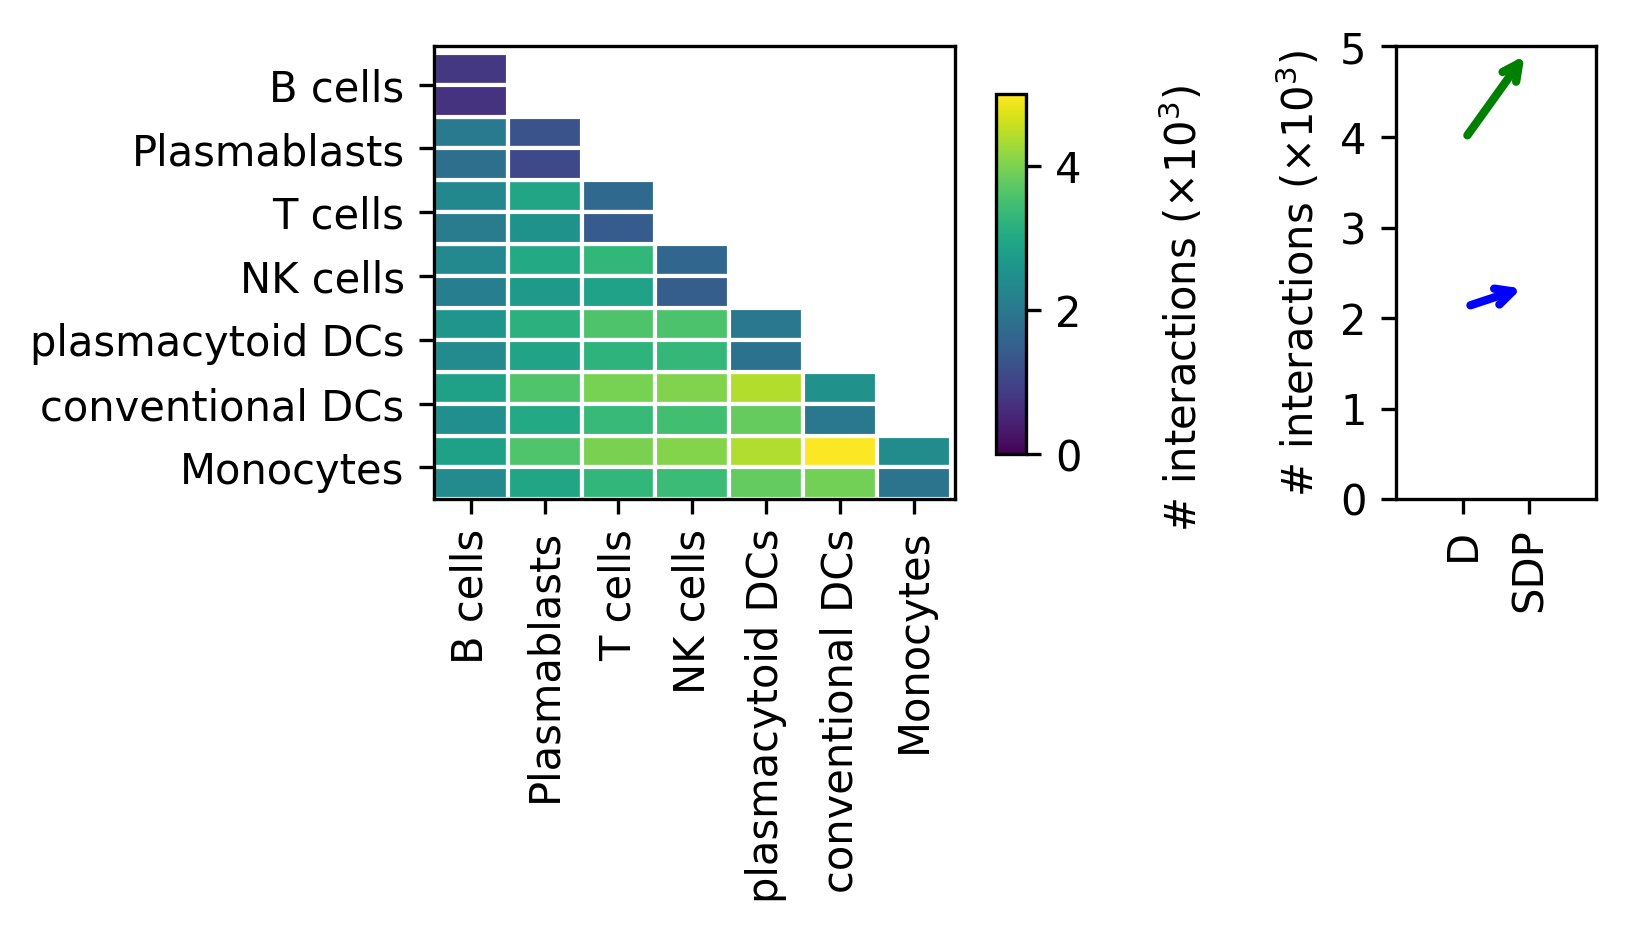

In [253]:
cts_im_op1, it_im1, intern_im1 = df_number_inters(0.02)
plot_number_inters(intern_im1, cts_im_op1, it_im1, 0.02)

<ipython-input-252-af324216060a>:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  intern_im[key] = inters_im.loc[key].shape[0] / 1000


get the heatmap showing the number of interactions at SD and D
get colors for every square in the heatmap


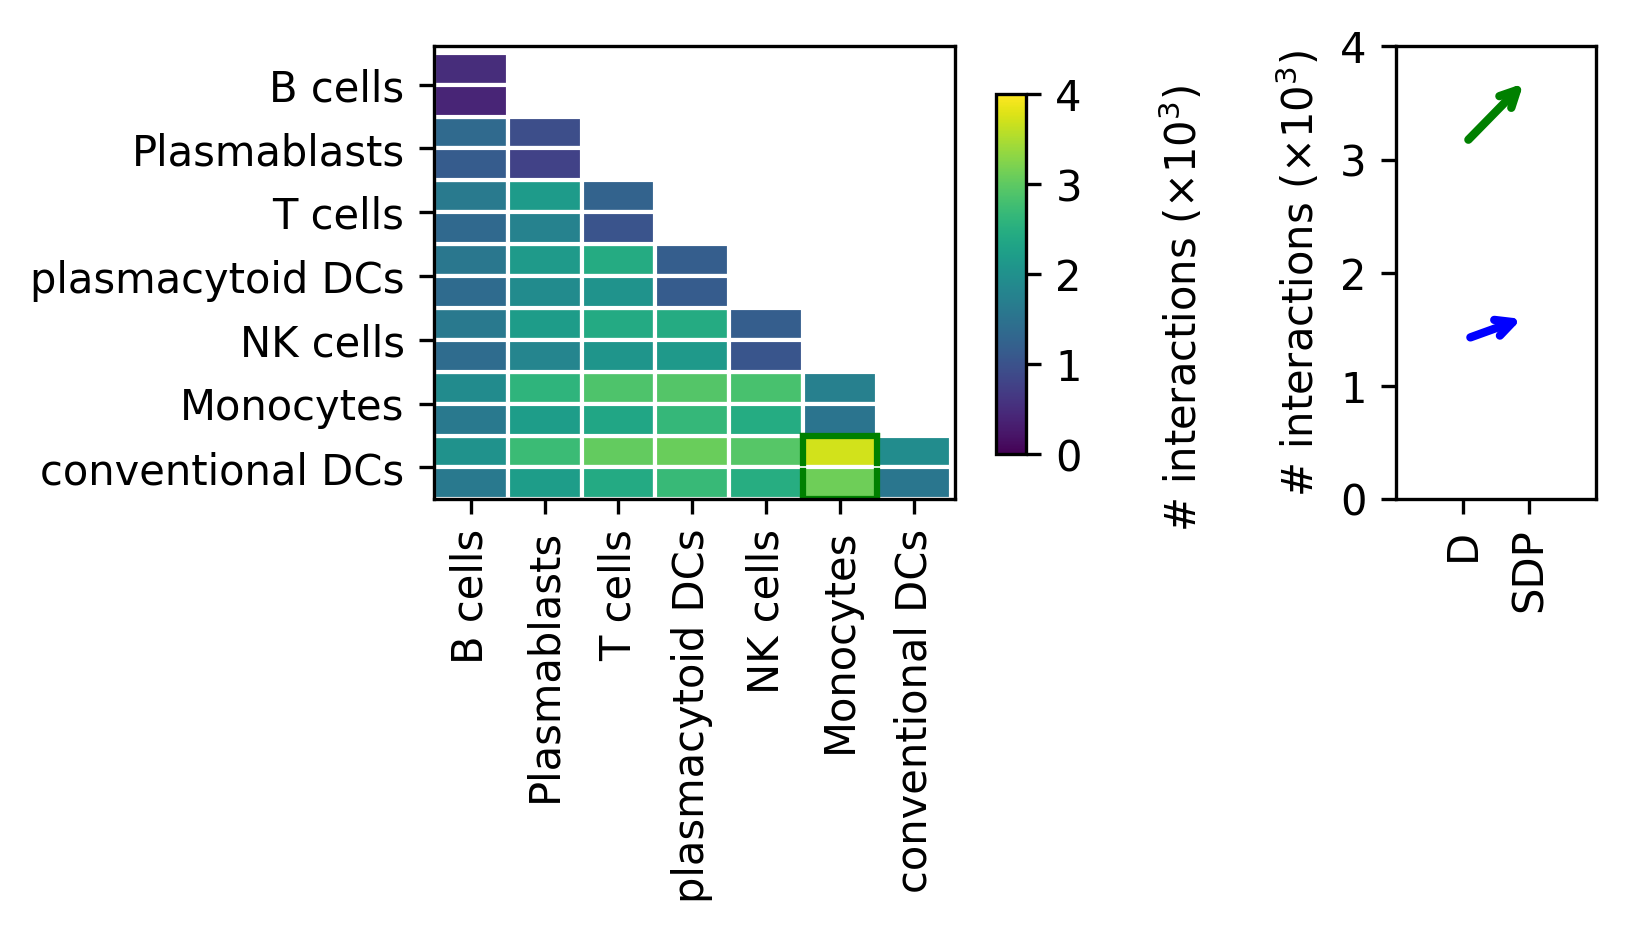

In [254]:
cts_im_op2, it_im2, intern_im2 = df_number_inters(0.04)

plot_number_inters(intern_im2, cts_im_op2, it_im2, 0.04)

<ipython-input-252-af324216060a>:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  intern_im[key] = inters_im.loc[key].shape[0] / 1000


get the heatmap showing the number of interactions at SD and D
get colors for every square in the heatmap


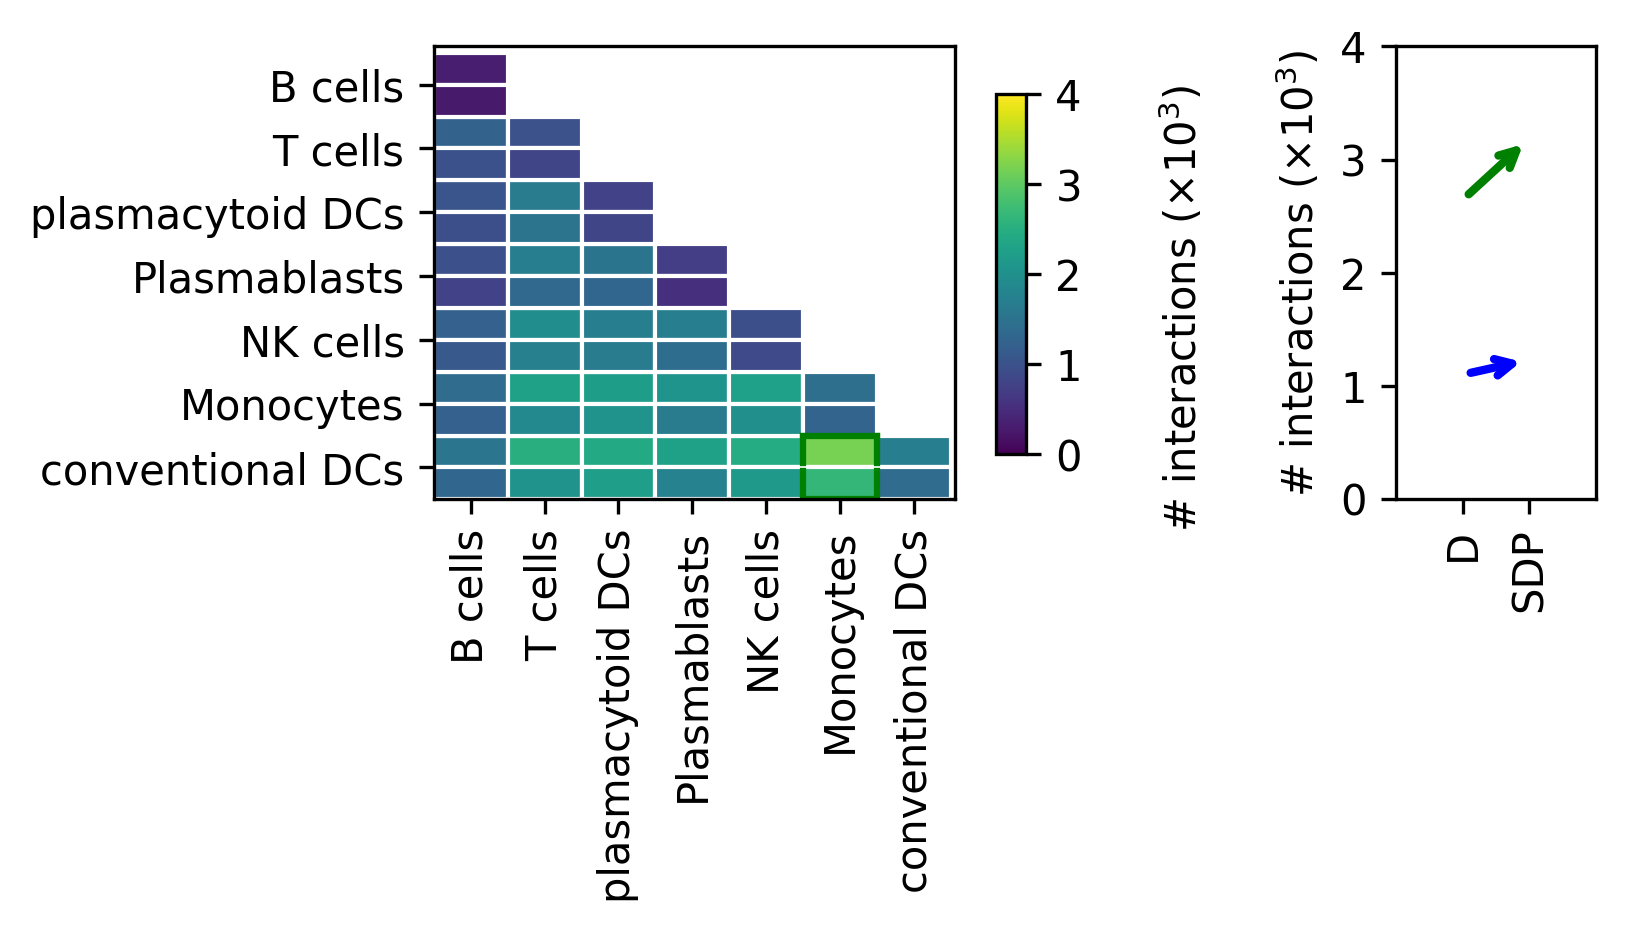

In [255]:
cts_im_op6, it_im6, intern_im6 = df_number_inters(0.06)

plot_number_inters(intern_im6, cts_im_op6, it_im6, 0.06)

In [211]:
def plot_n_fras():  
    n = []
    for fra in [0.02, 0.04, 0.06]:
        inters_im = pd.read_csv(save_tables + 'omni_inters_cd_{}.tsv'.format(str(fra * 100)), sep='\t', 
                                        index_col=['cell_subtype1', 'cell_subtype2', 'condition'])
        inters_im.reset_index(inplace=True)
        inters_im = inters_im[(inters_im['cell_subtype1'] != 'megakaryocytes') &
                              (inters_im['cell_subtype2'] != 'megakaryocytes')]
        inters_im.set_index('condition', inplace=True)


        for cd in ['S_dengue', 'dengue']:
            it_cd = inters_im.loc[cd]
            for ct in cell_types:
                ct_n = it_cd[(it_cd['cell_subtype1'] == ct) | (it_cd['cell_subtype2'] == ct)].shape[0]
                n.append([fra * 100, cd, ct, ct_n])
    n = pd.DataFrame(n, columns=['Threshould (%)', 'Condition', 'Cell type', '# interactions'])

    n.loc[n['Condition'] == 'dengue', '# interactions'] = - n[n['Condition'] == 'dengue'] ['# interactions']
    n['# interactions'] = n['# interactions'] / 10000
    n.set_index('Condition', inplace=True)
    order = n.loc['S_dengue'][n.loc['S_dengue']['Threshould (%)'] == 2].sort_values('# interactions', ascending=False)['Cell type'].tolist()

    ###################################
    fig, axs = plt.subplots(2, 1, figsize=[6, 4], dpi=300)
    rcParams['font.size']= 20
    rcParams['pdf.fonttype'] = 42
    rcParams['figure.dpi'] = 300
    rcParams['font.sans-serif'] = "Arial"
    
    plt.subplots_adjust(hspace=0)
    cmap = [ct_palette[ct] for ct in order]
    sns.barplot(data=n.loc['S_dengue'], hue='Cell type', x='Threshould (%)', y='# interactions', 
               hue_order=order, palette=cmap, alpha=0.9, ax=axs[0])
    sns.barplot(data=n.loc['dengue'], hue='Cell type', x='Threshould (%)', y='# interactions', 
               hue_order=order, palette=cmap, alpha=0.5, ax=axs[1])

    axs[0].spines['right'].set_visible(False)
    axs[0].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['bottom'].set_visible(False)

    axs[0].legend(bbox_to_anchor=(0.95, 0.8), frameon=False, labelspacing=0.15)
    axs[1].legend().remove()

    axs[0].set_ylim([0, 5.2])
    axs[0].set_yticks([0, 2, 4])
    axs[0].set_yticklabels(['0', '2', '4'])
    axs[0].set_xticks([0, 1, 2])
    axs[0].set_xticklabels(['0', '1', '2'])

    #axs[1].xaxis.tick_top()
    axs[1].set_ylim([-4.2, 0])
    axs[1].set_yticks([-4, -2, 0])
    axs[1].set_yticklabels(['4', '2', '0'])

    axs[0].set_ylabel(None)
    axs[1].set_ylabel(None)
    axs[1].set_xlabel('Exp frac (%)')
    fig.text(0.02, 0.15, '# interactions (×$10^4$)',verticalalignment='baseline', horizontalalignment='left',
                rotation=90)
    fig.text(-0.03, 0.4, 'D',verticalalignment='baseline', horizontalalignment='left',
            rotation=90)
    fig.text(-0.03, 0.6, 'SDp',verticalalignment='baseline', horizontalalignment='left',
            rotation=90)

    fig.savefig(save_figures + 'n_inters.png', bbox_inches='tight')
    fig.savefig(save_figures + 'n_inters.pdf', bbox_inches='tight')

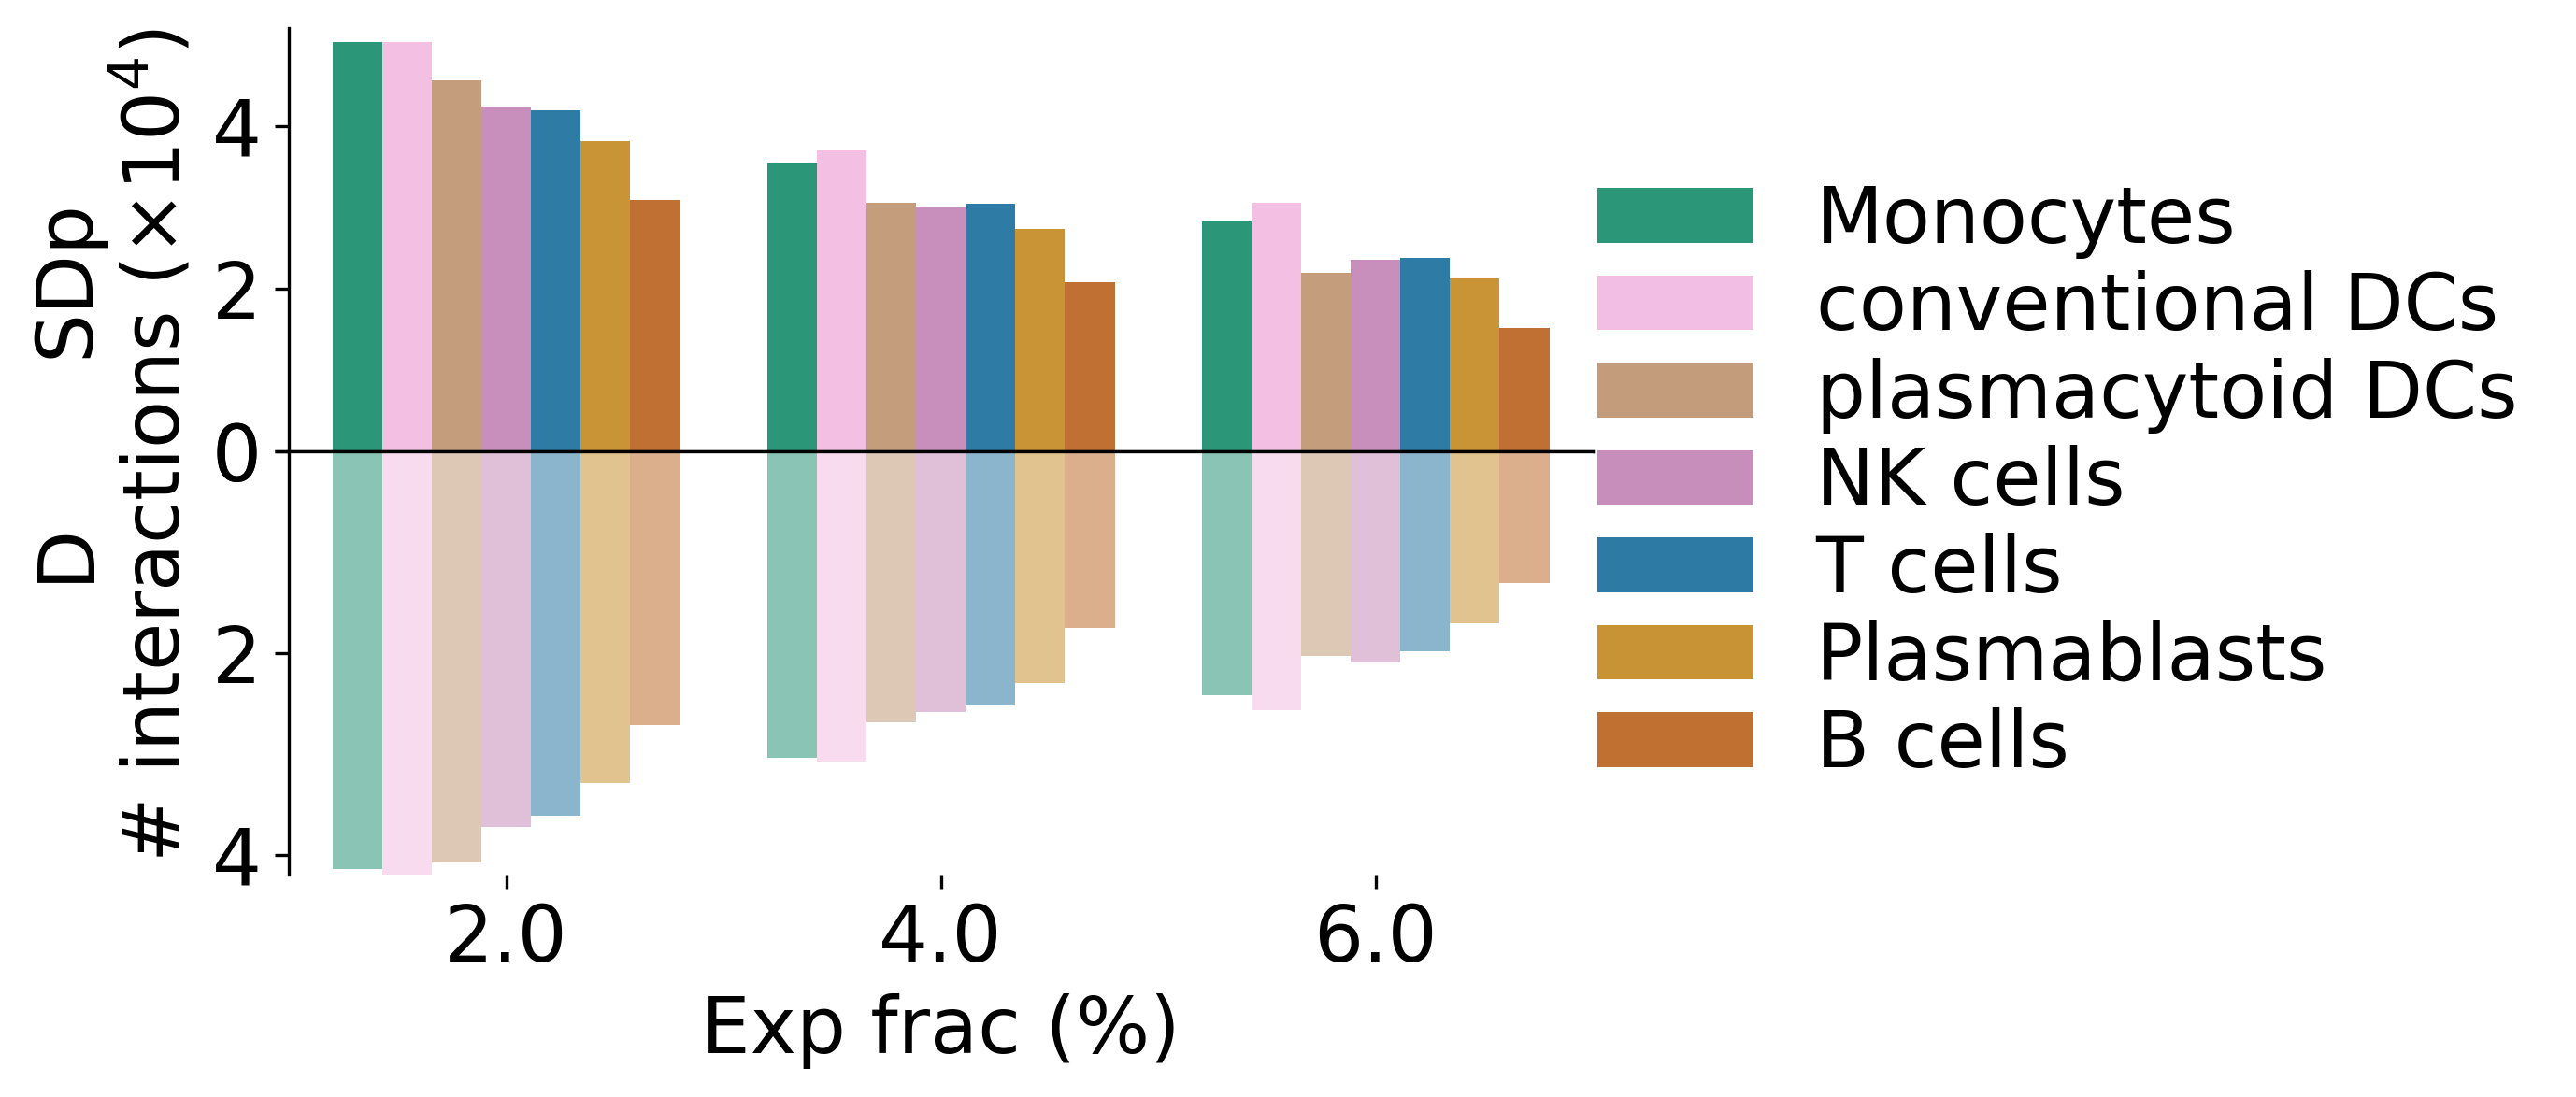

In [212]:
plot_n_fras()

# Get the ratio between number of downregulated genes and upregulated genes in each cell type

In [12]:
def interacting_DEGs():
    print('only analyzing interacting genes')

    n = []
    for ct in cell_types:
        data_ct = ct_pair.loc[ct].loc[genes] ## interacting genes
        up_ct = ((data_ct['med_pair'] >= 1) & (data_ct['fra_pair'] >= 39/56) & (data_ct['S_fra'] >= 0.02)).sum()
        down_ct = ((data_ct['med_pair'] <= -1) & (data_ct['neg_fra_pair'] >= 39/56) & (data_ct['NS_fra'] >= 0.02)).sum()
        n_ct = (up_ct + down_ct)
        n.append([ct, up_ct, -down_ct, n_ct])

    n = pd.DataFrame(n, 
                         columns=['cell_type', 
                                  'Number of upregulated DEGs', 
                                  'Number of downregulated DEGs',
                                  'Number of DEGs']).sort_values('Number of DEGs')
    ############################################################
    rcParams['font.size']= 20
    rcParams['pdf.fonttype'] = 42
    rcParams['figure.dpi'] = 300
    rcParams['font.sans-serif'] = "Arial"

    fig, axs = plt.subplots(2, 1, figsize=[8, 6])

    grid = plt.GridSpec(7, 1)
    axs[0] = plt.subplot(grid[:5, :1])
    axs[1] = plt.subplot(grid[5:7, :1])

    plt.subplots_adjust(hspace=0)

    n = n.sort_values('Number of DEGs', ascending=False)
    order = n['cell_type']
    cmap = [ct_palette[ct] for ct in order]

    sns.barplot(data=n, x='cell_type', y='Number of upregulated DEGs', palette=cmap, ax=axs[0], alpha=0.9) # orient='h',
    axs[0].set_xticklabels([])
    axs[0].set_xlabel(None)
    axs[0].set_ylabel(None)
    axs[0].set_ylim(0, 70)
    axs[0].set_xlim(-0.5, len(cell_types) - 0.5)
    axs[0].set_yticks(range(0, 71, 10))
    axs[0].spines['right'].set_visible(False)
    axs[0].spines['top'].set_visible(False)

    sns.barplot(data=n, x='cell_type', y='Number of downregulated DEGs', palette=cmap, ax=axs[1], alpha=0.5) # orient='h',
    axs[1].xaxis.tick_top()
    axs[1].set_xlim(-0.5, len(cell_types) - 0.5)
    axs[1].set_xticklabels([])
    axs[1].set_xlabel(None)
    axs[1].set_ylabel(None)
    axs[1].set_ylim(-20, 0)
    axs[1].set_yticks([-20, -10, 0])
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['bottom'].set_visible(False)

    fig.text(-0.01, 0.1, 'Down-DEGs        Up-DEGs',verticalalignment='baseline', horizontalalignment='left',
                rotation=90)

    handles = []
    labels = []
    for ct, color in zip(order, cmap):
        h = axs[0].scatter([], [], marker='s', s=40, color=color,)
        handles.append(h)
        labels.append(ct)
    axs[0].legend(handles, labels, loc='upper right', frameon=False, labelspacing=0.1)#
    fig.savefig(save_figures + 'interacting_DEGs.png',bbox_inches='tight')
    fig.savefig(save_figures + 'interacting_DEGs.pdf',bbox_inches='tight')
    
def interacting_DEGs_ratio():
    print('ratio of interacting DEGs vs all DEGs')
    
    n = []
    for ct in cell_types:
        data_ct = ct_pair.loc[ct]
        up_n = ((data_ct['log2_fold_change'] >= 1) & (data_ct['pvalue_corrected'] <= 0.05)).sum()
        down_n = ((data_ct['log2_fold_change'] <= -1) & (data_ct['pvalue_corrected'] <= 0.05)).sum()
        n_ct = up_n + down_n
        
        it_data_ct = ct_pair.loc[ct].loc[genes]
        it_up_ct = ((it_data_ct['med_pair'] >= 1) & (it_data_ct['fra_pair'] >= 39/56) & (it_data_ct['S_fra'] >= 0.02)).sum()
        it_down_ct = ((it_data_ct['med_pair'] <= -1) & (it_data_ct['neg_fra_pair'] >= 39/56) & (it_data_ct['NS_fra'] >= 0.02)).sum()
        it_n_ct = (it_up_ct + it_down_ct)
        
        ratio = it_n_ct / n_ct * 100
        n.append([ct, ratio])

    n = pd.DataFrame(n, columns=['cell_type', 
                                 'Ratio of interacting DEGs / DEGs (%)'])

    ############################################################
    rcParams['font.size']= 20
    rcParams['pdf.fonttype'] = 42
    rcParams['figure.dpi'] = 300
    rcParams['font.sans-serif'] = "Arial"

    fig, ax = plt.subplots(figsize=[6, 4])

    n = n.sort_values('Ratio of interacting DEGs / DEGs (%)', ascending=False)
    order = n['cell_type']
    cmap = [ct_palette[ct] for ct in order]

    sns.barplot(data=n, x='cell_type', y='Ratio of interacting DEGs / DEGs (%)', palette=cmap, ax=ax, alpha=0.9) # orient='h',
    ax.set_xticklabels([i.get_text() for i in ax.get_xticklabels()], rotation=90)
    ax.set_xlabel(None)
    #ax.set_ylabel(None)
    ax.set_ylim(0, 60)
    ax.set_xlim(-0.5, len(cell_types) - 0.5)
    ax.set_yticks(range(0, 61, 10))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

#     handles = []
#     labels = []
#     for ct, color in zip(order, cmap):
#         h = ax.scatter([], [], marker='s', s=40, color=color,)
#         handles.append(h)
#         labels.append(ct)
#     ax.legend(handles, labels, loc='upper right', frameon=False, labelspacing=0.1)#
    fig.savefig(save_figures + 'interacting_DEGs_ratio.png',bbox_inches='tight')
    fig.savefig(save_figures + 'interacting_DEGs_ratio.pdf',bbox_inches='tight')

only analyzing interacting genes


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


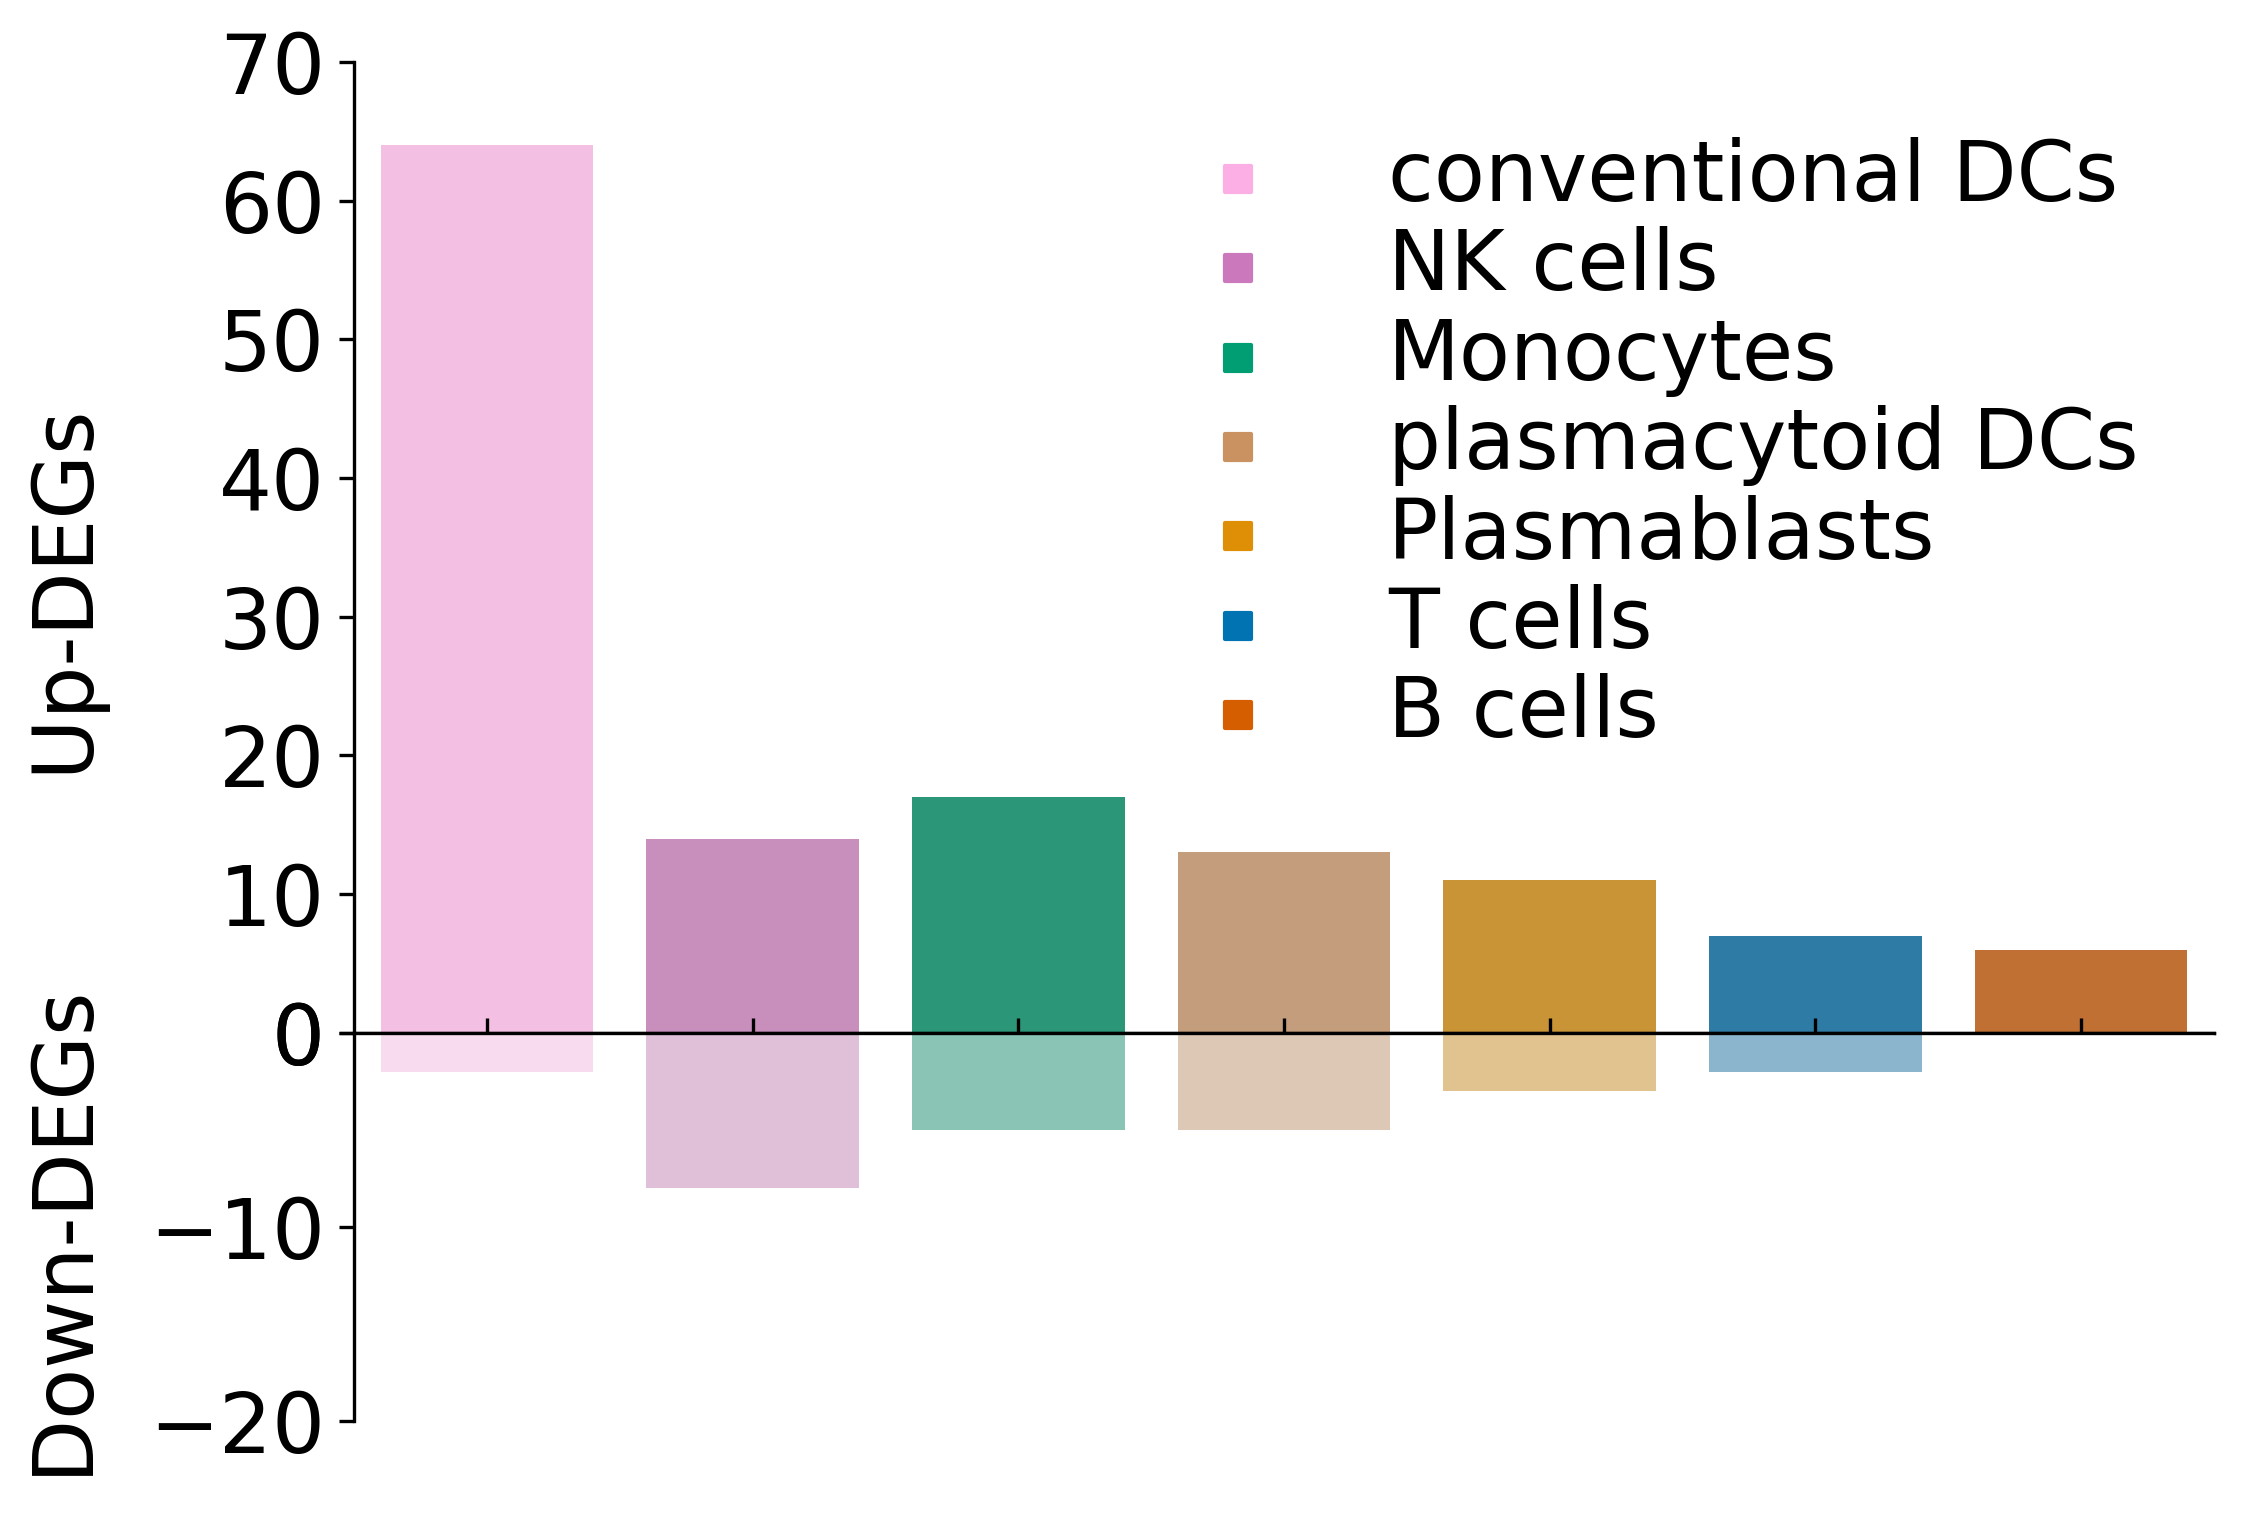

In [15]:
interacting_DEGs()

ratio of interacting DEGs vs all DEGs


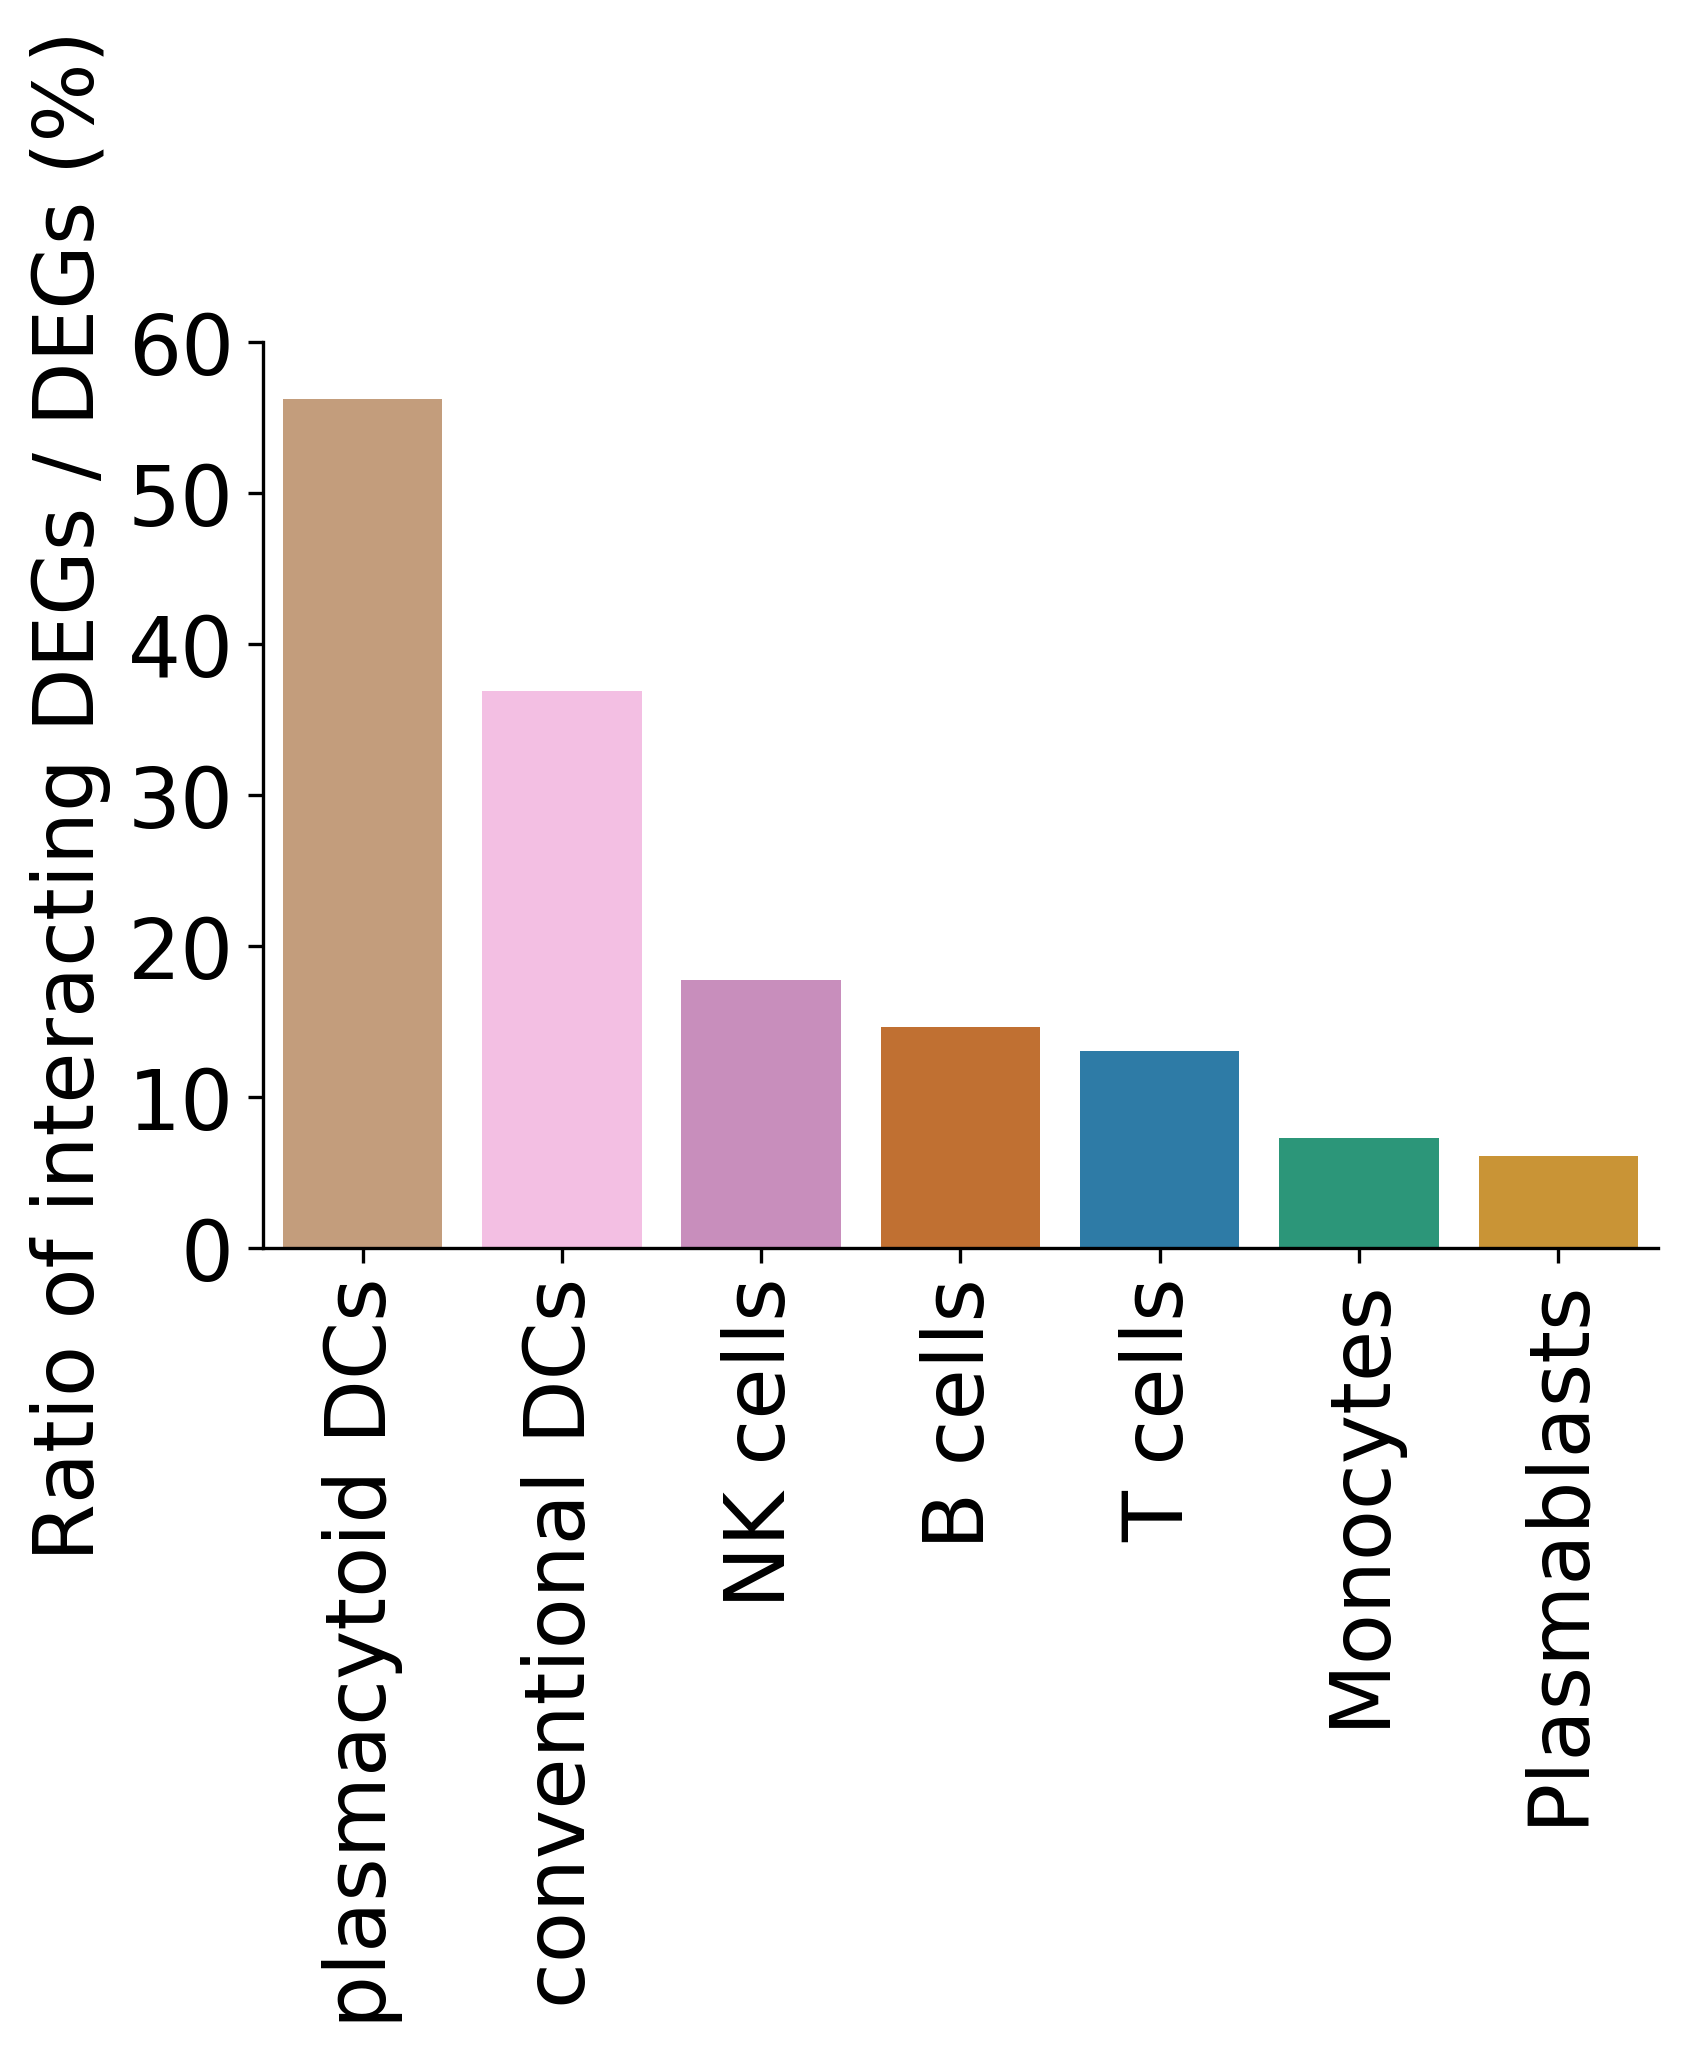

In [19]:
interacting_DEGs_ratio()

In [62]:
def DEGs_ratio_correlation():
    print('ratio of interacting DEGs vs all DEGs')
    
    n = []
    for ct in cell_types:
        data_ct = ct_pair.loc[ct]
        up_n = ((data_ct['log2_fold_change'] >= 1) & (data_ct['pvalue_corrected'] <= 0.05)).sum()
        down_n = ((data_ct['log2_fold_change'] <= -1) & (data_ct['pvalue_corrected'] <= 0.05)).sum()
        n_ct = up_n + down_n
        
        it_data_ct = ct_pair.loc[ct].loc[genes]
        it_up_ct = ((it_data_ct['med_pair'] >= 1) & (it_data_ct['fra_pair'] >= 39/56) & (it_data_ct['S_fra'] >= 0.02)).sum()
        it_down_ct = ((it_data_ct['med_pair'] <= -1) & (it_data_ct['neg_fra_pair'] >= 39/56) & (it_data_ct['NS_fra'] >= 0.02)).sum()
        it_n_ct = (it_up_ct + it_down_ct)
        
        ratio = it_n_ct / n_ct * 100
        n.append([ct, n_ct, ratio])

    n = pd.DataFrame(n, columns=['cell_type', 
                                 'Number of DEGs',
                                 'Ratio of interacting DEGs / DEGs (%)'])

    ############################################################
    rcParams['font.size']= 18
    rcParams['pdf.fonttype'] = 42
    rcParams['figure.dpi'] = 300
    rcParams['font.sans-serif'] = "Arial"

    fig, ax = plt.subplots(figsize=[4, 4])

    n = n.sort_values('Ratio of interacting DEGs / DEGs (%)', ascending=False)
    order = n['cell_type']
    cmap = [ct_palette[ct] for ct in order]

    sns.scatterplot(data=n, x='Number of DEGs', y='Ratio of interacting DEGs / DEGs (%)',
                   c=cmap, ax=ax, alpha=0.9, s=250)
    
    ax.set_ylim(0, 60)
    ax.set_yticks(range(0, 61, 20))
    ax.set_ylabel('Ratio of interacting DEGs\n/ DEGs (%)')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    fig.savefig(save_figures + 'DEGs_ratio_correlation.png',bbox_inches='tight')
    fig.savefig(save_figures + 'DEGs_ratio_correlation.pdf',bbox_inches='tight')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


ratio of interacting DEGs vs all DEGs


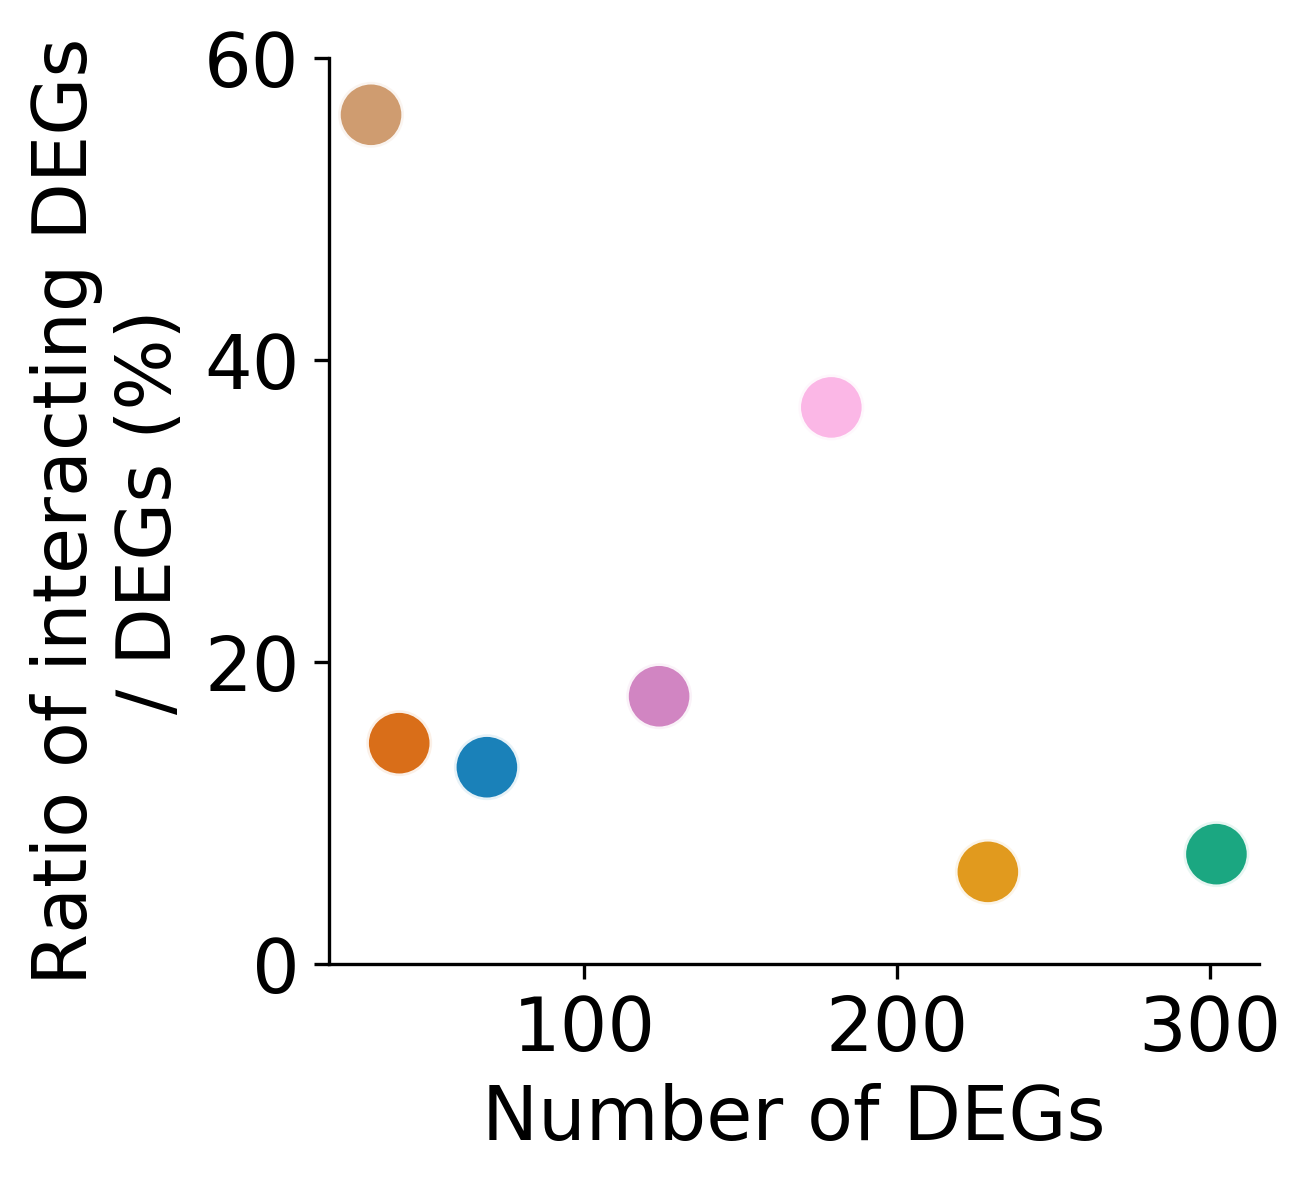

In [63]:
DEGs_ratio_correlation()

# get significant differential expressed interactions

In [59]:
def get_DEIs(data_ct, cts, up_DEGs, down_DEGs):

    fn_int = '/home/yike/phd/dengue/data/interaction_source_file/inters_YK_20220324.tsv'
    interactions = pd.read_csv(fn_int, sep='\t')[['genesymbol_intercell_source', 'genesymbol_intercell_target']]
    genes = np.unique(interactions)
    genes = [gene for gene in genes if gene in adata_kid.var_names]

    res = []
    for _, row in interactions.iterrows():
        ga = row['genesymbol_intercell_source']
        gb = row['genesymbol_intercell_target']
        if (ga not in genes) | (gb not in genes):
            continue

        for cst in cts:
            cst_med = {gene: data_ct.loc[cst, gene]['med_pair'] for gene in [ga, gb]} 
            cst_fra_pair = {gene: data_ct.loc[cst, gene]['fra_pair'] for gene in [ga, gb]} 
            cst_neg_fra_pair = {gene: data_ct.loc[cst, gene]['neg_fra_pair'] for gene in [ga, gb]}
            cst_fra = {(gene, cd): data_ct.loc[cst, gene][cd+'_fra'] for gene in [ga, gb] for cd in ['S', 'NS']}
            for ct in cts:
                ct_med = {gene: data_ct.loc[ct, gene]['med_pair'] for gene in [ga, gb]}
                ct_fra_pair = {gene: data_ct.loc[ct, gene]['fra_pair'] for gene in [ga, gb]}
                ct_neg_fra_pair = {gene: data_ct.loc[ct, gene]['neg_fra_pair'] for gene in [ga, gb]}
                ct_fra = {(gene, cd): data_ct.loc[ct, gene][cd+'_fra'] for gene in [ga, gb] for cd in ['S', 'NS']}

                if (ga in up_DEGs[cst].index) & (gb in up_DEGs[ct].index):
                    res.append([
                            ga, cst, cst_med[ga], cst_fra_pair[ga], cst_neg_fra_pair[ga], cst_fra[ga, 'S'], cst_fra[ga, 'NS'],
                            gb, ct, ct_med[gb], ct_fra_pair[gb], ct_neg_fra_pair[gb], ct_fra[gb, 'S'], ct_fra[gb, 'NS'], 'up'
                        ])

                if (ga in down_DEGs[cst].index) & (gb in down_DEGs[ct].index):
                    res.append([
                            ga, cst, cst_med[ga], cst_fra_pair[ga], cst_neg_fra_pair[ga], cst_fra[ga, 'S'], cst_fra[ga, 'NS'],
                            gb, ct, ct_med[gb], ct_fra_pair[gb], ct_neg_fra_pair[gb], ct_fra[gb, 'S'], ct_fra[gb, 'NS'], 'down'
                        ])

                if (ga in up_DEGs[cst].index) & (gb in down_DEGs[ct].index):
                    res.append([
                            ga, cst, cst_med[ga], cst_fra_pair[ga], cst_neg_fra_pair[ga], cst_fra[ga, 'S'], cst_fra[ga, 'NS'],
                            gb, ct, ct_med[gb], ct_fra_pair[gb], ct_neg_fra_pair[gb], ct_fra[gb, 'S'], ct_fra[gb, 'NS'], 'mix'
                        ])

                if (ga in down_DEGs[cst].index) & (gb in up_DEGs[ct].index):
                    res.append([
                            gb, ct, ct_med[gb], ct_fra_pair[gb], ct_neg_fra_pair[gb], ct_fra[gb, 'S'], ct_fra[gb, 'NS'], 
                            ga, cst, cst_med[ga], cst_fra_pair[ga], cst_neg_fra_pair[ga], cst_fra[ga, 'S'], cst_fra[ga, 'NS'], 'mix'
                        ])

    res = pd.DataFrame(res, columns=[
        'ga', 'csta', 'ga_med_pair', 'ga_fra_pair','ga_neg_fra_pair','ga_SD_fra', 'ga_D_fra', 
        'gb', 'cstb', 'gb_med_pair', 'gb_fra_pair','gb_neg_fra_pair','gb_SD_fra', 'gb_D_fra',
        'inter_type'])
                
    return res

In [67]:
fn_int = '/home/yike/phd/dengue/data/interaction_source_file/inters_YK_20220324.tsv'
interactions = pd.read_csv(fn_int, sep='\t')[['genesymbol_intercell_source', 'genesymbol_intercell_target']]
genes = np.unique(interactions)
genes = [gene for gene in genes if gene in adata_kid.var_names]

up_DEGs = {}
down_DEGs = {}

cts = adata_kid.obs['cell_type_new'].unique().tolist()
if 'doublets' in cts:
    cts.remove('doublets')
if 'unknown' in cts:
    cts.remove('unknown')  
cts.remove('megakaryocytes')

for ct in cts:
    data_ct = ct_pair.loc[ct].loc[genes] ## interacting genes
    up_ct = data_ct[((data_ct['med_pair'] >= 1) & (data_ct['fra_pair'] >= 39/56) & (data_ct['S_fra'] >= 0.02))]
    up_DEGs[ct] = up_ct
    down_ct = data_ct[((data_ct['med_pair'] <= -1) & (data_ct['neg_fra_pair'] >= 39/56) & (data_ct['NS_fra'] >= 0.02))]
    down_DEGs[ct] = down_ct
    
    
res_inters = get_DEIs(ct_pair, cts, up_DEGs, down_DEGs)  
res_inters = res_inters[~ res_inters[['ga', 'csta', 'gb', 'cstb']].duplicated()]
res_inters.to_csv(save_tables + 'inters_med_pair1_pair39_56_exp002.tsv', sep='\t', index=False)

<ipython-input-67-40098b9c9b69>:2: DtypeWarning: Columns (2,3,4,5,6,18,26,27,28,29,30,33,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions = pd.read_csv(fn_int, sep='\t')[['genesymbol_intercell_source', 'genesymbol_intercell_target']]
<ipython-input-59-864eed99a941>:4: DtypeWarning: Columns (2,3,4,5,6,18,26,27,28,29,30,33,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions = pd.read_csv(fn_int, sep='\t')[['genesymbol_intercell_source', 'genesymbol_intercell_target']]


In [72]:
fn_int = '/home/yike/phd/dengue/data/interaction_source_file/inters_YK_20220324.tsv'
interactions = pd.read_csv(fn_int, sep='\t')[['genesymbol_intercell_source', 'genesymbol_intercell_target']]
genes = np.unique(interactions)
genes = [gene for gene in genes if gene in adata_kid.var_names]

cst_up_DEGs = {}
cst_down_DEGs = {}

csts = adata_kid.obs['cell_subtype_new'].unique().tolist()
if 'doublets' in csts:
    csts.remove('doublets')
if 'unknown' in csts:
    csts.remove('unknown')  
csts.remove('megakaryocytes')

for cst in csts:
    data_cst = cst_pair.loc[cst].loc[genes] ## interacting genes
    up_cst = data_cst[((data_cst['med_pair'] >= 1) & (data_cst['fra_pair'] >= 39/56) & (data_cst['S_fra'] >= 0.02))]
    cst_up_DEGs[cst] = up_cst
    down_cst = data_cst[((data_cst['med_pair'] <= -1) & (data_cst['neg_fra_pair'] >= 39/56) & (data_cst['NS_fra'] >= 0.02))]
    cst_down_DEGs[cst] = down_cst
    
    
cst_res_inters = get_DEIs(cst_pair, csts, cst_up_DEGs, cst_down_DEGs)   
cst_res_inters = cst_res_inters[~ cst_res_inters[['ga', 'csta', 'gb', 'cstb']].duplicated()]
cst_res_inters.to_csv(save_tables + 'cst_inters_med_pair1_pair39_56_exp002.tsv', sep='\t', index=False)

<ipython-input-72-70886182938a>:2: DtypeWarning: Columns (2,3,4,5,6,18,26,27,28,29,30,33,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions = pd.read_csv(fn_int, sep='\t')[['genesymbol_intercell_source', 'genesymbol_intercell_target']]
<ipython-input-59-864eed99a941>:4: DtypeWarning: Columns (2,3,4,5,6,18,26,27,28,29,30,33,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions = pd.read_csv(fn_int, sep='\t')[['genesymbol_intercell_source', 'genesymbol_intercell_target']]


In [228]:
if False:
    def plus(ori_res_inters, res_inters):    
        idx_plus = []
        idx = []
        ori_idx = ori_res_inters.set_index(['ga', 'csta', 'gb', 'cstb']).index.tolist()

        for i, row in res_inters.iterrows():
            ga = row['ga']
            csta = row['csta']
            gb = row['gb']
            cstb = row['cstb']

            if ((ga, csta, gb, cstb) not in ori_idx) & (( gb, cstb, ga, csta,) not in ori_idx):
                idx_plus.append(i) 
            elif ((ga, csta, gb, cstb) in ori_idx) | (( gb, cstb, ga, csta,) in ori_idx):
                idx.append(i)
        return idx_plus, idx

    def o_plus(res_inters, ori_res_inters):    
        o_idx_plus = []

        idx = res_inters.set_index(['ga', 'csta', 'gb', 'cstb']).index
        for i, row in ori_res_inters.iterrows():
            ga = row['ga']
            csta = row['csta']
            gb = row['gb']
            cstb = row['cstb']

            if ((ga, csta, gb, cstb) not in idx) & ((gb, cstb, ga, csta) not in idx):
                o_idx_plus.append(i)
        return o_idx_plus

    idx_plus, idx = plus(ori_res_inters, res_inters)
    cst_idx_plus, cst_idx = plus(ori_cst_res_inters, cst_res_inters)

    res_inters.loc[idx_plus].to_csv(save_figures + 'ct_inters_plus.tsv', sep='\t')
    cst_res_inters.loc[cst_idx_plus].to_csv(save_figures + 'cst_inters_plus.tsv', sep='\t')

In [229]:
ct_inters_plus = pd.read_csv(save_tables + 'ct_inters_plus.tsv', sep='\t')
cst_inters_plus = pd.read_csv(save_tables + 'cst_inters_plus.tsv', sep='\t')

In [230]:
# randomization test
r_genes = [{'ga': ga, 'cta': cta, 'gb': gb, 'ctb': ctb} for ga, cta, gb, ctb in zip(ct_inters_plus['ga'].tolist(), 
                                                                                    ct_inters_plus['csta'].tolist(), 
                                                                                    ct_inters_plus['gb'].tolist(), 
                                                                                    ct_inters_plus['cstb'].tolist())]
ran_res = randomization(r_genes, adata_kid)
ran_res.to_csv(save_tables + 'randomization_inters_plus.tsv', sep='\t')

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


0


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attrib

In [231]:
# randomization test
cst_r_genes = [{'ga': ga, 'cta': cta, 'gb': gb, 'ctb': ctb} for ga, cta, gb, ctb in zip(cst_inters_plus['ga'].tolist(), 
                                                                                    cst_inters_plus['csta'].tolist(), 
                                                                                    cst_inters_plus['gb'].tolist(), 
                                                                                    cst_inters_plus['cstb'].tolist())]
ran_cst_res = randomization(cst_r_genes, adata_kid)
ran_cst_res.to_csv(save_tables + 'randomization_cst_inters_plus.tsv', sep='\t')

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


0


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attrib

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attrib

100


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attrib

In [ ]:
# filter randomization test
ran_res = pd.read_csv('/home/yike/phd/dengue/docs/paper_draft/tabels/full_omnipath/randomization_inters_plus.tsv', 
                      sep='\t', index_col=['ga', 'cta', 'gb', 'ctb'])
r_genes = [{'ga': ga, 'cta': cta, 'gb': gb, 'ctb': ctb} for ga, cta, gb, ctb in zip(ct_inters_plus['ga'].tolist(), 
                                                                                    ct_inters_plus['csta'].tolist(), 
                                                                                    ct_inters_plus['gb'].tolist(), 
                                                                                    ct_inters_plus['cstb'].tolist())]

ran_ct_filter = ran_filter(ran_res, r_genes)

########################
inters = pd.read_csv('/home/yike/phd/dengue/docs/paper_draft/tabels/full_omnipath/inters_med_pair1_pair39_56_exp002.tsv', sep='\t')
ran_ct_filter.set_index(['ga', 'csta', 'gb', 'cstb'], inplace=True)
inters.set_index(['ga', 'csta', 'gb', 'cstb'], inplace=True)
res = inters.loc[ran_ct_filter.index]
res = res[~res.duplicated()]
res.to_csv(save_tables + 'sig_ct_plus.tsv', sep='\t')

#######################
ori_res = pd.read_csv('/home/yike/phd/dengue/docs/paper_draft/tabels/full_omnipath/ori/inters_med_pair1_pair39_56_exp002.tsv', 
                      sep='\t', index_col=['ga', 'csta', 'gb', 'cstb'])
ct_res = pd.concat([ori_res, res])
ct_res.to_csv(save_tables + 'sig_ct_inters.tsv', sep='\t')

In [232]:
# filter randomization test
ran_cst_res = pd.read_csv('/home/yike/phd/dengue/docs/paper_draft/tabels/full_omnipath/randomization_cst_inters_plus.tsv', 
                      sep='\t', index_col=['ga', 'cta', 'gb', 'ctb'])
cst_r_genes = [{'ga': ga, 'cta': cta, 'gb': gb, 'ctb': ctb} for ga, cta, gb, ctb in zip(cst_inters_plus['ga'].tolist(), 
                                                                                    cst_inters_plus['csta'].tolist(), 
                                                                                    cst_inters_plus['gb'].tolist(), 
                                                                                    cst_inters_plus['cstb'].tolist())]
ran_cst_filter = ran_filter(ran_cst_res, cst_r_genes)

###################################
cst_inters = pd.read_csv('/home/yike/phd/dengue/docs/paper_draft/tabels/full_omnipath/cst_inters_med_pair1_pair39_56_exp002.tsv', sep='\t')
ran_cst_filter.set_index(['ga', 'csta', 'gb', 'cstb'], inplace=True)
cst_inters.set_index(['ga', 'csta', 'gb', 'cstb'], inplace=True)
cst_res = cst_inters.loc[ran_cst_filter.index]
cst_res = cst_res[~cst_res.duplicated()]
cst_res.to_csv(save_tables + 'sig_cst_plus.tsv', sep='\t')

##############################
ori_cst_res = pd.read_csv('/home/yike/phd/dengue/docs/paper_draft/tabels/full_omnipath/ori/cst_inters_med_pair1_pair39_56_exp002.tsv', 
                      sep='\t', index_col=['ga', 'csta', 'gb', 'cstb'])
cst_res = pd.concat([ori_cst_res, cst_res])
cst_res.to_csv(save_tables + 'sig_cst_inters.tsv', sep='\t')

<ipython-input-19-833d635347d7>:127: PerformanceWarning: indexing past lexsort depth may impact performance.
  if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:
<ipython-input-19-833d635347d7>:129: PerformanceWarning: indexing past lexsort depth may impact performance.
  loc = ran_res.loc[ga, csta, gb, cstb][:1].loc[ga, csta, gb, cstb].tolist()
<ipython-input-19-833d635347d7>:127: PerformanceWarning: indexing past lexsort depth may impact performance.
  if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:
<ipython-input-19-833d635347d7>:129: PerformanceWarning: indexing past lexsort depth may impact performance.
  loc = ran_res.loc[ga, csta, gb, cstb][:1].loc[ga, csta, gb, cstb].tolist()
<ipython-input-19-833d635347d7>:127: PerformanceWarning: indexing past lexsort depth may impact performance.
  if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:
<ipython-input-19-833d635347d7>:129: PerformanceWarning: indexing past lexsort depth may impact performance.
  loc = ran_

<ipython-input-19-833d635347d7>:127: PerformanceWarning: indexing past lexsort depth may impact performance.
  if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:
<ipython-input-19-833d635347d7>:129: PerformanceWarning: indexing past lexsort depth may impact performance.
  loc = ran_res.loc[ga, csta, gb, cstb][:1].loc[ga, csta, gb, cstb].tolist()
<ipython-input-19-833d635347d7>:127: PerformanceWarning: indexing past lexsort depth may impact performance.
  if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:
<ipython-input-19-833d635347d7>:129: PerformanceWarning: indexing past lexsort depth may impact performance.
  loc = ran_res.loc[ga, csta, gb, cstb][:1].loc[ga, csta, gb, cstb].tolist()
<ipython-input-19-833d635347d7>:127: PerformanceWarning: indexing past lexsort depth may impact performance.
  if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:
<ipython-input-19-833d635347d7>:129: PerformanceWarning: indexing past lexsort depth may impact performance.
  loc = ran_

<ipython-input-19-833d635347d7>:129: PerformanceWarning: indexing past lexsort depth may impact performance.
  loc = ran_res.loc[ga, csta, gb, cstb][:1].loc[ga, csta, gb, cstb].tolist()
<ipython-input-19-833d635347d7>:127: PerformanceWarning: indexing past lexsort depth may impact performance.
  if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:
<ipython-input-19-833d635347d7>:129: PerformanceWarning: indexing past lexsort depth may impact performance.
  loc = ran_res.loc[ga, csta, gb, cstb][:1].loc[ga, csta, gb, cstb].tolist()
<ipython-input-19-833d635347d7>:127: PerformanceWarning: indexing past lexsort depth may impact performance.
  if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:
<ipython-input-19-833d635347d7>:129: PerformanceWarning: indexing past lexsort depth may impact performance.
  loc = ran_res.loc[ga, csta, gb, cstb][:1].loc[ga, csta, gb, cstb].tolist()
<ipython-input-19-833d635347d7>:127: PerformanceWarning: indexing past lexsort depth may impact performa

<ipython-input-19-833d635347d7>:129: PerformanceWarning: indexing past lexsort depth may impact performance.
  loc = ran_res.loc[ga, csta, gb, cstb][:1].loc[ga, csta, gb, cstb].tolist()
<ipython-input-19-833d635347d7>:127: PerformanceWarning: indexing past lexsort depth may impact performance.
  if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:
<ipython-input-19-833d635347d7>:129: PerformanceWarning: indexing past lexsort depth may impact performance.
  loc = ran_res.loc[ga, csta, gb, cstb][:1].loc[ga, csta, gb, cstb].tolist()
<ipython-input-19-833d635347d7>:127: PerformanceWarning: indexing past lexsort depth may impact performance.
  if ran_res.loc[ga, csta, gb, cstb][:1]['pvalue'][0] == 0:
<ipython-input-19-833d635347d7>:129: PerformanceWarning: indexing past lexsort depth may impact performance.
  loc = ran_res.loc[ga, csta, gb, cstb][:1].loc[ga, csta, gb, cstb].tolist()
<ipython-input-19-833d635347d7>:127: PerformanceWarning: indexing past lexsort depth may impact performa

NameError: name 'cst_inters' is not defined

# Ramdomization and violinplot

In [ ]:
if False:
    res = pd.read_csv(save_tables + 'filtered_sig_inters.tsv', sep='\t', index_col=['ga', 'csta', 'gb', 'cstb'])
    ran_res = pd.read_csv(save_tables + 'randomization_inters.tsv', sep='\t', index_col=['ga', 'cta', 'gb', 'ctb'])

    randomization_plot(save_figures, res.loc['S100A8', 'Monocytes', 'CD36', 'conventional DCs'], 
                       ran_res[~ran_res.duplicated()], filetype='.png')
    randomization_plot(save_figures, res.loc['S100A8', 'Monocytes', 'CD36', 'conventional DCs'], 
                       ran_res[~ran_res.duplicated()], filetype='.pdf')
    
    violin('S100A8', 'Monocytes', path=save_figures)
    violin('CD36', 'conventional DCs', path=save_figures)


# get heatmaps showing number of interactions after randomization test

In [245]:
ct_res = pd.read_csv(save_tables + 'sig_ct_inters.tsv', sep='\t')
cst_res = pd.read_csv(save_tables + 'sig_cst_inters.tsv', sep='\t')

get heatmap showing the number of upregulated interactions


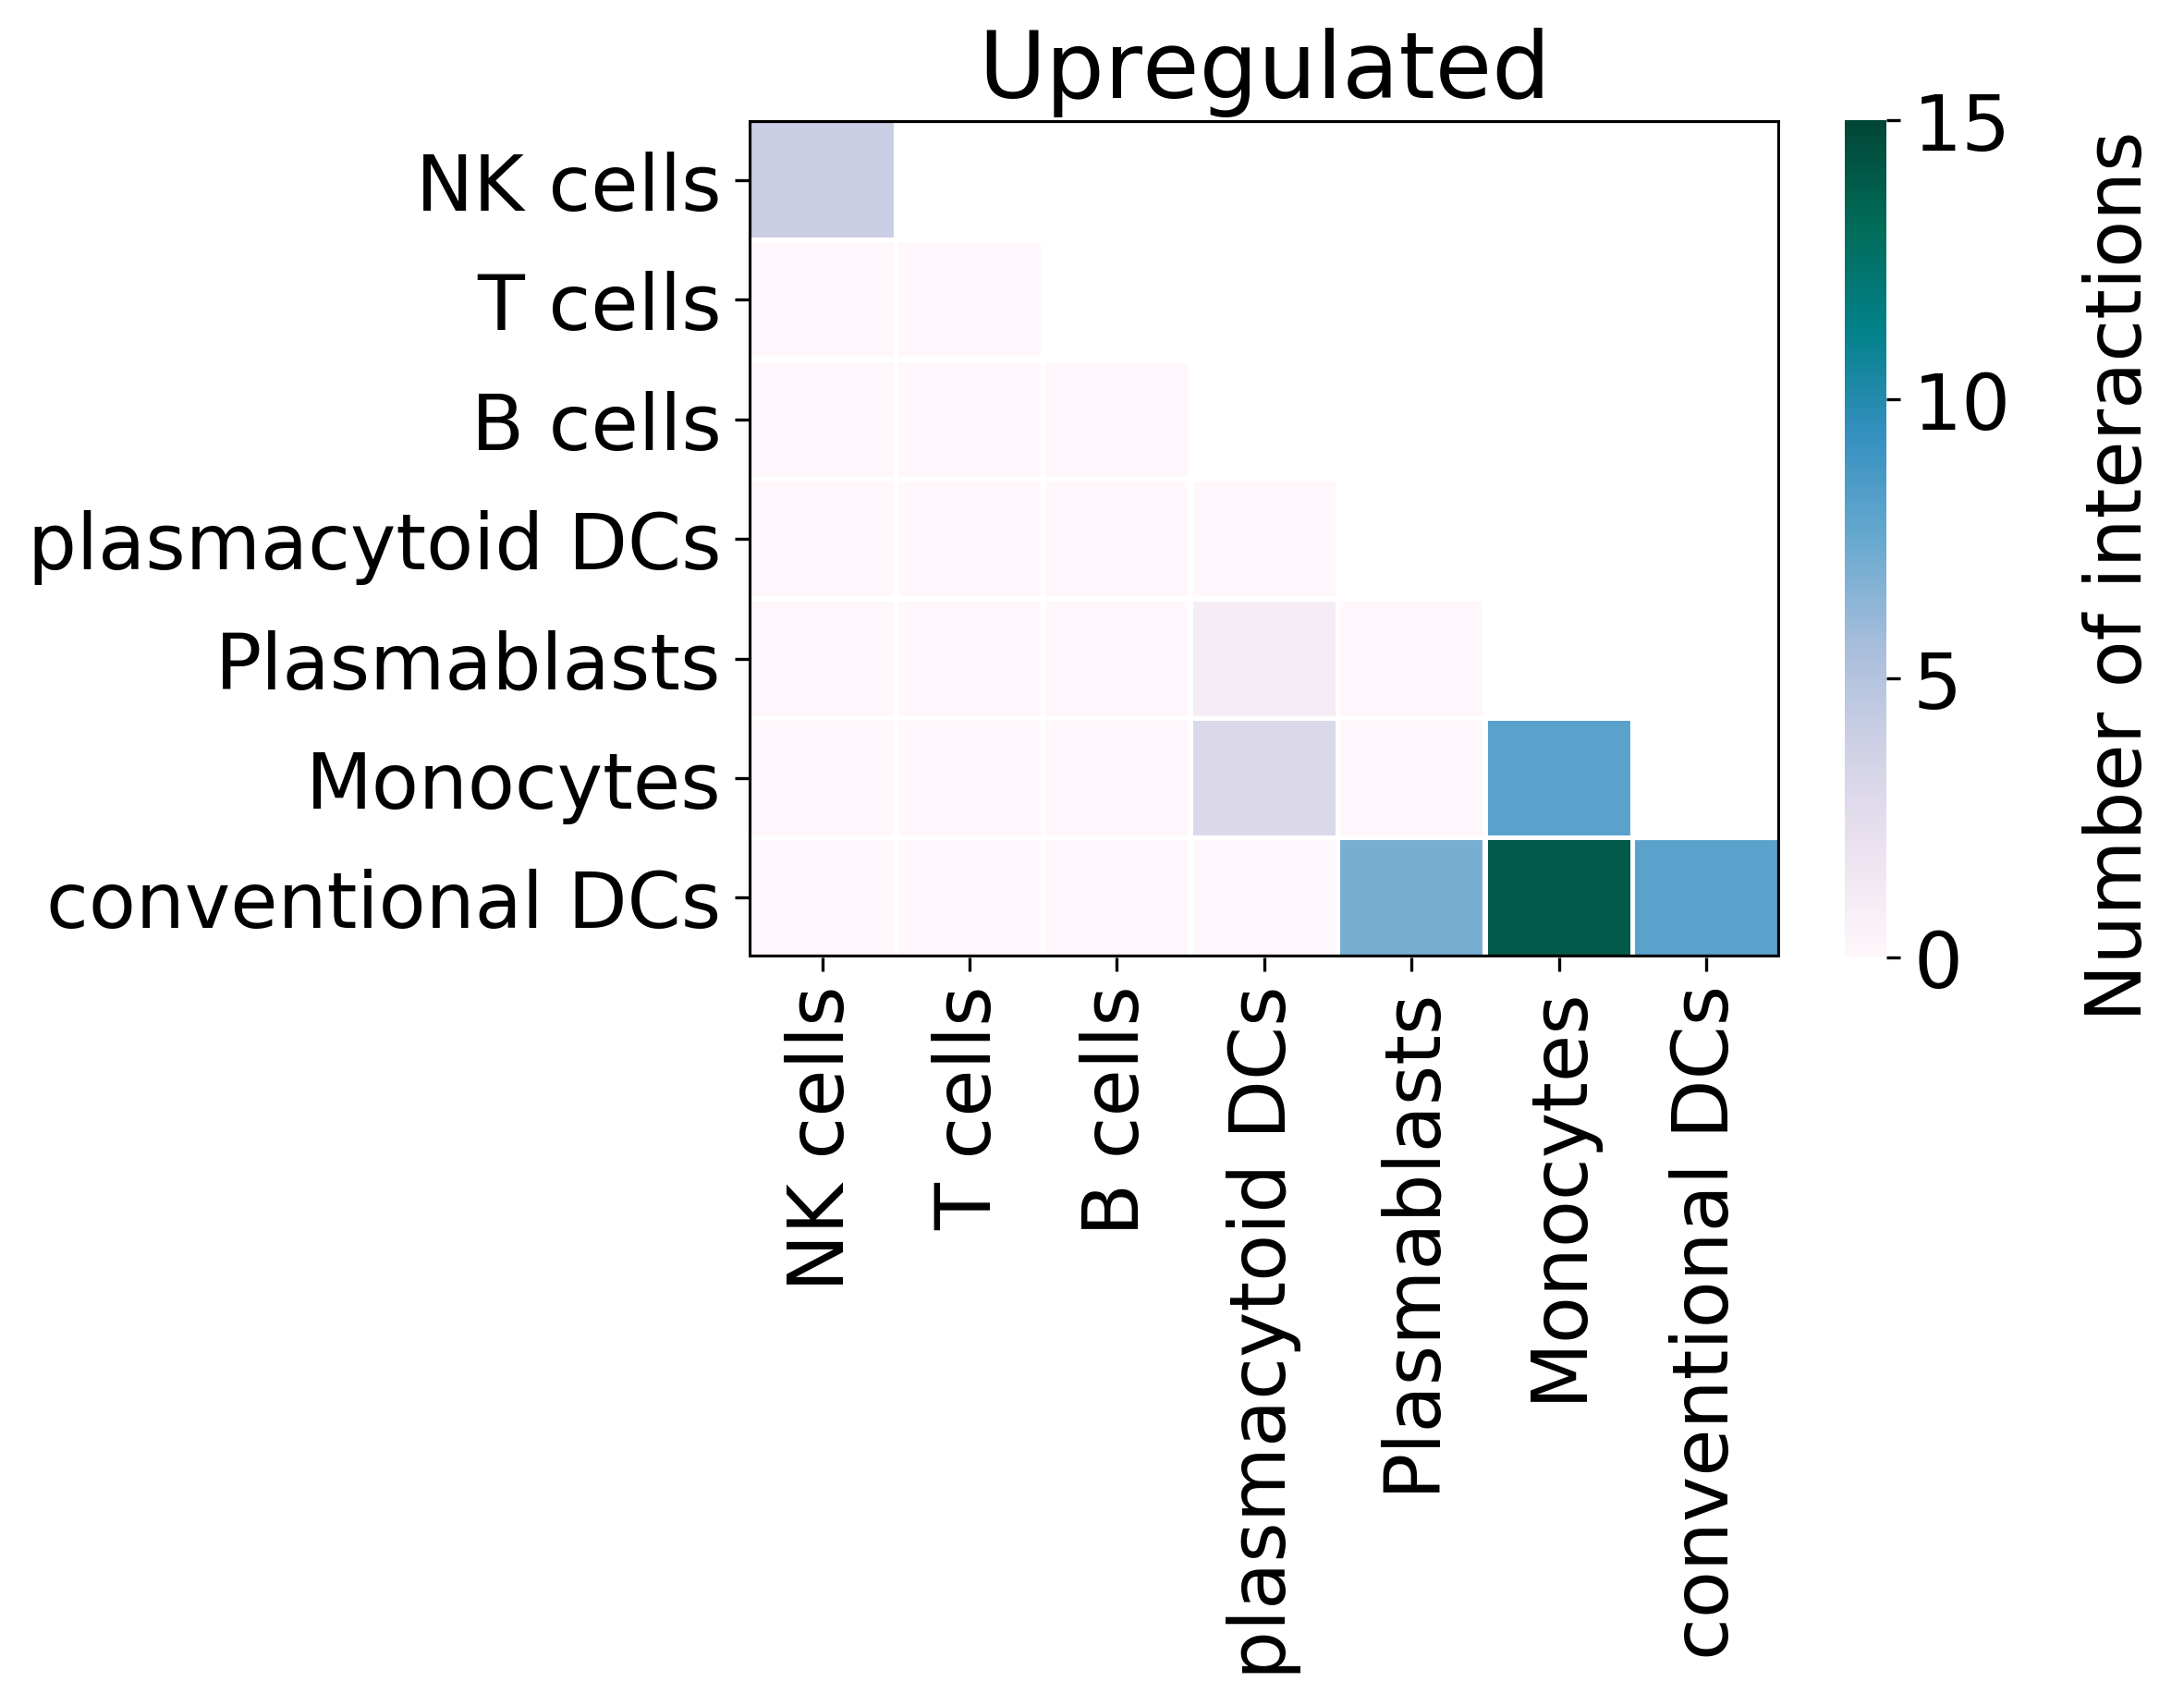

In [239]:
up = ct_res[ct_res['inter_type'] == 'up']
#from make_figure_functions import inter_number
print('get heatmap showing the number of upregulated interactions')
fig = inter_number(adata_kid, up, 15, 'Up', 'PuBuGn')['figure']
fig.savefig(save_figures + 'up_inters.png', bbox_inches='tight')
fig.savefig(save_figures + 'up_inters.pdf', bbox_inches='tight')

get heatmap showing the number of mixregulated interactions


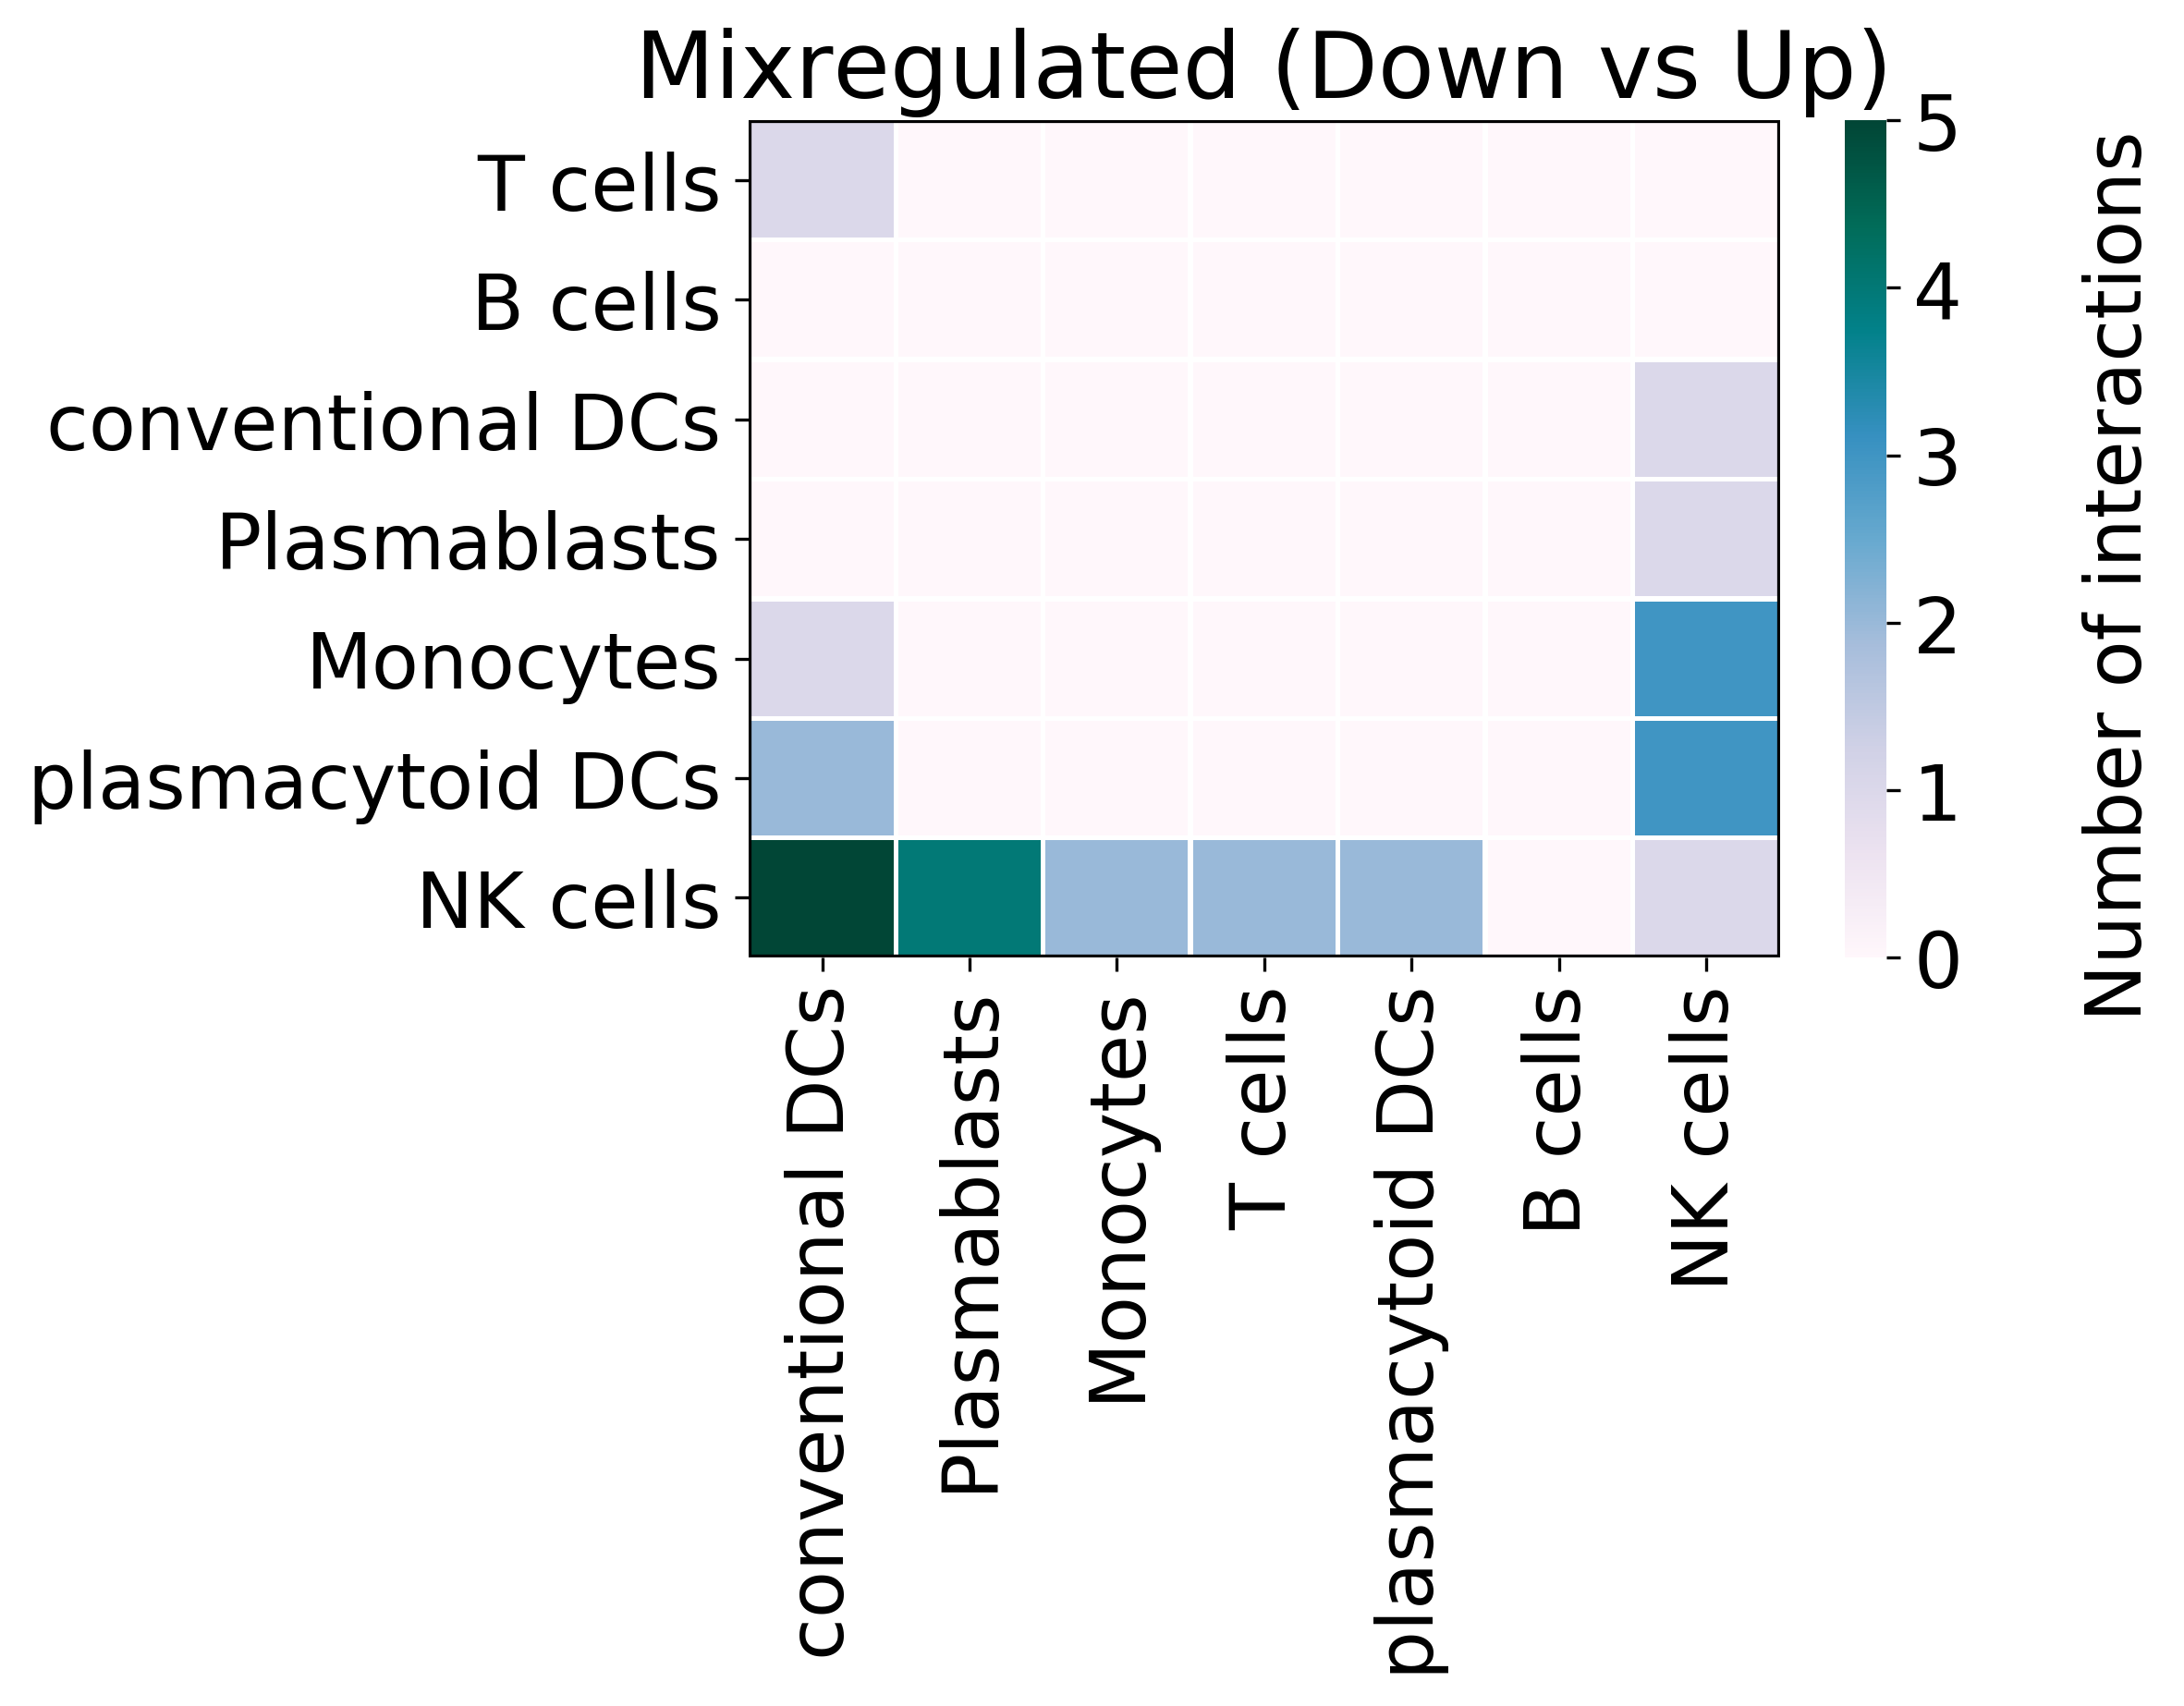

In [278]:
mix = ct_res[ct_res['inter_type'] == 'mix']
#from make_figure_functions import inter_mix_number
print('get heatmap showing the number of mixregulated interactions')
fig = inter_mix_number(adata_kid, mix, 5, 'PuBuGn')['figure']
fig.savefig(save_figures + 'mix_inters.png', bbox_inches='tight')
fig.savefig(save_figures + 'mix_inters.pdf', bbox_inches='tight')

# Specific interactions in cts or csts

In [258]:
cts_inters = ct_res.set_index(['ga', 'csta', 'gb', 'cstb']).index
csts_inters = cst_res.set_index(['ga', 'csta', 'gb', 'cstb']).index

ct_cst = {
    'Monocytes': ['classical monocytes',  'intermediate monocytes', 'non-classical monocytes'], 
    'Plasmablasts': ['non-proliferating plasmablasts', 'proliferating plasmablasts'],
    'B cells': ['naive B cells', 'memory B cells', 'activated B cells'],
    'T cells': ['CD4+ T cells', 'CD8+ effector T cells', 'CD8+ naive/memory T cells',],
    'NK cells': ['cytotoxic NK cells', 'signaling NK cells'],
    #'megakaryocytes': ['megakaryocytes'],
    'conventional DCs': ['conventional DCs'],
    'plasmacytoid DCs': ['plasmacytoid DCs'],
}

In [259]:
cst_in = []
cst_out = []

for inter in csts_inters:
    for key1 in ct_cst.keys():
        if inter[1] in ct_cst[key1]:
            ct1 = key1
    for key2 in ct_cst.keys():
        if inter[3] in ct_cst[key2]:
            ct2 = key2
    interi = (inter[0], ct1, inter[2], ct2)
    interj = ( inter[2], ct2, inter[0], ct1)
    
    if (interi in cts_inters) | (interj in cts_inters):
        cst_in.append(inter)
    else:
        cst_out.append(inter)

In [261]:
print('get interactions with same genes and coresponding cell subtypes as significant cts inters')

in_inter = cst_res.set_index(['ga', 'csta', 'gb', 'cstb']).loc[cst_in]
in_inter = in_inter[~in_inter.duplicated()]
in_inter.to_csv(save_tables + 'cst_inters_in_cts_strict.tsv', sep='\t')

out_inter = cst_res.set_index(['ga', 'csta', 'gb', 'cstb']).loc[cst_out]
out_inter = out_inter[~out_inter.duplicated()]
out_inter.to_csv(save_tables + 'cst_inters_out_cts_strict.tsv', sep='\t')

get interactions with same genes and coresponding cell subtypes as significant cts inters


# get barplot shwoing gene number in distinct cell types from sig_inters

only use interactions with med_pair >=1 or <= -1


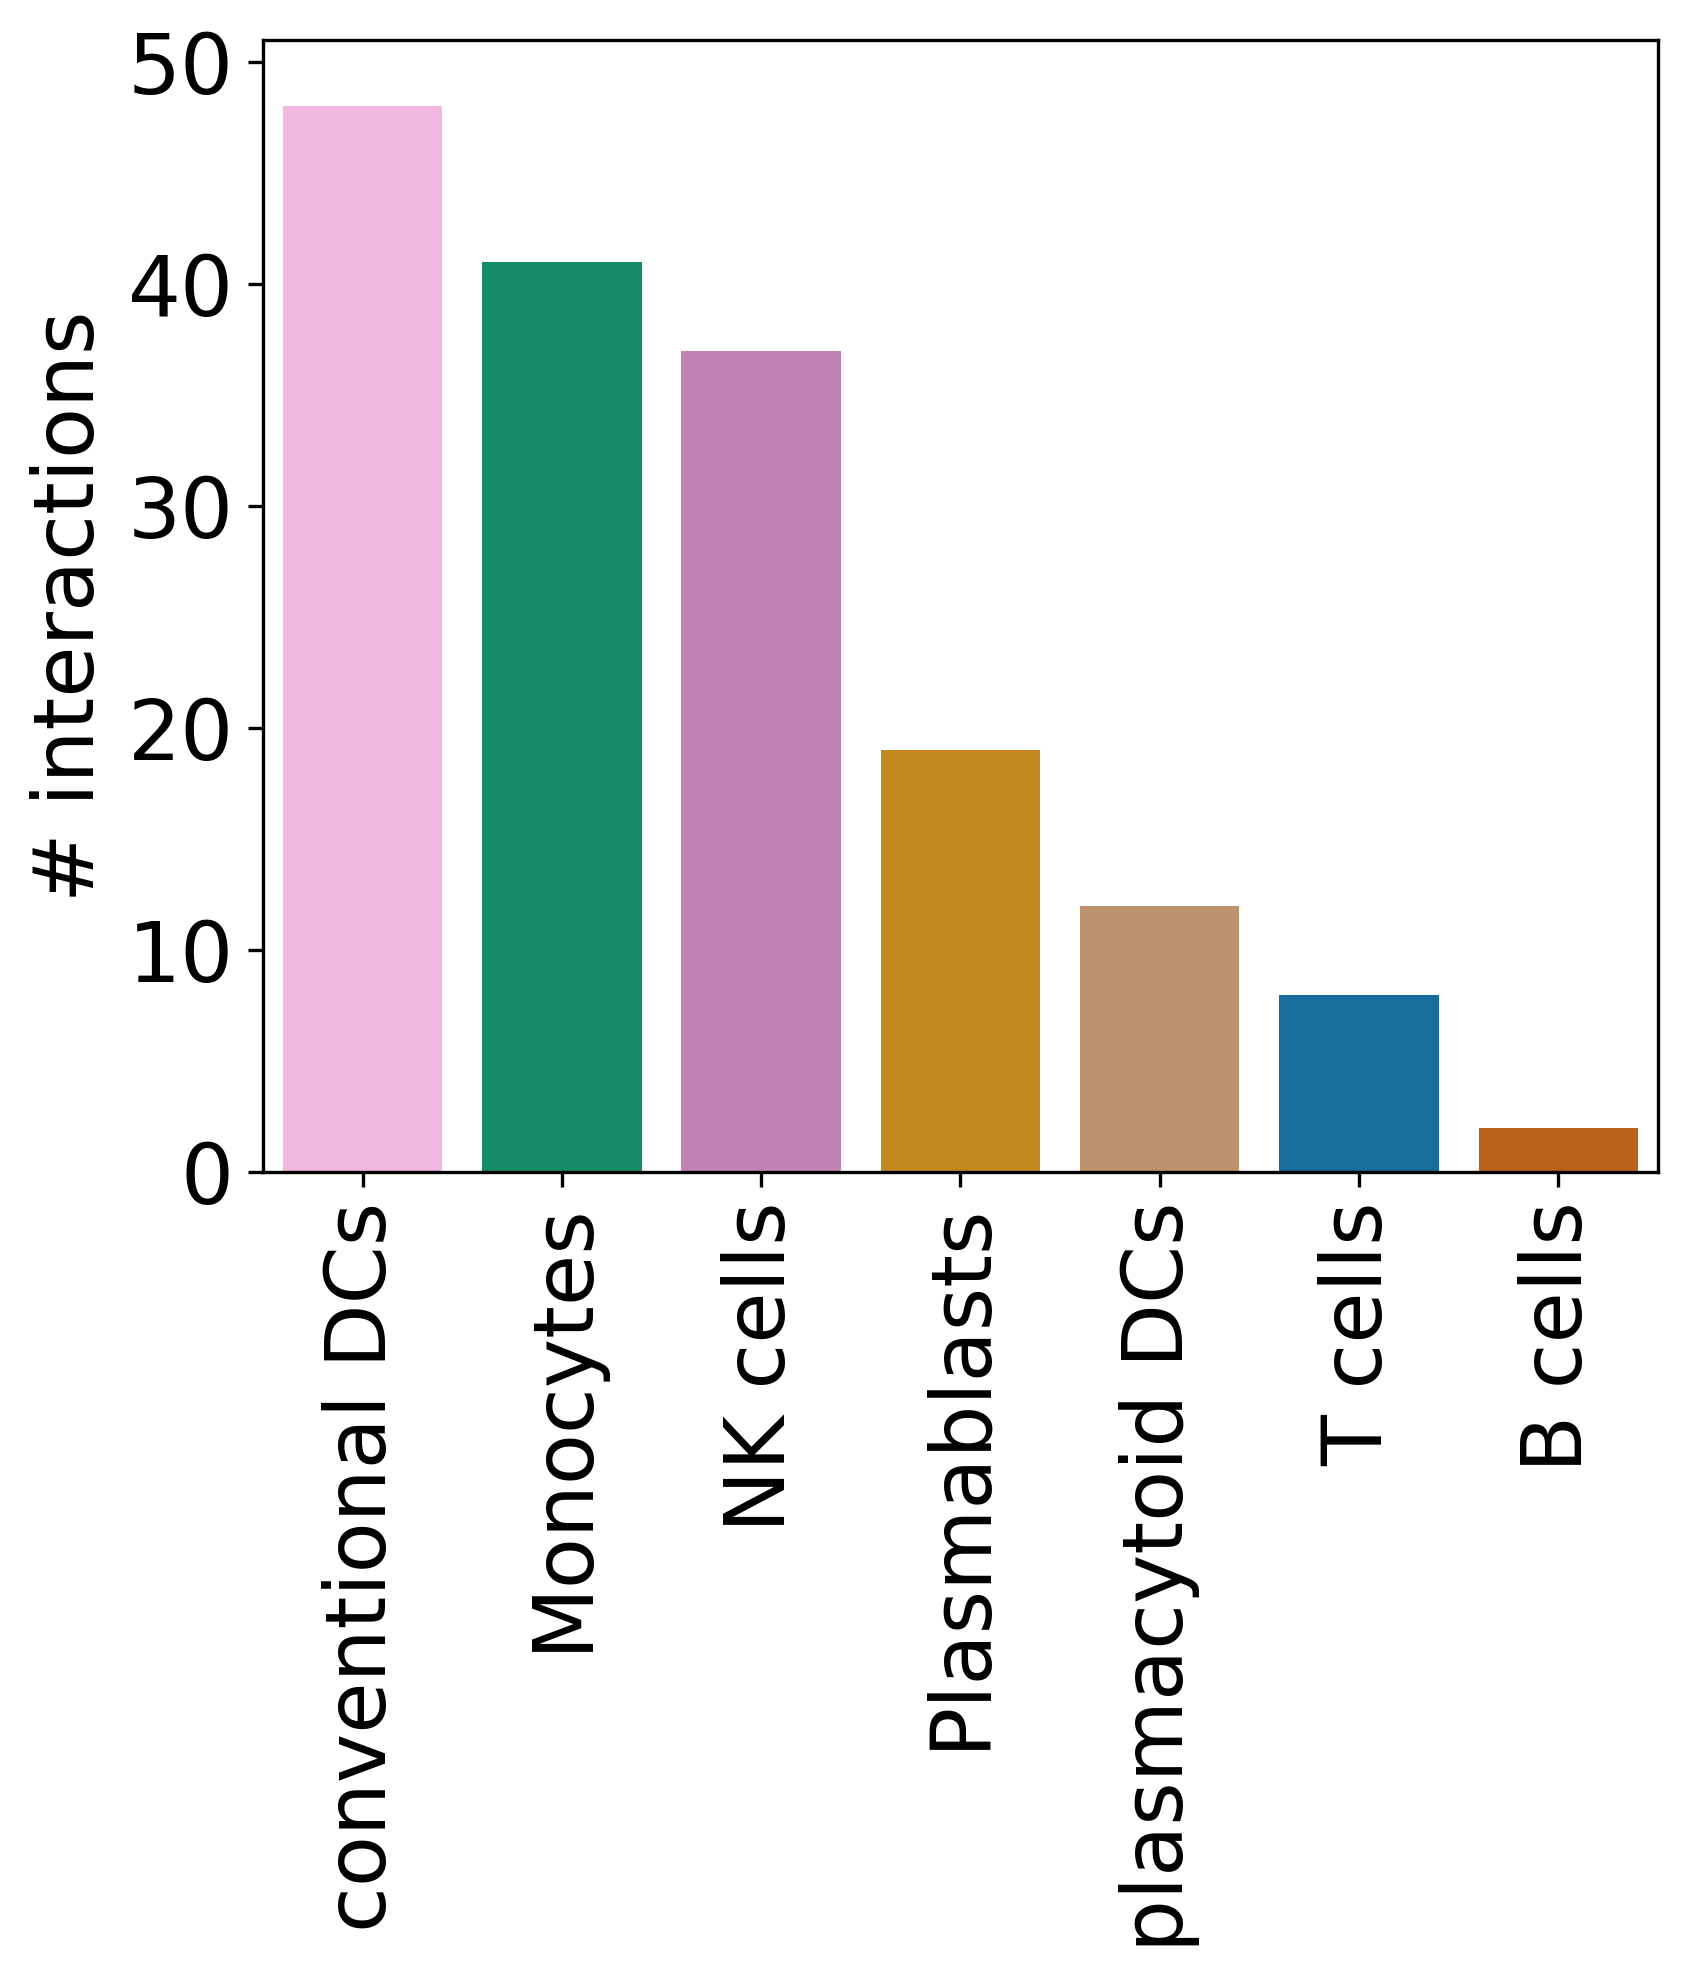

In [262]:
print('only use interactions with med_pair >=1 or <= -1')
cts = adata_kid.obs['cell_type_new'].unique().tolist()

if 'doublets' in cts:
    cts.remove('doublets')
if 'unknown' in cts:
    cts.remove('unknown')
if 'megakaryocytes' in cts:
    cts.remove('megakaryocytes')

ct_n = {ct: 0 for ct in cts}
for inter in cts_inters:
    for ct in cts:
        if inter[1] == ct:
            ct_n[ct] += 1
        elif inter[3] == ct:
            ct_n[ct] += 1

#######################################################
sig_it_n = pd.DataFrame(ct_n.values(), columns=['Number of interactions'])
sig_it_n['Cell type'] = ct_n.keys()
sig_it_n.sort_values('Number of interactions', ascending=False, inplace=True)

#######################################################
palette = [ct_palette[ct] for ct in sig_it_n['Cell type']]
rcParams['pdf.fonttype'] = 42
rcParams['figure.dpi'] = 300
rcParams['font.sans-serif'] = "Arial"
fig, ax = plt.subplots(figsize=[6, 5])
ax = sns.barplot(data=sig_it_n, x='Cell type', y='Number of interactions', palette=palette)
ax.set_ylim(0, (sig_it_n['Number of interactions'].iloc[0] // 10 + 1) * 10 + 1)
ax.set_xlabel(None)
ax.set_ylabel('# interactions')
plt.xticks(rotation=90)
fig.savefig(save_figures + 'n_inters_cts.png', bbox_inches='tight')
fig.savefig(save_figures + 'n_inters_cts.pdf', bbox_inches='tight')

<ipython-input-19-833d635347d7>:392: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ax.set_yticks(range(0, ylim, [10, 20][ylim >= 40]))
<ipython-input-19-833d635347d7>:393: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ax.set_yticklabels(range(0, ylim, [10, 20][ylim >= 40]))
<ipython-input-19-833d635347d7>:392: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ax.set_yticks(range(0, ylim, [10, 20][ylim >= 40]))
<ipython-input-19-833d635347d7>:393: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ax.set_yticklabels(range(0, ylim, [10, 20][ylim >= 40]))
<ipython-input-19-833d635347d7>:392: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ax.set_yticks(range(0, ylim, [10, 20][ylim >= 40]))
<ipython-input-

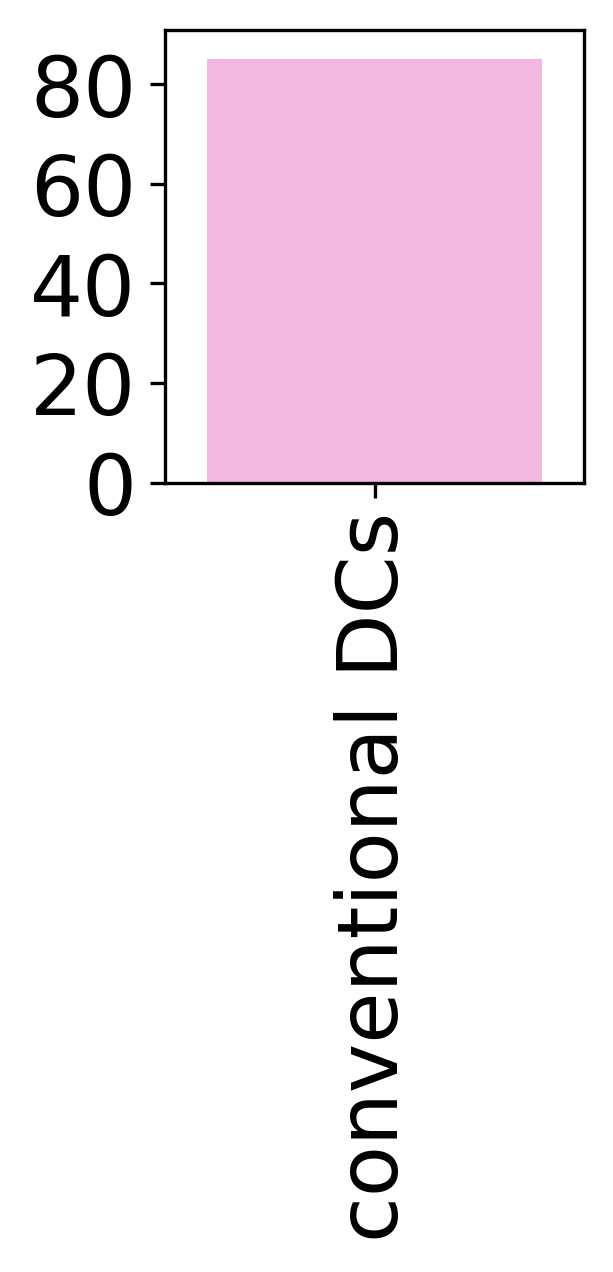

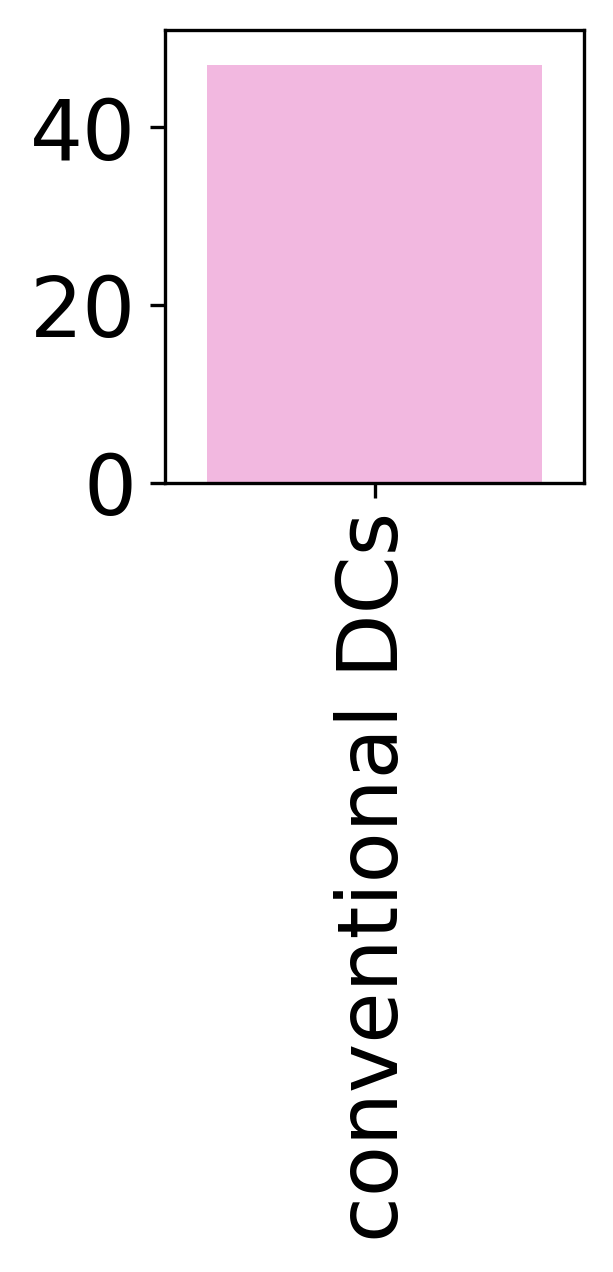

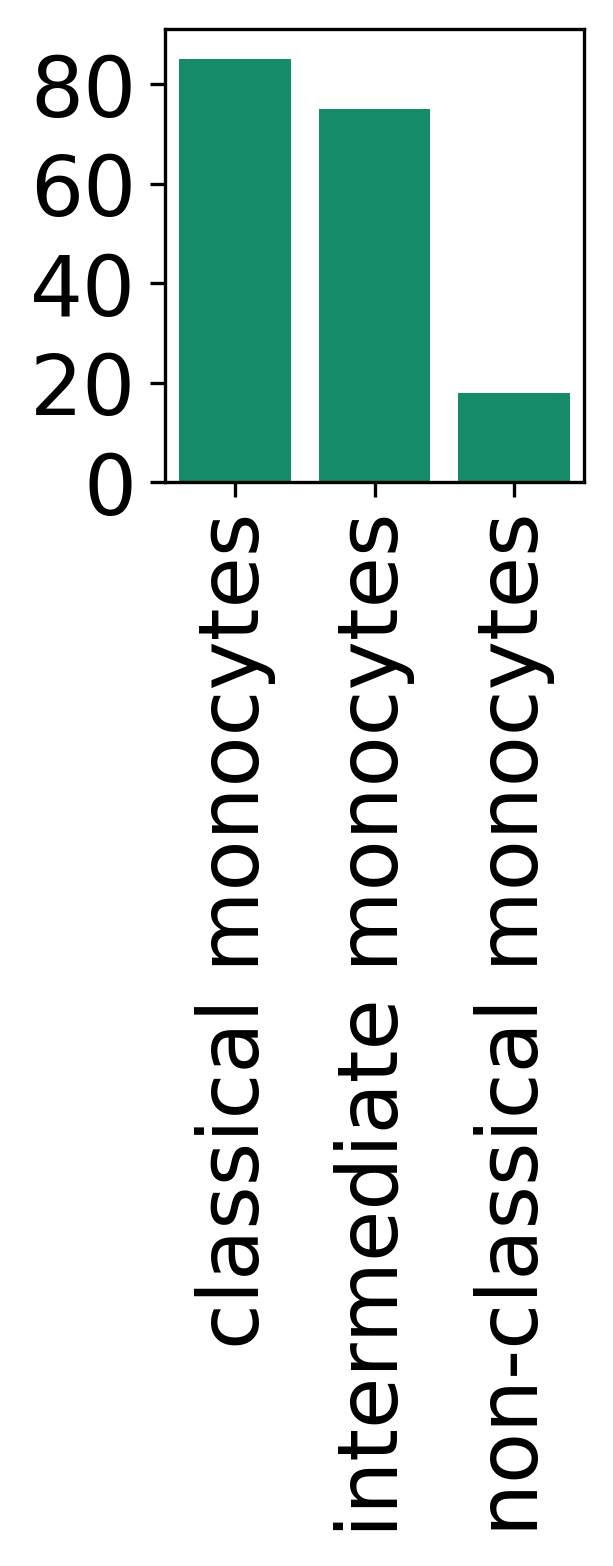

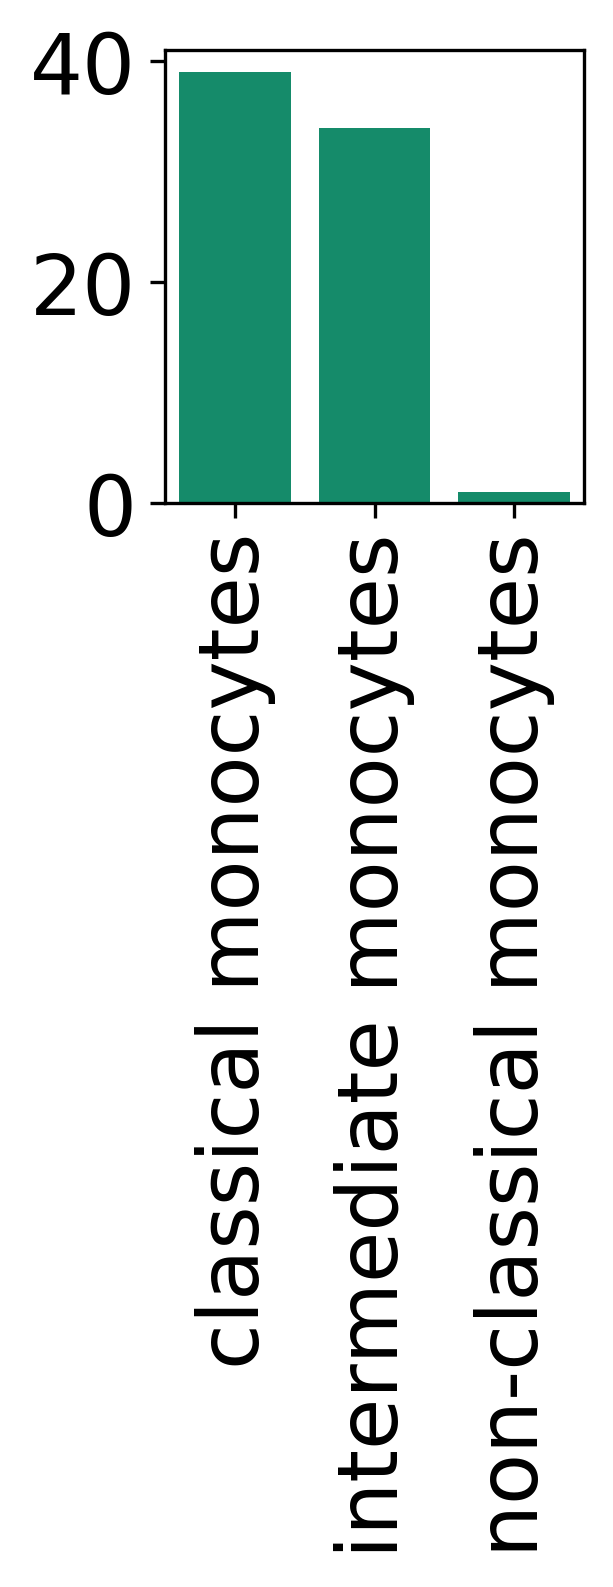

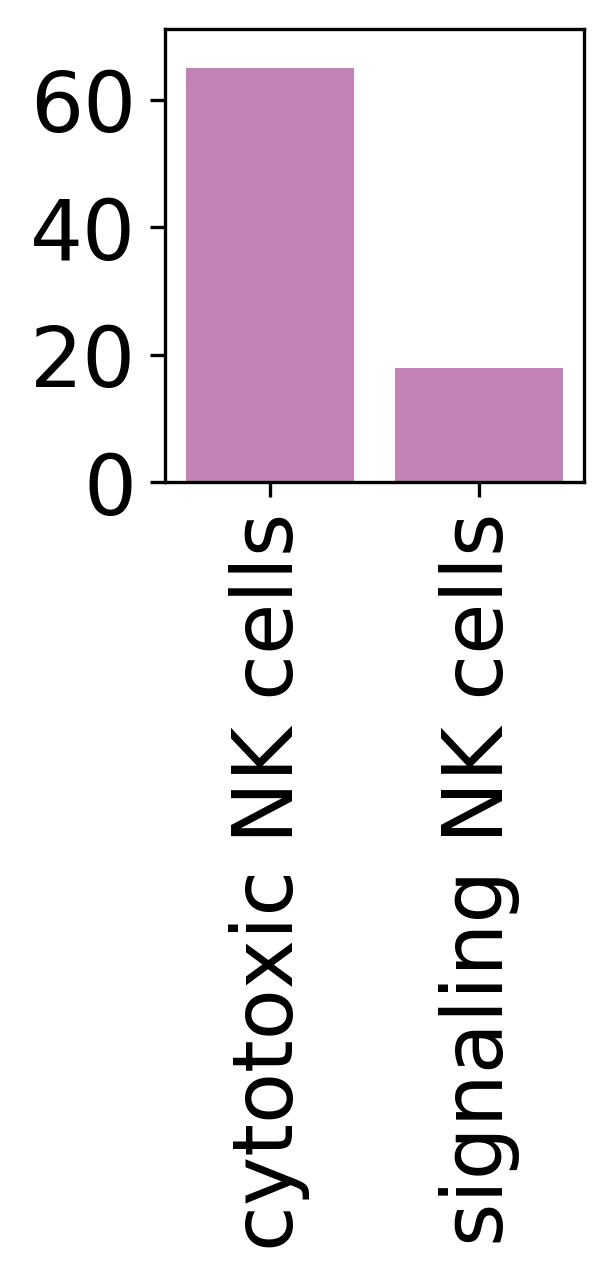

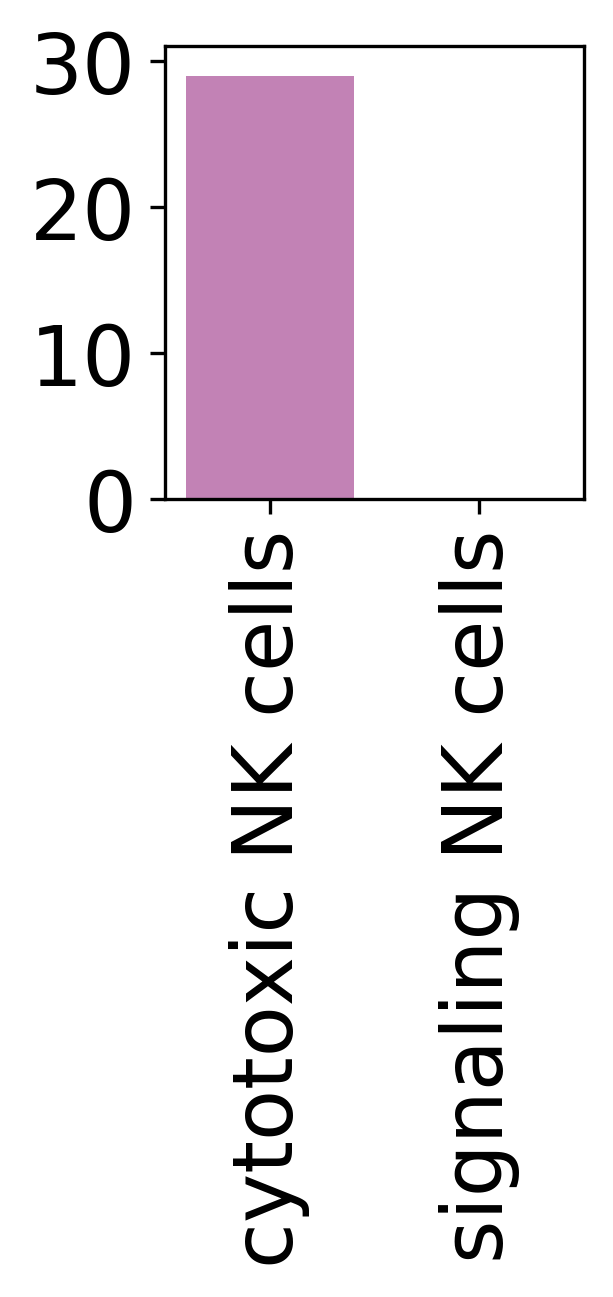

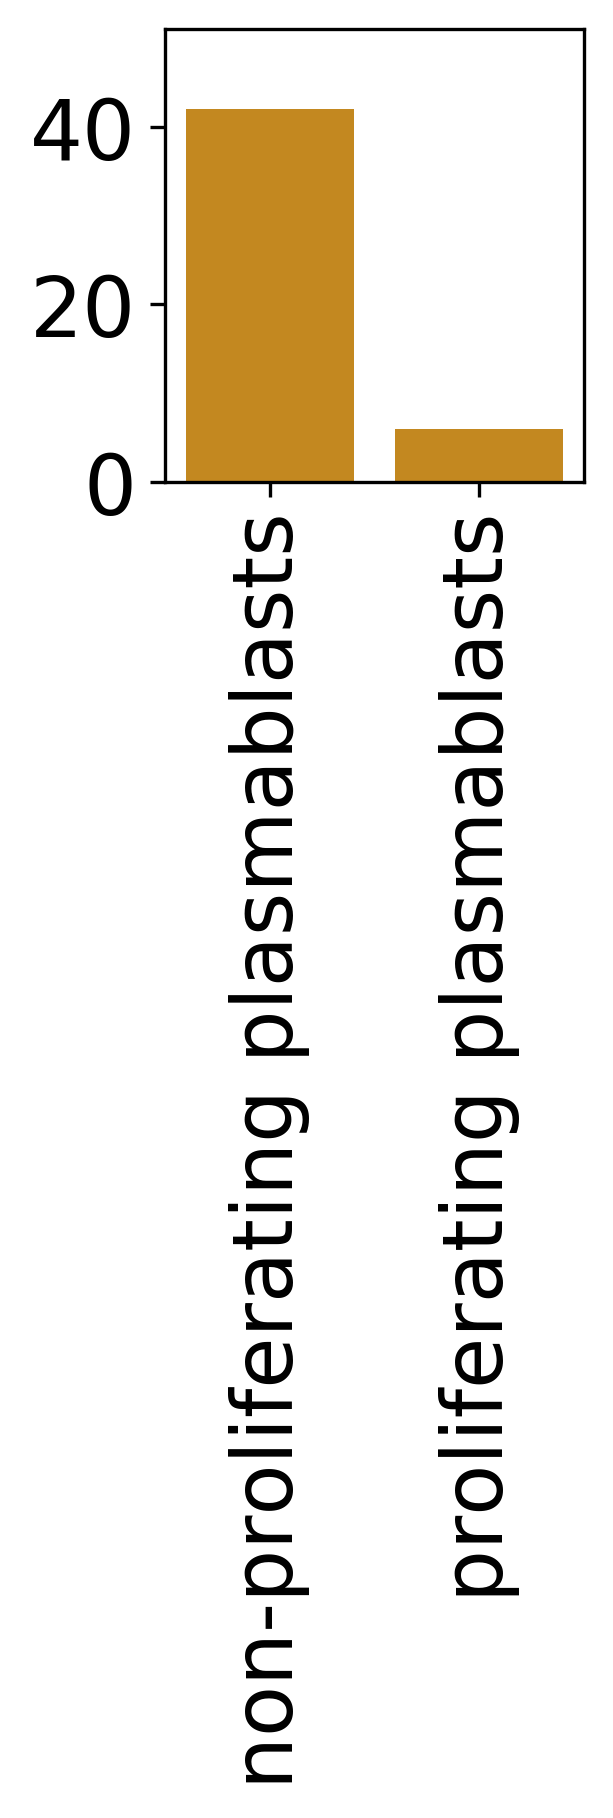

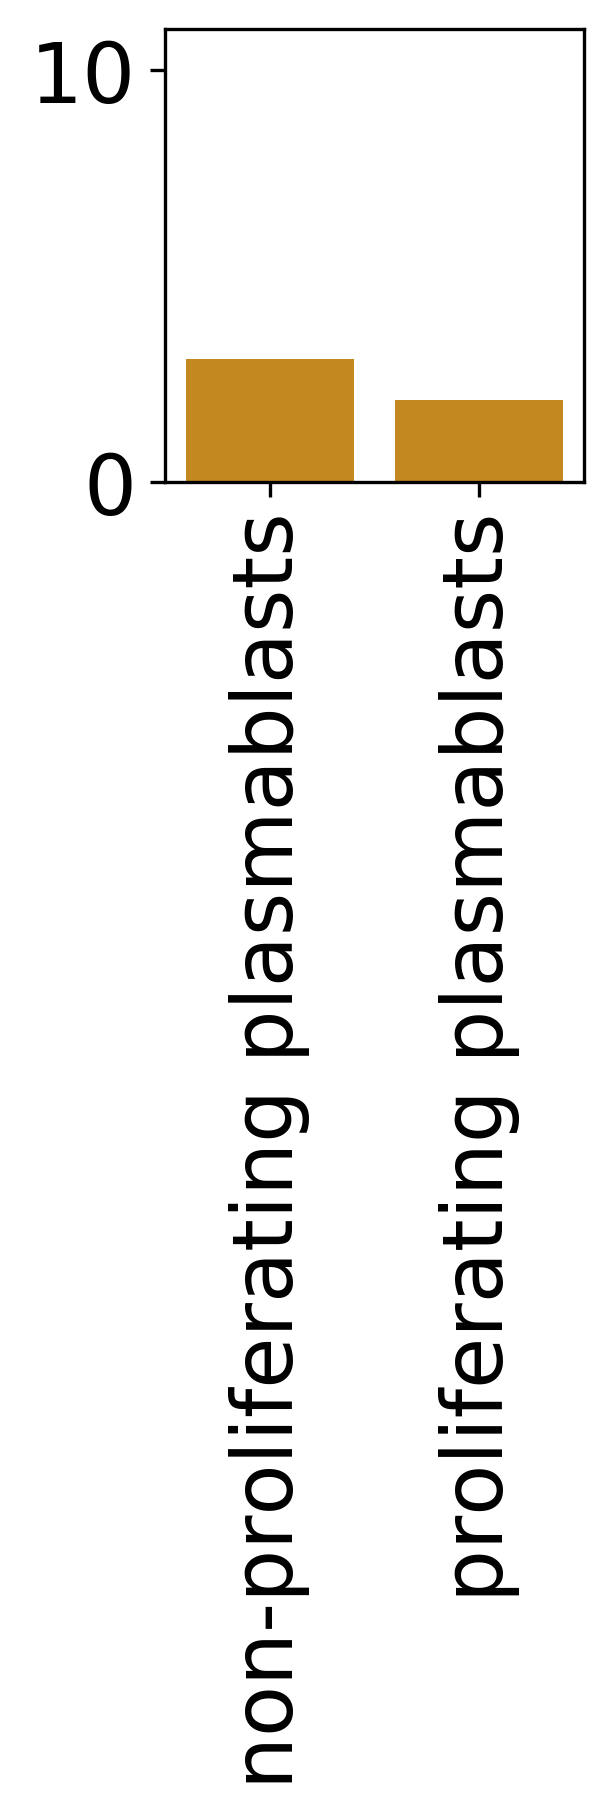

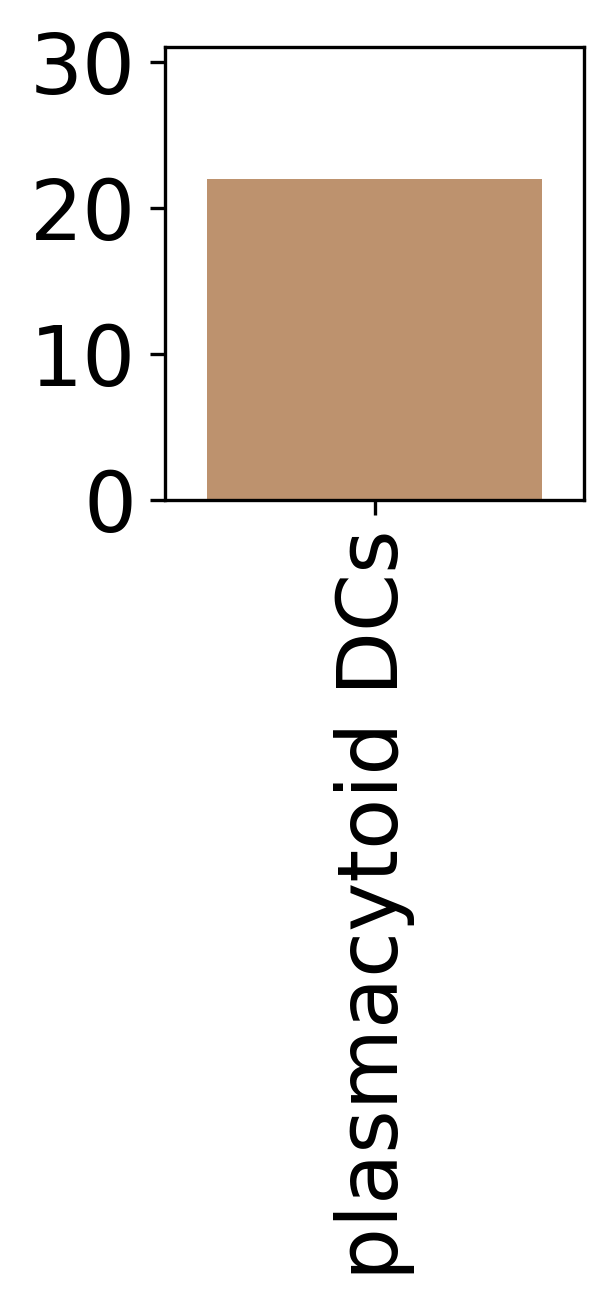

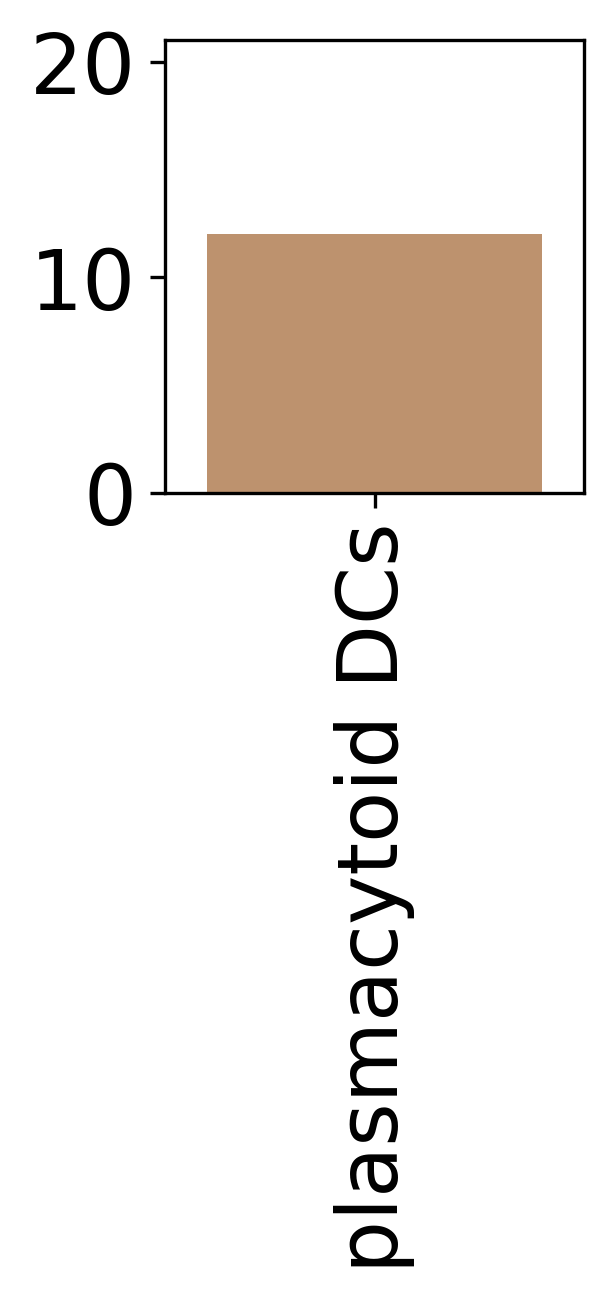

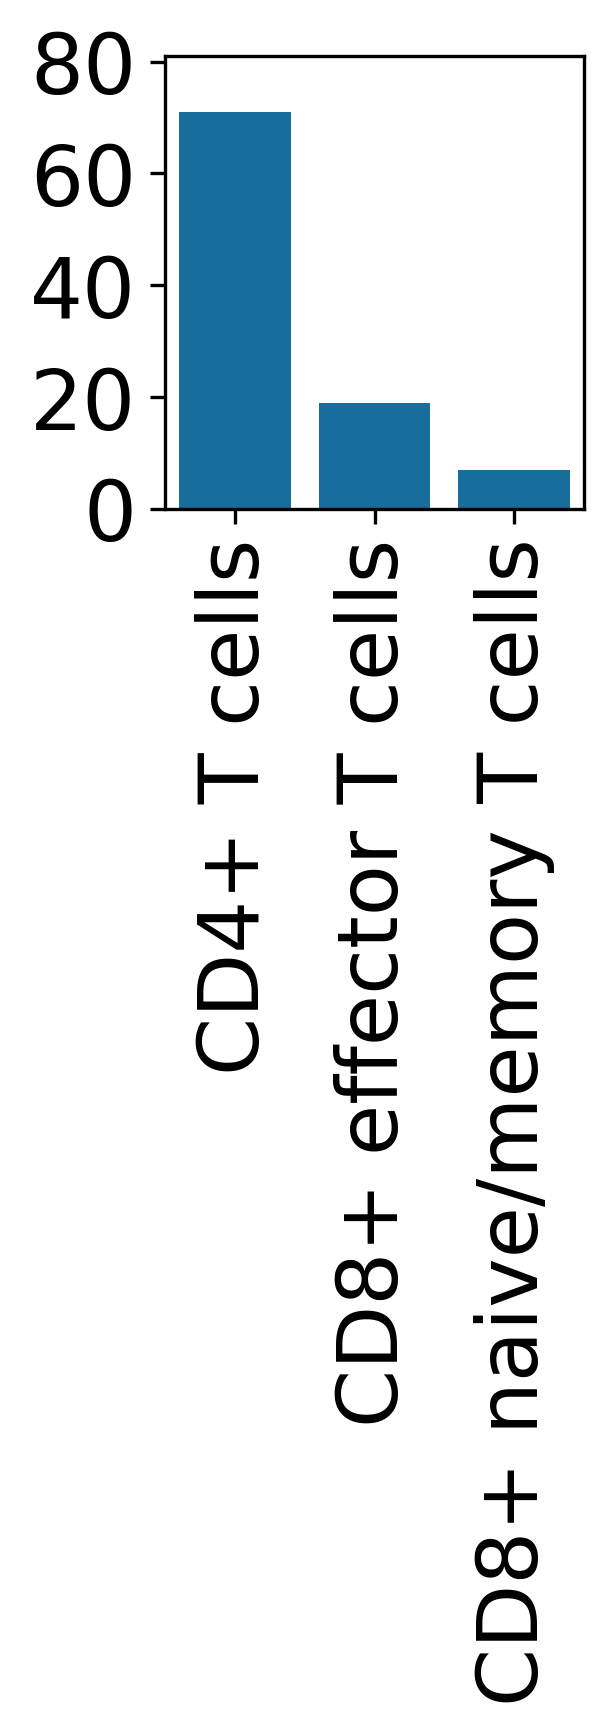

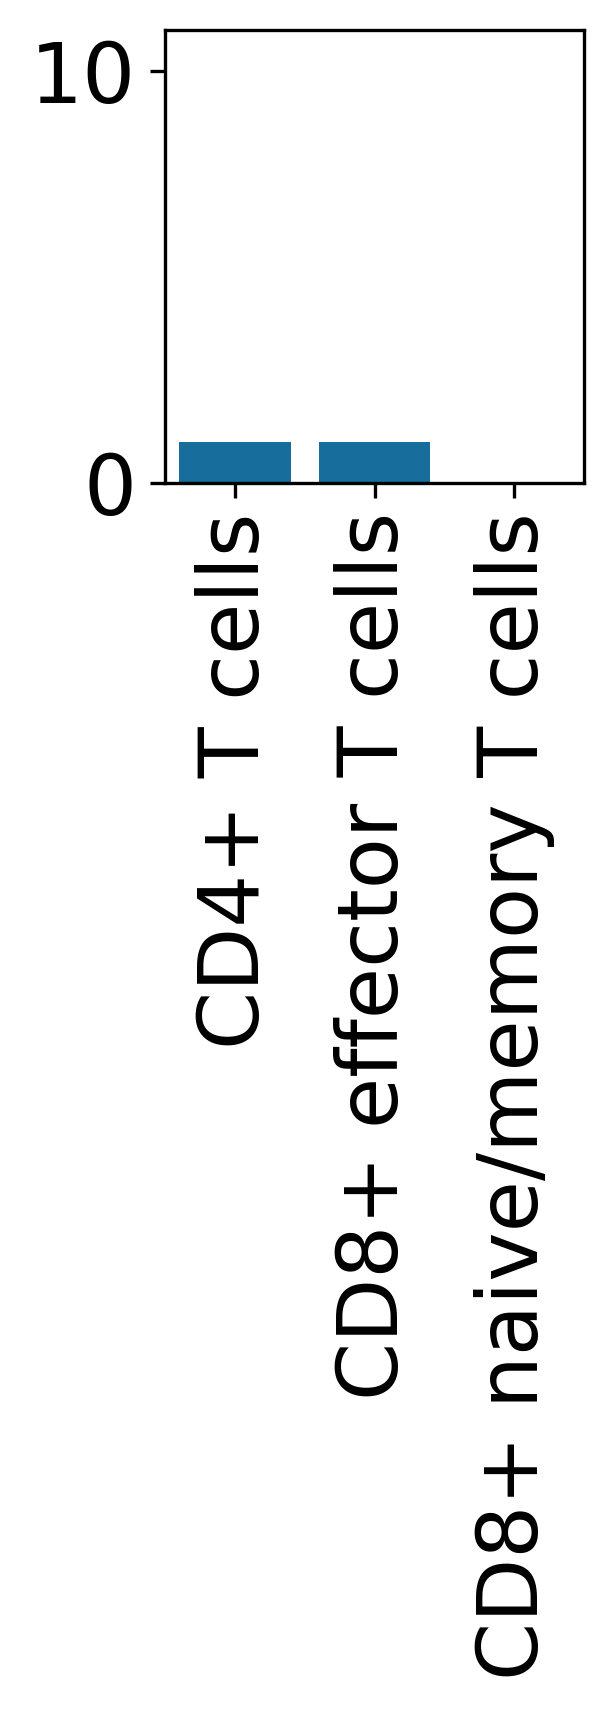

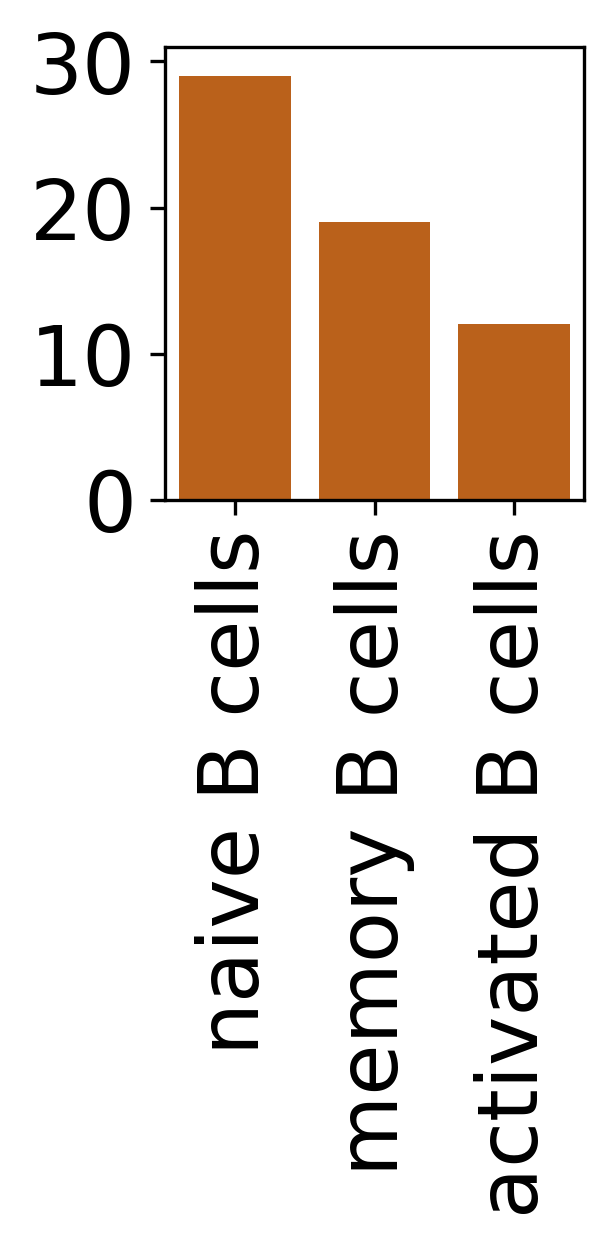

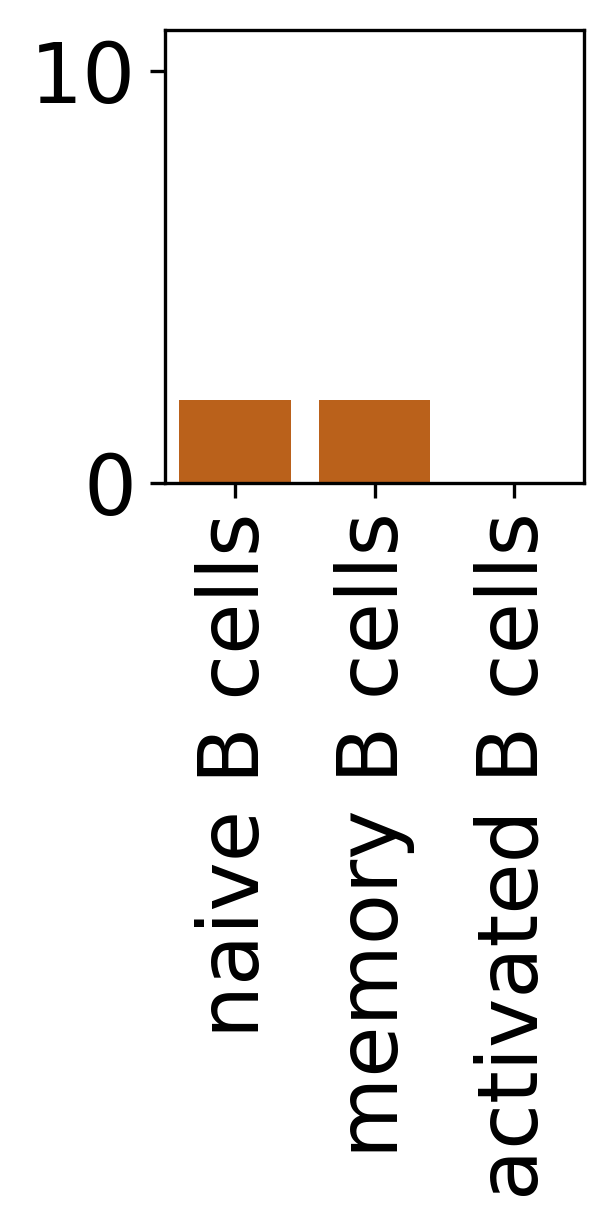

In [268]:
in_inter = pd.read_csv(save_tables + 'cst_inters_in_cts_strict.tsv', sep='\t', index_col=['ga', 'csta', 'gb', 'cstb'])
cst_inters = cst_res.set_index(['ga', 'csta', 'gb', 'cstb'])

for i, ct in enumerate(sig_it_n['Cell type']):
    fig1 = cst_number(cst_inters, ct_cst[ct], ct_palette[ct])['figure']
    fig1.savefig(save_figures + ct + '_subtype_inters.png', bbox_inches='tight')
    fig1.savefig(save_figures + ct + '_subtype_inters.pdf', bbox_inches='tight')
    
    fig2 = cst_number(in_inter, ct_cst[ct], ct_palette[ct])['figure']
    fig2.savefig(save_figures + ct + '_in_cst_inters.png', bbox_inches='tight')
    fig2.savefig(save_figures + ct + '_in_cst_inters.pdf', bbox_inches='tight')

# get list with significant inters after randomization test for mushroom plot

In [17]:
ct_res = pd.read_csv(save_tables + 'sig_ct_inters.tsv', sep='\t')
up = ct_res[ct_res['inter_type'] == 'up']
mix = ct_res[ct_res['inter_type'] == 'mix']

In [273]:
ct_res[-28:][ct_res[-28:]['inter_type'] == 'up']

,ga,csta,gb,cstb,ga_med_pair,ga_fra_pair,ga_neg_fra_pair,ga_SD_fra,ga_D_fra,gb_med_pair,gb_fra_pair,gb_neg_fra_pair,gb_SD_fra,gb_D_fra,inter_type
66,CD14,Monocytes,ITGB1,NK cells,1.836027,0.785714,0.214286,0.846431,0.597387,1.293202,1.000000,0.000000,0.438633,0.263760,up
67,CD14,Monocytes,ITGB1,conventional DCs,1.836027,0.785714,0.214286,0.846431,0.597387,1.440017,0.861111,0.138889,0.481818,0.241830,up
68,ADAM15,conventional DCs,ITGB1,NK cells,1.717683,0.916667,0.083333,0.445455,0.235294,1.293202,1.000000,0.000000,0.438633,0.263760,up
69,ADAM15,conventional DCs,ITGB1,conventional DCs,1.717683,0.916667,0.083333,0.445455,0.235294,1.440017,0.861111,0.138889,0.481818,0.241830,up
70,CD44,conventional DCs,CD2,NK cells,1.008048,0.722222,0.277778,0.586364,0.392157,1.049671,0.803571,0.196429,0.454254,0.267607,up
71,TIMP1,conventional DCs,CD44,conventional DCs,1.870246,0.888889,0.111111,0.927273,0.718954,1.008048,0.722222,0.277778,0.586364,0.392157,up
72,CD14,Monocytes,ITGB2,T cells,1.836027,0.785714,0.214286,0.846431,0.597387,1.131032,0.732143,0.267857,0.613723,0.470622,up
73,CD14,Monocytes,ITGB2,Monocytes,1.836027,0.785714,0.214286,0.846431,0.597387,1.097385,0.785714,0.214286,0.905552,0.725653,up
74,CD14,Monocytes,ITGB2,plasmacytoid DCs,1.836027,0.785714,0.214286,0.846431,0.597387,1.423160,0.696429,0.303571,0.506667,0.305677,up
75,CD14,Monocytes,ITGB2,conventional DCs,1.836027,0.785714,0.214286,0.846431,0.597387,1.888788,0.888889,0.111111,0.959091,0.843137,up


In [274]:
ct_res[-28:][ct_res[-28:]['inter_type'] == 'mix']

,ga,csta,gb,cstb,ga_med_pair,ga_fra_pair,ga_neg_fra_pair,ga_SD_fra,ga_D_fra,gb_med_pair,gb_fra_pair,gb_neg_fra_pair,gb_SD_fra,gb_D_fra,inter_type
82,ITGB1,NK cells,JAML,plasmacytoid DCs,1.293202,1.000000,0.000000,0.438633,0.263760,-1.337656,0.250000,0.750000,0.435556,0.528384,mix
83,ITGB1,conventional DCs,JAML,plasmacytoid DCs,1.440017,0.861111,0.138889,0.481818,0.241830,-1.337656,0.250000,0.750000,0.435556,0.528384,mix
84,ITGA4,conventional DCs,JAML,plasmacytoid DCs,1.021698,0.777778,0.222222,0.672727,0.424837,-1.337656,0.250000,0.750000,0.435556,0.528384,mix
86,CLEC2B,conventional DCs,KLRB1,NK cells,1.057690,0.777778,0.222222,0.527273,0.346405,-2.496702,0.035714,0.964286,0.402092,0.630223,mix
88,LAG3,NK cells,HLA-DQA1,Monocytes,1.076243,0.821429,0.285714,0.196513,0.040611,-1.662779,0.303571,0.696429,0.237203,0.295131,mix
89,LAG3,NK cells,HLA-DQA1,plasmacytoid DCs,1.076243,0.821429,0.232143,0.196513,0.040611,-1.728884,0.196429,0.803571,0.644444,0.733624,mix
90,LAG3,NK cells,HLA-DQA1,conventional DCs,1.076243,0.821429,0.388889,0.196513,0.040611,-1.765821,0.194444,0.805556,0.950000,0.986928,mix
91,LAG3,NK cells,HLA-DQB1,Monocytes,1.076243,0.821429,0.285714,0.196513,0.040611,-1.788256,0.303571,0.696429,0.357606,0.422803,mix


# mushroom plots

<ipython-input-14-833d635347d7>:418: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  frac_ct = pd.read_csv('/home/yike/phd/dengue/data/tables/dataset_20211001/' + 'ct_fra_gene_cut_0.tsv',
<ipython-input-14-833d635347d7>:420: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  avg_ct = pd.read_csv('/home/yike/phd/dengue/data/tables/dataset_20211001/' + 'ct_avg_gene_cut_0.tsv',
<ipython-input-14-833d635347d7>:423: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  frac_cst = pd.read_csv('/home/yike/phd/dengue/data/tables/dataset_20211001/' + 'cst_fra_gene_cut_0.tsv',
<ipython-input-14-833d635347d7>:425: FutureWarning: The squeeze argument has been deprecated and will be removed in a futur

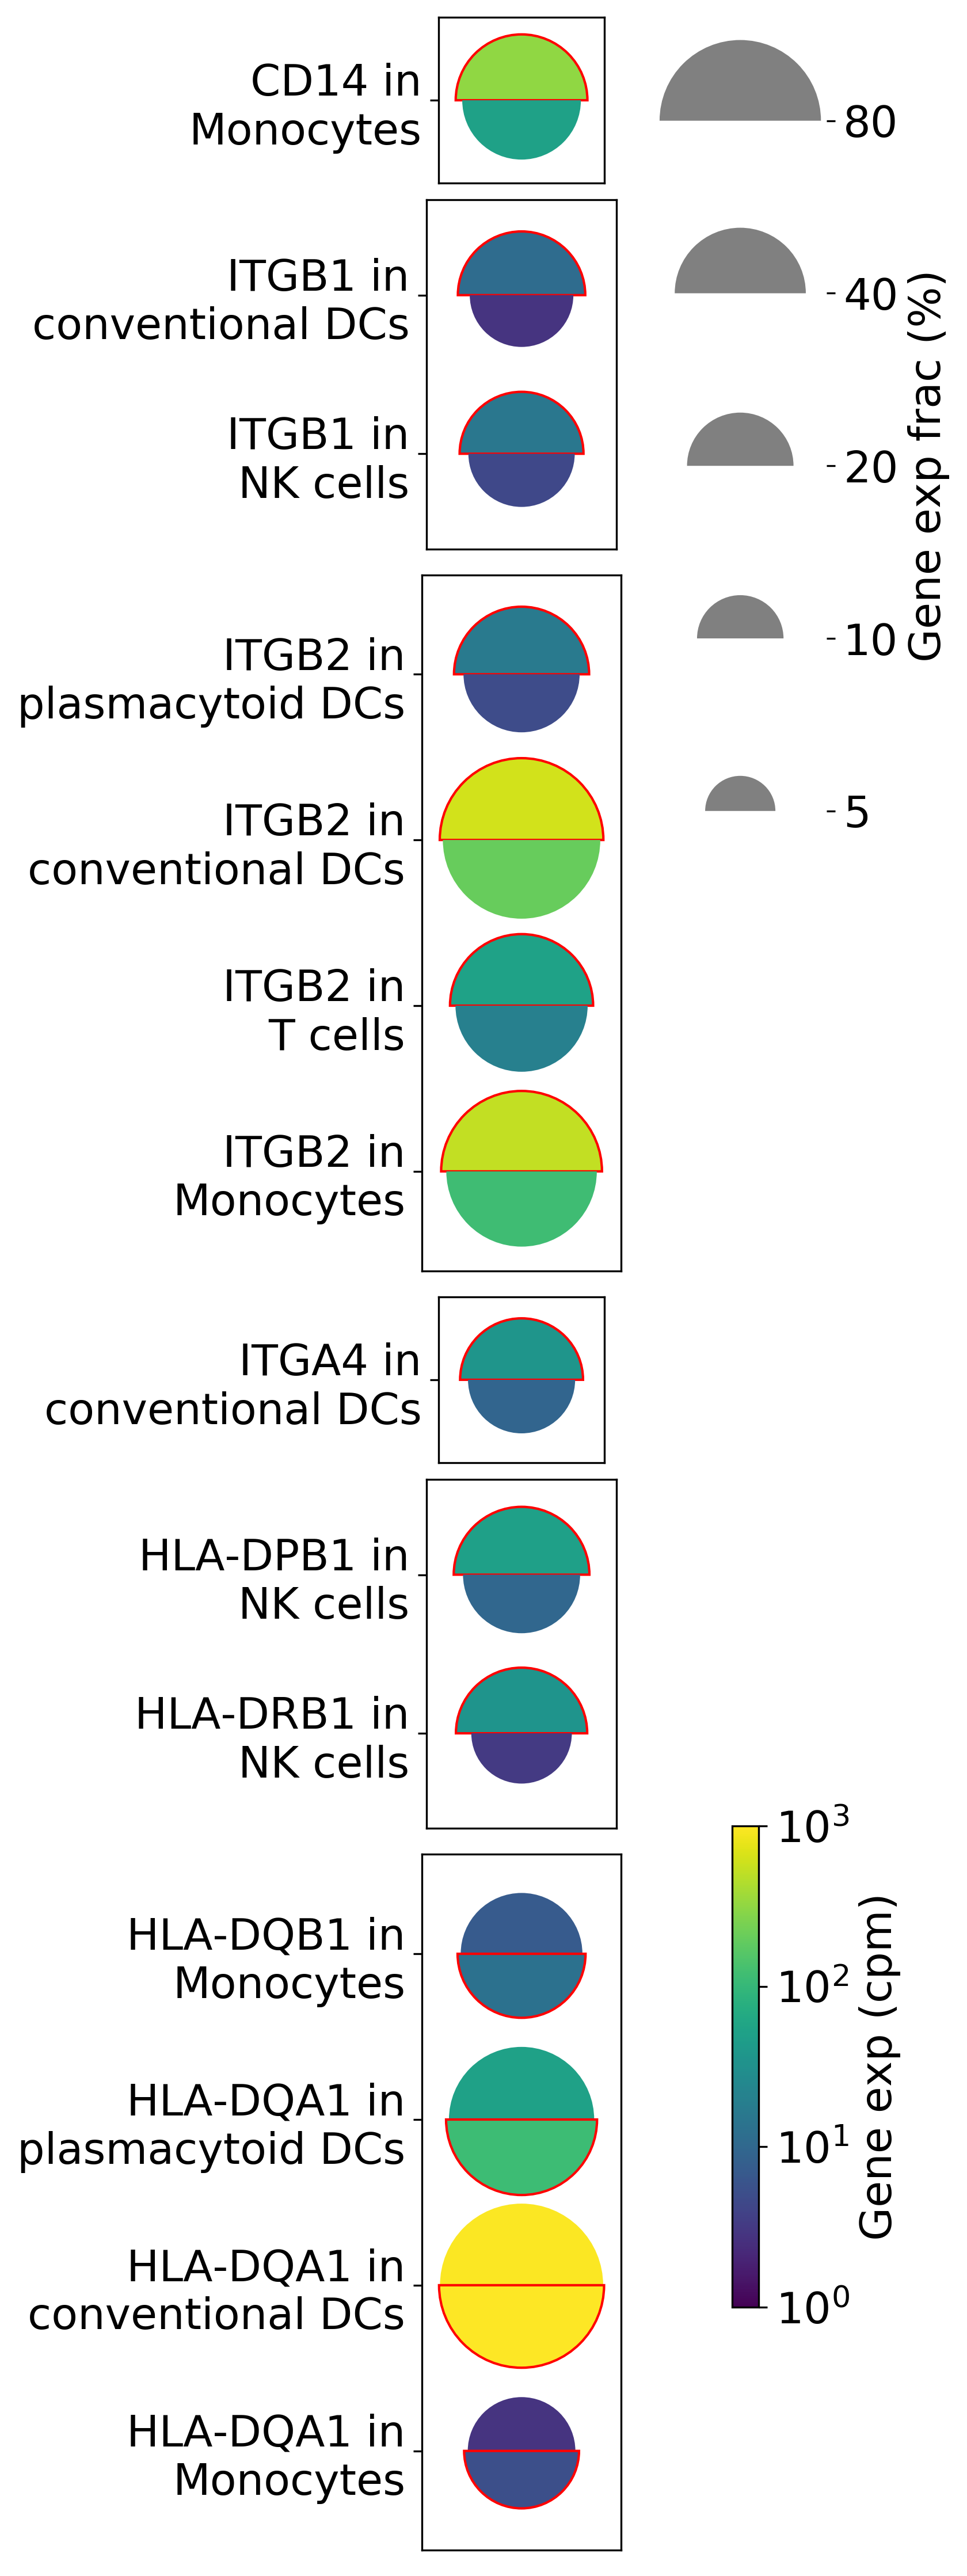

In [34]:
genes3 = [{'CD14': ['Monocytes']},
          {'ITGB1': ['NK cells', 'conventional DCs', ]},
          {'ITGB2': ['Monocytes', 'T cells', 'conventional DCs', 'plasmacytoid DCs', ]},
          {'ITGA4': ['conventional DCs']},
          {'HLA-DRB1': ['NK cells'], 'HLA-DPB1': 'NK cells', 'HLA-DPB1': ['NK cells']},
          {'HLA-DQA1': ['Monocytes', 'conventional DCs', 'plasmacytoid DCs'], 'HLA-DQB1': ['Monocytes']}
         ]
fig = s_mushrooms(genes3, 'cell_type_new')['figure']
fig.savefig(save_figures + 'inters_plus.png', bbox_inches='tight')
fig.savefig(save_figures + 'inters_plus.svg', bbox_inches='tight')

<ipython-input-14-833d635347d7>:418: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  frac_ct = pd.read_csv('/home/yike/phd/dengue/data/tables/dataset_20211001/' + 'ct_fra_gene_cut_0.tsv',
<ipython-input-14-833d635347d7>:420: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  avg_ct = pd.read_csv('/home/yike/phd/dengue/data/tables/dataset_20211001/' + 'ct_avg_gene_cut_0.tsv',
<ipython-input-14-833d635347d7>:423: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  frac_cst = pd.read_csv('/home/yike/phd/dengue/data/tables/dataset_20211001/' + 'cst_fra_gene_cut_0.tsv',
<ipython-input-14-833d635347d7>:425: FutureWarning: The squeeze argument has been deprecated and will be removed in a futur

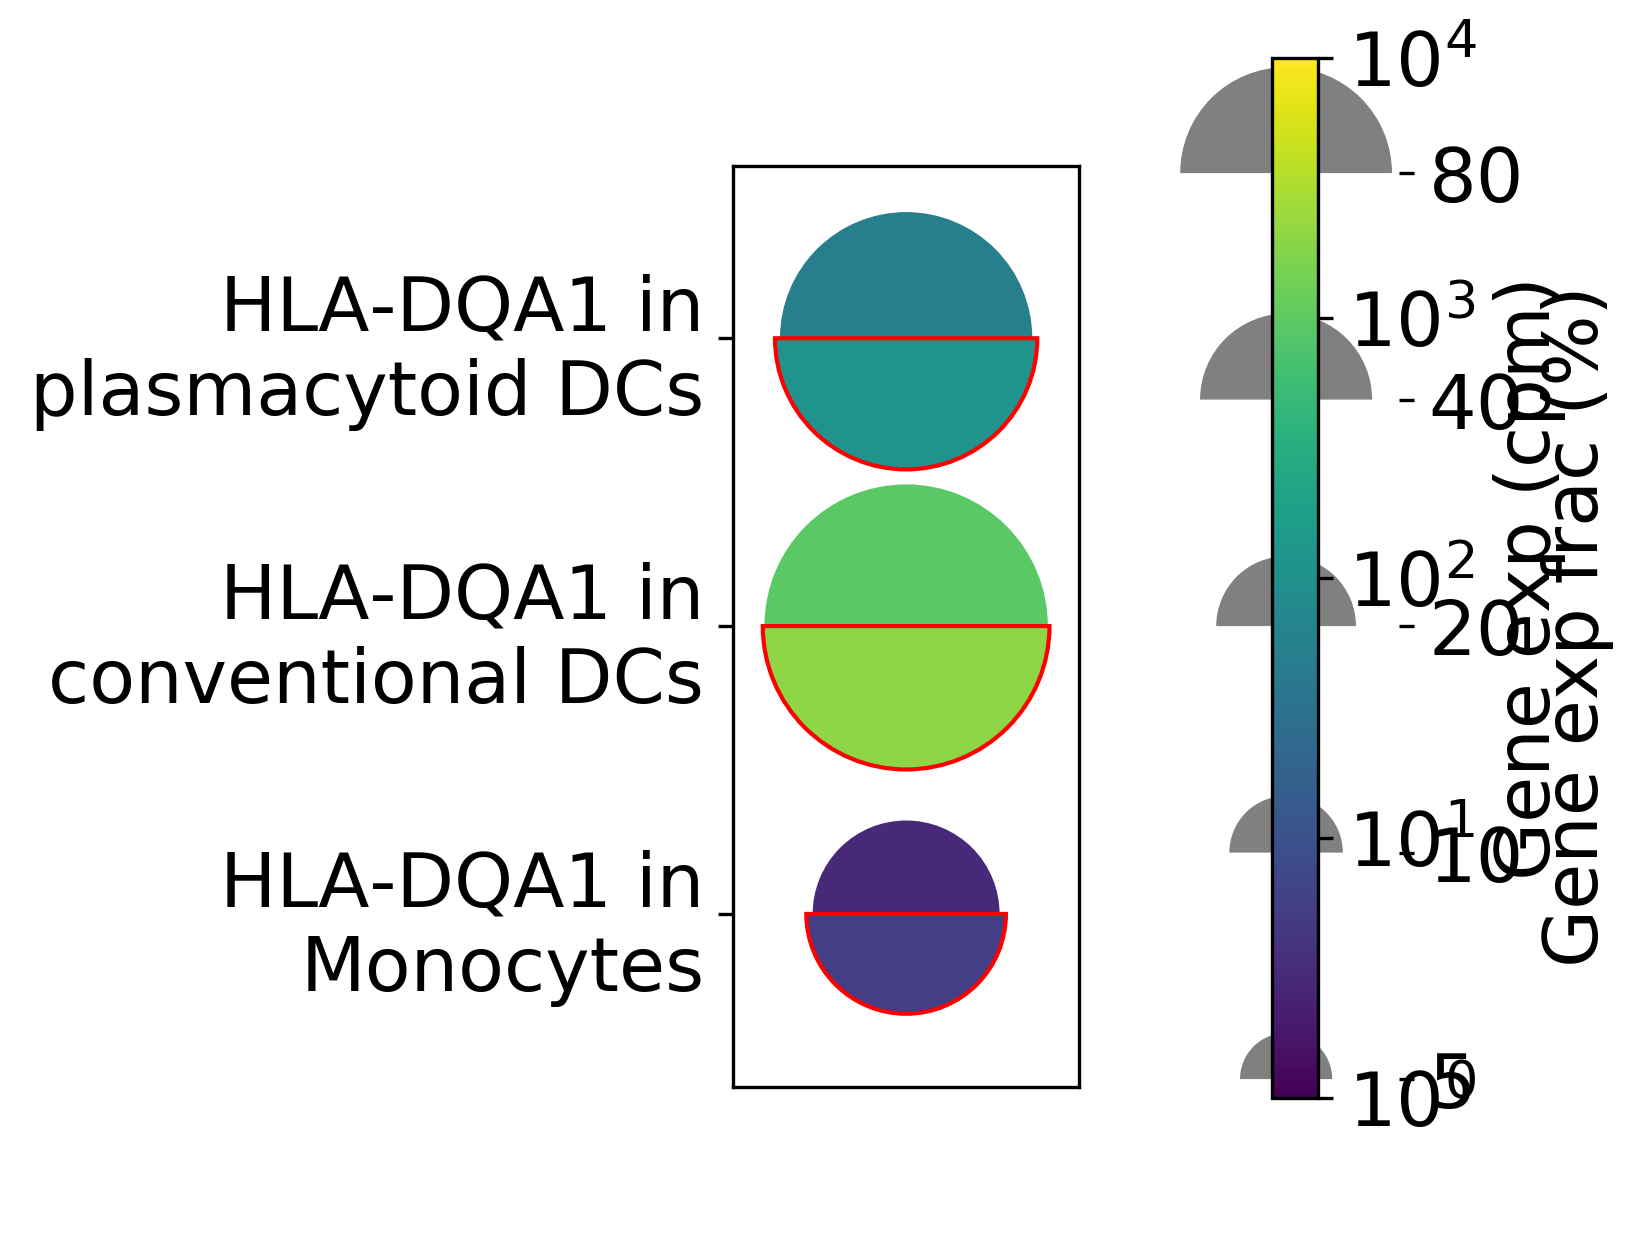

In [37]:
genes3 = [
          {'HLA-DQA1': ['Monocytes', 'conventional DCs', 'plasmacytoid DCs']}
         ]
fig = s_mushrooms(genes3, 'cell_type_new', vmax=4)['figure']
fig.savefig(save_figures + 'inters_plus2.png', bbox_inches='tight')
fig.savefig(save_figures + 'inters_plus2.svg', bbox_inches='tight')